In [1]:
library(readr)
library(dplyr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
df1=read_csv("/kaggle/input/retaildataset/Features data set.csv")
df2=read_csv("/kaggle/input/retaildataset/sales data-set.csv")
df3=read_csv("/kaggle/input/retaildataset/stores data-set.csv")

Rows: 8190 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Date
dbl (10): Store, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, M...
lgl  (1): IsHoliday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 421570 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (3): Store, Dept, Weekly_Sales
lgl (1): IsHoliday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 45 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Type
dbl (2): Store, Size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_

In [3]:
head(df1)

Store Date       Temperature Fuel_Price MarkDown1 MarkDown2 MarkDown3
1 1     05/02/2010 42.31       2.572      NA        NA        NA       
2 1     12/02/2010 38.51       2.548      NA        NA        NA       
3 1     19/02/2010 39.93       2.514      NA        NA        NA       
4 1     26/02/2010 46.63       2.561      NA        NA        NA       
5 1     05/03/2010 46.50       2.625      NA        NA        NA       
6 1     12/03/2010 57.79       2.667      NA        NA        NA       
  MarkDown4 MarkDown5 CPI      Unemployment IsHoliday
1 NA        NA        211.0964 8.106        FALSE    
2 NA        NA        211.2422 8.106         TRUE    
3 NA        NA        211.2891 8.106        FALSE    
4 NA        NA        211.3196 8.106        FALSE    
5 NA        NA        211.3501 8.106        FALSE    
6 NA        NA        211.3806 8.106        FALSE

In [4]:
dim(df1)  

[1] 8190   12

In [5]:
colSums(is.na(df1))

Store         Date  Temperature   Fuel_Price    MarkDown1    MarkDown2 
           0            0            0            0         4158         5269 
   MarkDown3    MarkDown4    MarkDown5          CPI Unemployment    IsHoliday 
        4577         4726         4140          585          585            0

In [6]:
str(df1)

spc_tbl_ [8,190 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Store       : num [1:8190] 1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : chr [1:8190] "05/02/2010" "12/02/2010" "19/02/2010" "26/02/2010" ...
 $ Temperature : num [1:8190] 42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num [1:8190] 2.57 2.55 2.51 2.56 2.62 ...
 $ MarkDown1   : num [1:8190] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown2   : num [1:8190] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown3   : num [1:8190] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown4   : num [1:8190] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown5   : num [1:8190] NA NA NA NA NA NA NA NA NA NA ...
 $ CPI         : num [1:8190] 211 211 211 211 211 ...
 $ Unemployment: num [1:8190] 8.11 8.11 8.11 8.11 8.11 ...
 $ IsHoliday   : logi [1:8190] FALSE TRUE FALSE FALSE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   Store = col_double(),
  ..   Date = col_character(),
  ..   Temperature = col_double(),
  ..   Fuel_Price = col_double(),
  ..   MarkDown1 

In [7]:
summary(df1)

     Store        Date            Temperature       Fuel_Price   
 Min.   : 1   Length:8190        Min.   : -7.29   Min.   :2.472  
 1st Qu.:12   Class :character   1st Qu.: 45.90   1st Qu.:3.041  
 Median :23   Mode  :character   Median : 60.71   Median :3.513  
 Mean   :23                      Mean   : 59.36   Mean   :3.406  
 3rd Qu.:34                      3rd Qu.: 73.88   3rd Qu.:3.743  
 Max.   :45                      Max.   :101.95   Max.   :4.468  
                                                                 
   MarkDown1        MarkDown2           MarkDown3           MarkDown4       
 Min.   : -2781   Min.   :  -265.76   Min.   :  -179.26   Min.   :    0.22  
 1st Qu.:  1578   1st Qu.:    68.88   1st Qu.:     6.60   1st Qu.:  304.69  
 Median :  4744   Median :   364.57   Median :    36.26   Median : 1176.42  
 Mean   :  7032   Mean   :  3384.18   Mean   :  1760.10   Mean   : 3292.94  
 3rd Qu.:  8923   3rd Qu.:  2153.35   3rd Qu.:   163.15   3rd Qu.: 3310.01  
 Max.   :1

In [8]:
exclude_col<-c("CPI","Unemployment")
for(col in names(df1)){
    if(!(col%in%exclude_col) & is.numeric(df1[[col]])){
        df1[[col]][is.na(df1[[col]])]<-mean(df1[[col]],na.rm=TRUE)
    }
}

In [9]:
# Function to calculate mode
get_mode <- function(x) {
  ux <- unique(x[!is.na(x)])
  ux[which.max(tabulate(match(x, ux)))]
}

cols_to_fill <- c("CPI", "Unemployment")

# Fill NA with mode
for (col in cols_to_fill) {
  if (is.factor(df1[[col]])) {
    df1[[col]] <- as.character(df1[[col]])
  }
  df1[[col]][is.na(df1[[col]])] <- get_mode(df1[[col]])
}




In [10]:
colSums(is.na(df1))

Store         Date  Temperature   Fuel_Price    MarkDown1    MarkDown2 
           0            0            0            0            0            0 
   MarkDown3    MarkDown4    MarkDown5          CPI Unemployment    IsHoliday 
           0            0            0            0            0            0

In [11]:
dim(df2)

[1] 421570      5

In [12]:
colSums(is.na(df2))

Store         Dept         Date Weekly_Sales    IsHoliday 
           0            0            0            0            0

In [13]:
str(df2)

spc_tbl_ [421,570 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Store       : num [1:421570] 1 1 1 1 1 1 1 1 1 1 ...
 $ Dept        : num [1:421570] 1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : chr [1:421570] "05/02/2010" "12/02/2010" "19/02/2010" "26/02/2010" ...
 $ Weekly_Sales: num [1:421570] 24924 46039 41596 19404 21828 ...
 $ IsHoliday   : logi [1:421570] FALSE TRUE FALSE FALSE FALSE FALSE ...
 - attr(*, "spec")=
  .. cols(
  ..   Store = col_double(),
  ..   Dept = col_double(),
  ..   Date = col_character(),
  ..   Weekly_Sales = col_double(),
  ..   IsHoliday = col_logical()
  .. )
 - attr(*, "problems")=<externalptr> 


In [14]:
summary(df2)

     Store           Dept           Date            Weekly_Sales   
 Min.   : 1.0   Min.   : 1.00   Length:421570      Min.   : -4989  
 1st Qu.:11.0   1st Qu.:18.00   Class :character   1st Qu.:  2080  
 Median :22.0   Median :37.00   Mode  :character   Median :  7612  
 Mean   :22.2   Mean   :44.26                      Mean   : 15981  
 3rd Qu.:33.0   3rd Qu.:74.00                      3rd Qu.: 20206  
 Max.   :45.0   Max.   :99.00                      Max.   :693099  
 IsHoliday      
 Mode :logical  
 FALSE:391909   
 TRUE :29661    
                
                
                

In [15]:
head(df3)

Store Type Size  
1 1     A    151315
2 2     A    202307
3 3     B     37392
4 4     A    205863
5 5     B     34875
6 6     A    202505

In [16]:
dim(df3)

[1] 45  3

In [17]:
str(df3)

spc_tbl_ [45 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Store: num [1:45] 1 2 3 4 5 6 7 8 9 10 ...
 $ Type : chr [1:45] "A" "A" "B" "A" ...
 $ Size : num [1:45] 151315 202307 37392 205863 34875 ...
 - attr(*, "spec")=
  .. cols(
  ..   Store = col_double(),
  ..   Type = col_character(),
  ..   Size = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [18]:
summary(df3)

     Store        Type                Size       
 Min.   : 1   Length:45          Min.   : 34875  
 1st Qu.:12   Class :character   1st Qu.: 70713  
 Median :23   Mode  :character   Median :126512  
 Mean   :23                      Mean   :130288  
 3rd Qu.:34                      3rd Qu.:202307  
 Max.   :45                      Max.   :219622  

In [19]:
colSums(is.na(df3))

Store  Type  Size 
    0     0     0

In [20]:
head(df1)

Store Date       Temperature Fuel_Price MarkDown1 MarkDown2 MarkDown3
1 1     05/02/2010 42.31       2.572      7032.372  3384.177  1760.1   
2 1     12/02/2010 38.51       2.548      7032.372  3384.177  1760.1   
3 1     19/02/2010 39.93       2.514      7032.372  3384.177  1760.1   
4 1     26/02/2010 46.63       2.561      7032.372  3384.177  1760.1   
5 1     05/03/2010 46.50       2.625      7032.372  3384.177  1760.1   
6 1     12/03/2010 57.79       2.667      7032.372  3384.177  1760.1   
  MarkDown4 MarkDown5 CPI      Unemployment IsHoliday
1 3292.936  4132.216  211.0964 8.106        FALSE    
2 3292.936  4132.216  211.2422 8.106         TRUE    
3 3292.936  4132.216  211.2891 8.106        FALSE    
4 3292.936  4132.216  211.3196 8.106        FALSE    
5 3292.936  4132.216  211.3501 8.106        FALSE    
6 3292.936  4132.216  211.3806 8.106        FALSE

In [21]:
head(df2)

Store Dept Date       Weekly_Sales IsHoliday
1 1     1    05/02/2010 24924.50     FALSE    
2 1     1    12/02/2010 46039.49      TRUE    
3 1     1    19/02/2010 41595.55     FALSE    
4 1     1    26/02/2010 19403.54     FALSE    
5 1     1    05/03/2010 21827.90     FALSE    
6 1     1    12/03/2010 21043.39     FALSE

In [22]:
head(df3)

Store Type Size  
1 1     A    151315
2 2     A    202307
3 3     B     37392
4 4     A    205863
5 5     B     34875
6 6     A    202505

In [23]:
df<-df2%>%left_join(df1,by=c("Store","Date","IsHoliday"))%>%left_join(df3,by="Store")%>%mutate(Date=as.Date(Date,format="%d/%m/%Y"))%>%
    filter(!is.na(Weekly_Sales))

In [24]:
dim(df)

[1] 421570     16

In [25]:
colSums(is.na(df))

Store         Dept         Date Weekly_Sales    IsHoliday  Temperature 
           0            0            0            0            0            0 
  Fuel_Price    MarkDown1    MarkDown2    MarkDown3    MarkDown4    MarkDown5 
           0            0            0            0            0            0 
         CPI Unemployment         Type         Size 
           0            0            0            0

In [26]:
df<-df%>%mutate(Year=year(Date),Month=month(Date,label=TRUE,abbr=TRUE),Week=isoweek(Date),
               Quarter=quarter(Date),Day=day(Date),DayOfWeek=wday(Date,label=TRUE,abbr=TRUE
                                                                 ))

In [27]:
df <- df %>% select(-Date)

```
# library(dplyr)

# df_display <- df %>%
#   head() %>%
#   mutate(across(where(is.numeric), ~ round(.x, 2))) %>%   # 2 decimal places
#   select(Store, Dept, Sales = Weekly_Sales, IsHoliday,    # shorter names
#          Temperature, Fuel_Price, 
#          MarkDown1:MarkDown5,
#          CPI, Unemployment, Type, Size,
#          Year, Month, Week, Day, DayOfWeek)

# datatable(df_display, 
#           options = list(scrollX = TRUE, scrollY = "400px", pageLength = 6))
```

In [28]:
library(DT)
library(ggplot2)
library(ggthemes)
library(patchwork)
library(tidyverse)

datatable(head(df),options = list(scrollX = TRUE,scrollY = "400px",pageLength = 6,autoWidth = TRUE))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
✔ stringr 1.5.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


HTML widgets cannot be represented in plain text (need html)

In [29]:
# Set a consistent ggplot2 theme for beautiful visualizations
theme_set(theme_clean() + theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
              plot.subtitle = element_text(hjust = 0.5, size = 12),
              axis.text = element_text(size = 10),
              legend.position = "top"))

set.seed(123)

# Distribution of Weekly Sales (Target Variable)



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


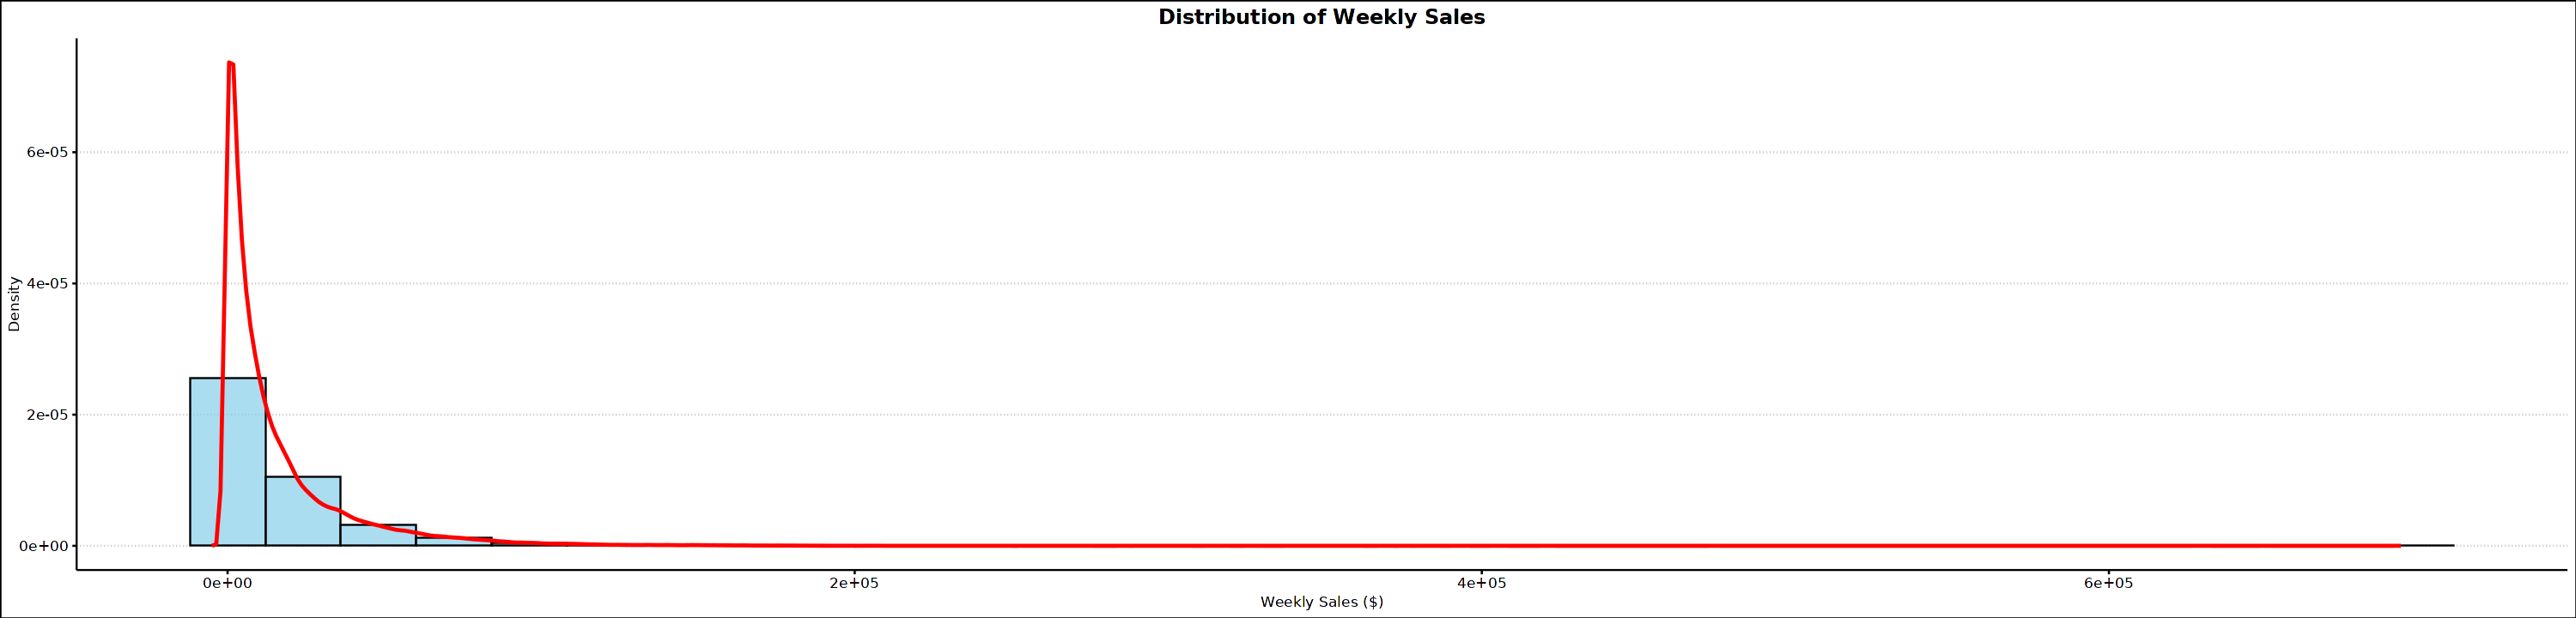

In [30]:
p1 <- ggplot(df, aes(x = Weekly_Sales)) +geom_histogram(aes(y = after_stat(density)), bins = 30,fill = "skyblue", color = "black", alpha = 0.7) +
            geom_density(color = "red", size = 1) +labs(title = "Distribution of Weekly Sales",x = "Weekly Sales ($)",y = "Density")

options(repr.plot.width=25,repr.plot.height=6)
print(p1)

#  Distribution of Numeric Predictors



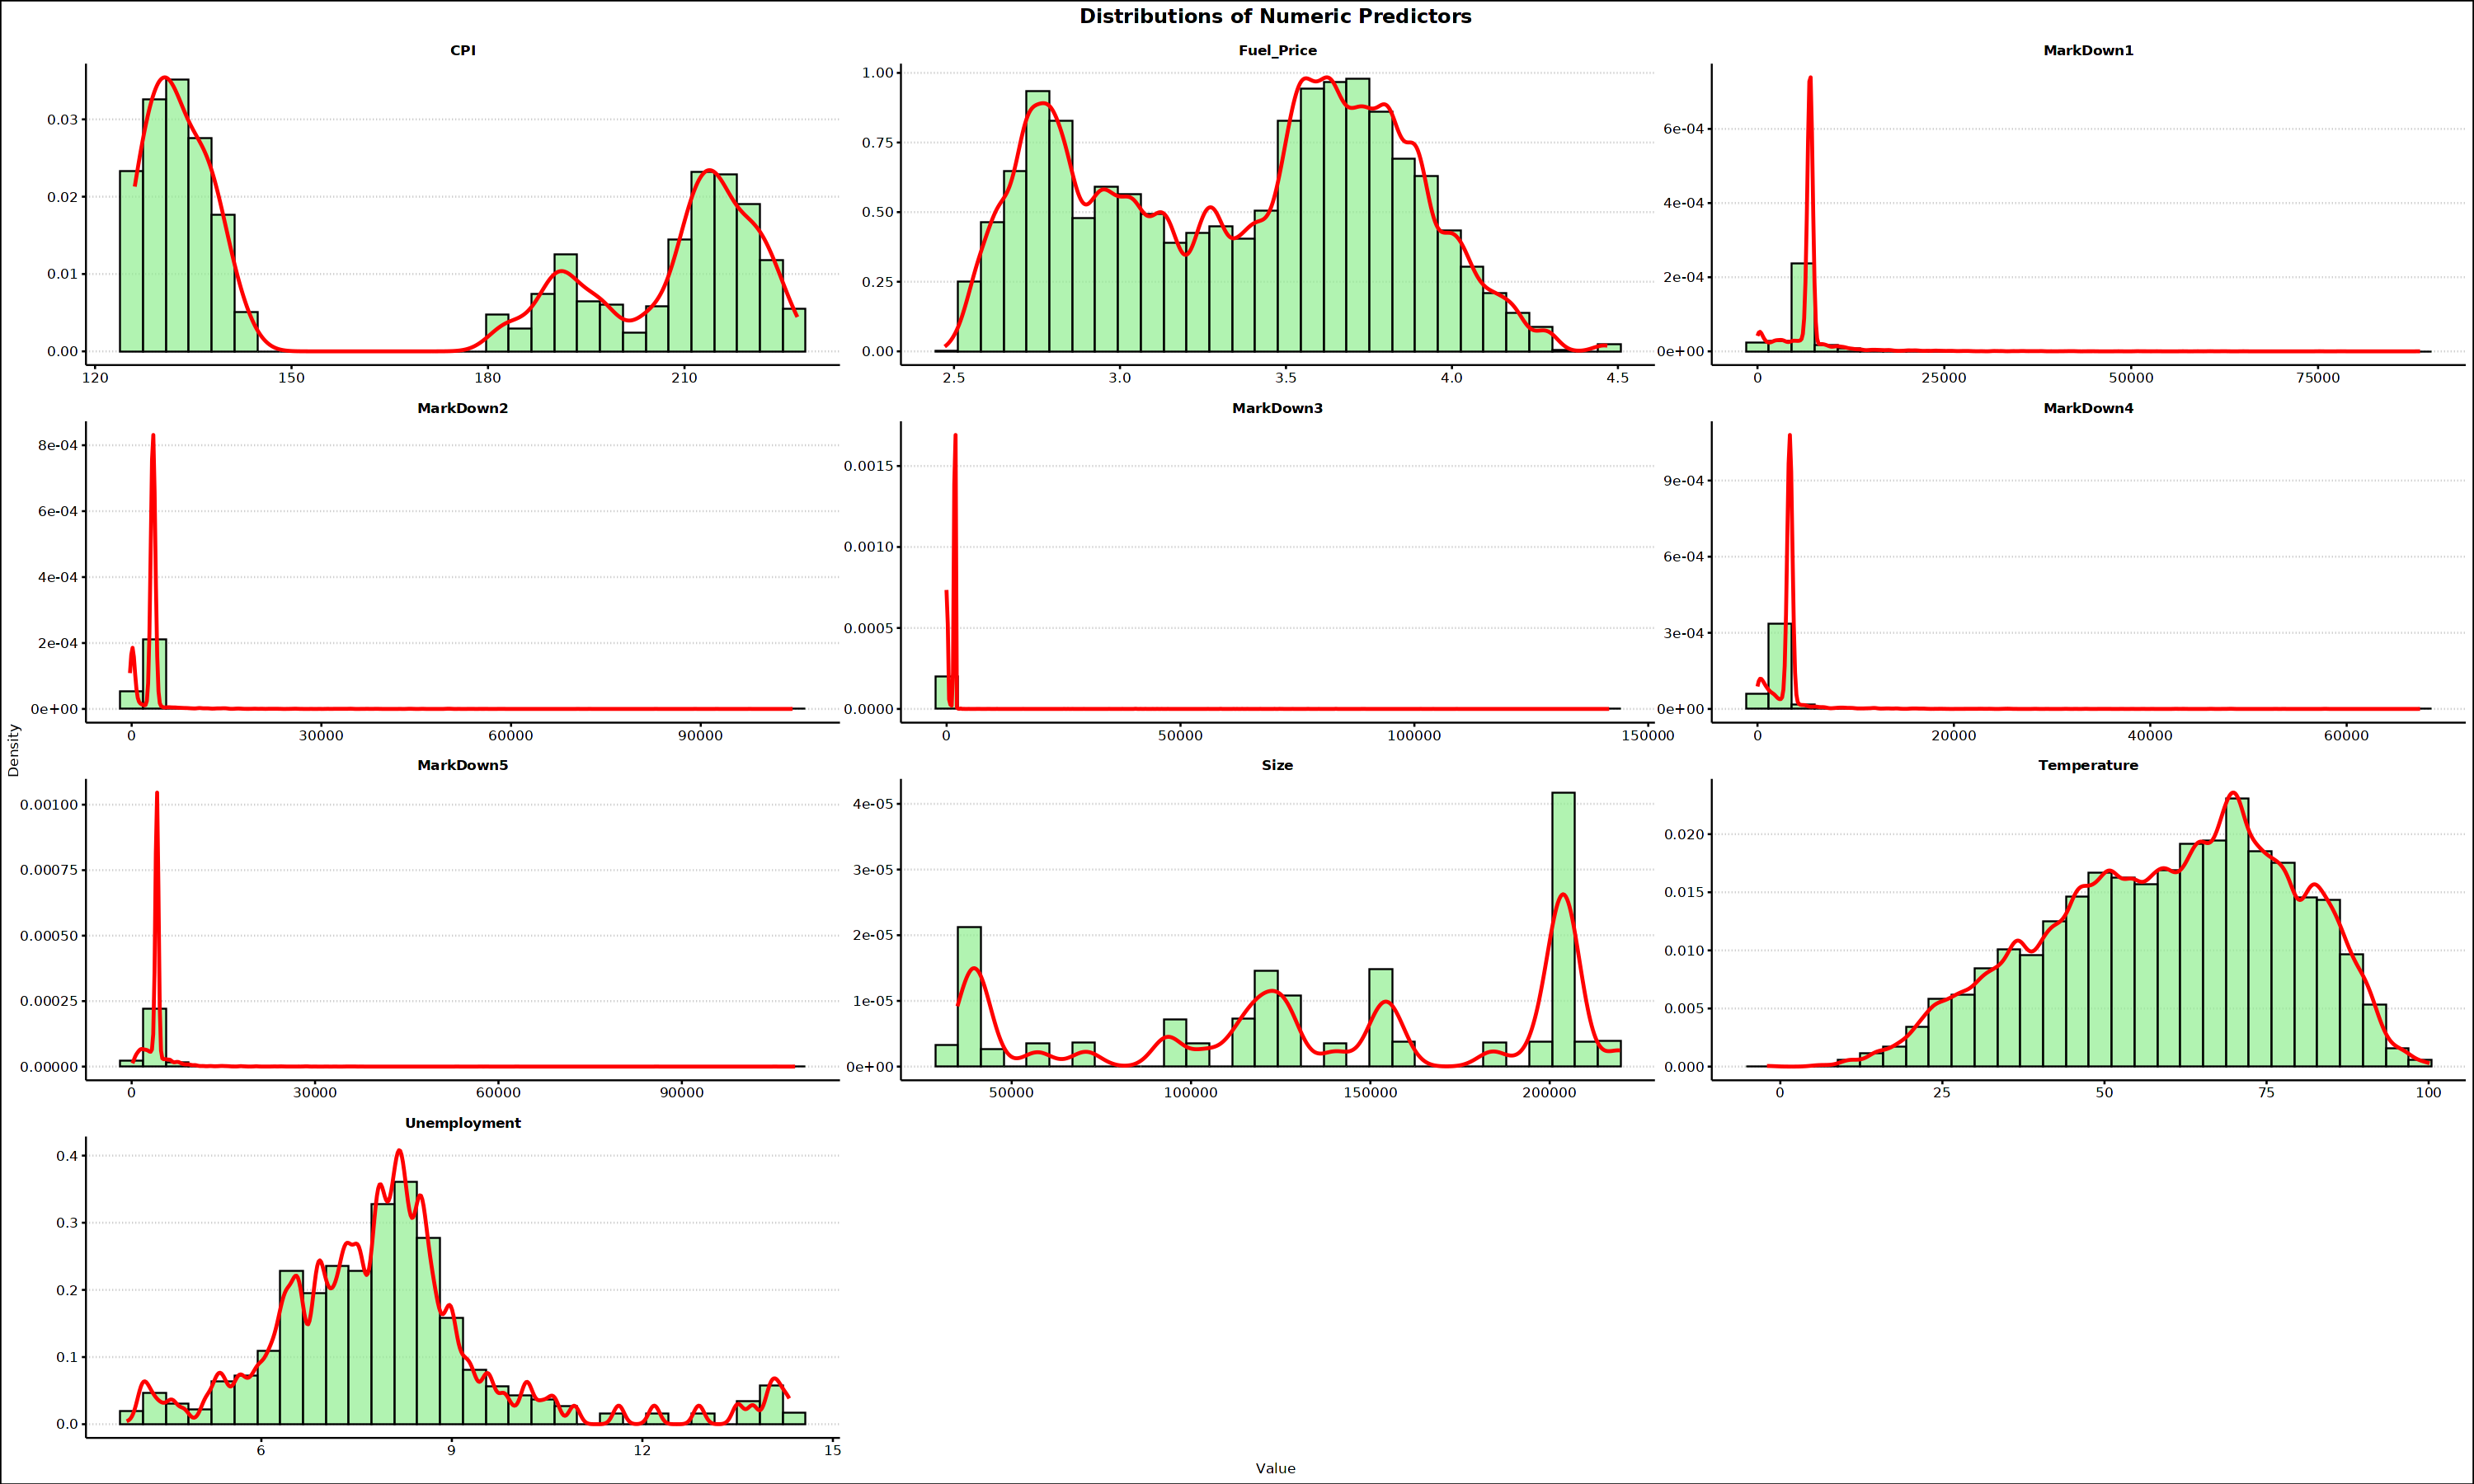

In [31]:
numeric_vars <- df %>%
  select(Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Size) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Value")

p2 <- ggplot(numeric_vars, aes(x = Value)) +
  geom_histogram(aes(y = after_stat(density)), bins = 30, fill = "lightgreen", color = "black", alpha = 0.7) +
  geom_density(color = "red", size = 1) +
  facet_wrap(~ Variable, scales = "free", ncol = 3) +
  labs(
    title = "Distributions of Numeric Predictors",
    x = "Value",
    y = "Density"
  ) +
  theme(strip.text = element_text(face = "bold"))

options(repr.plot.width=25,repr.plot.height=15)
print(p2)

#  Distribution of Categorical Variables



Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
”


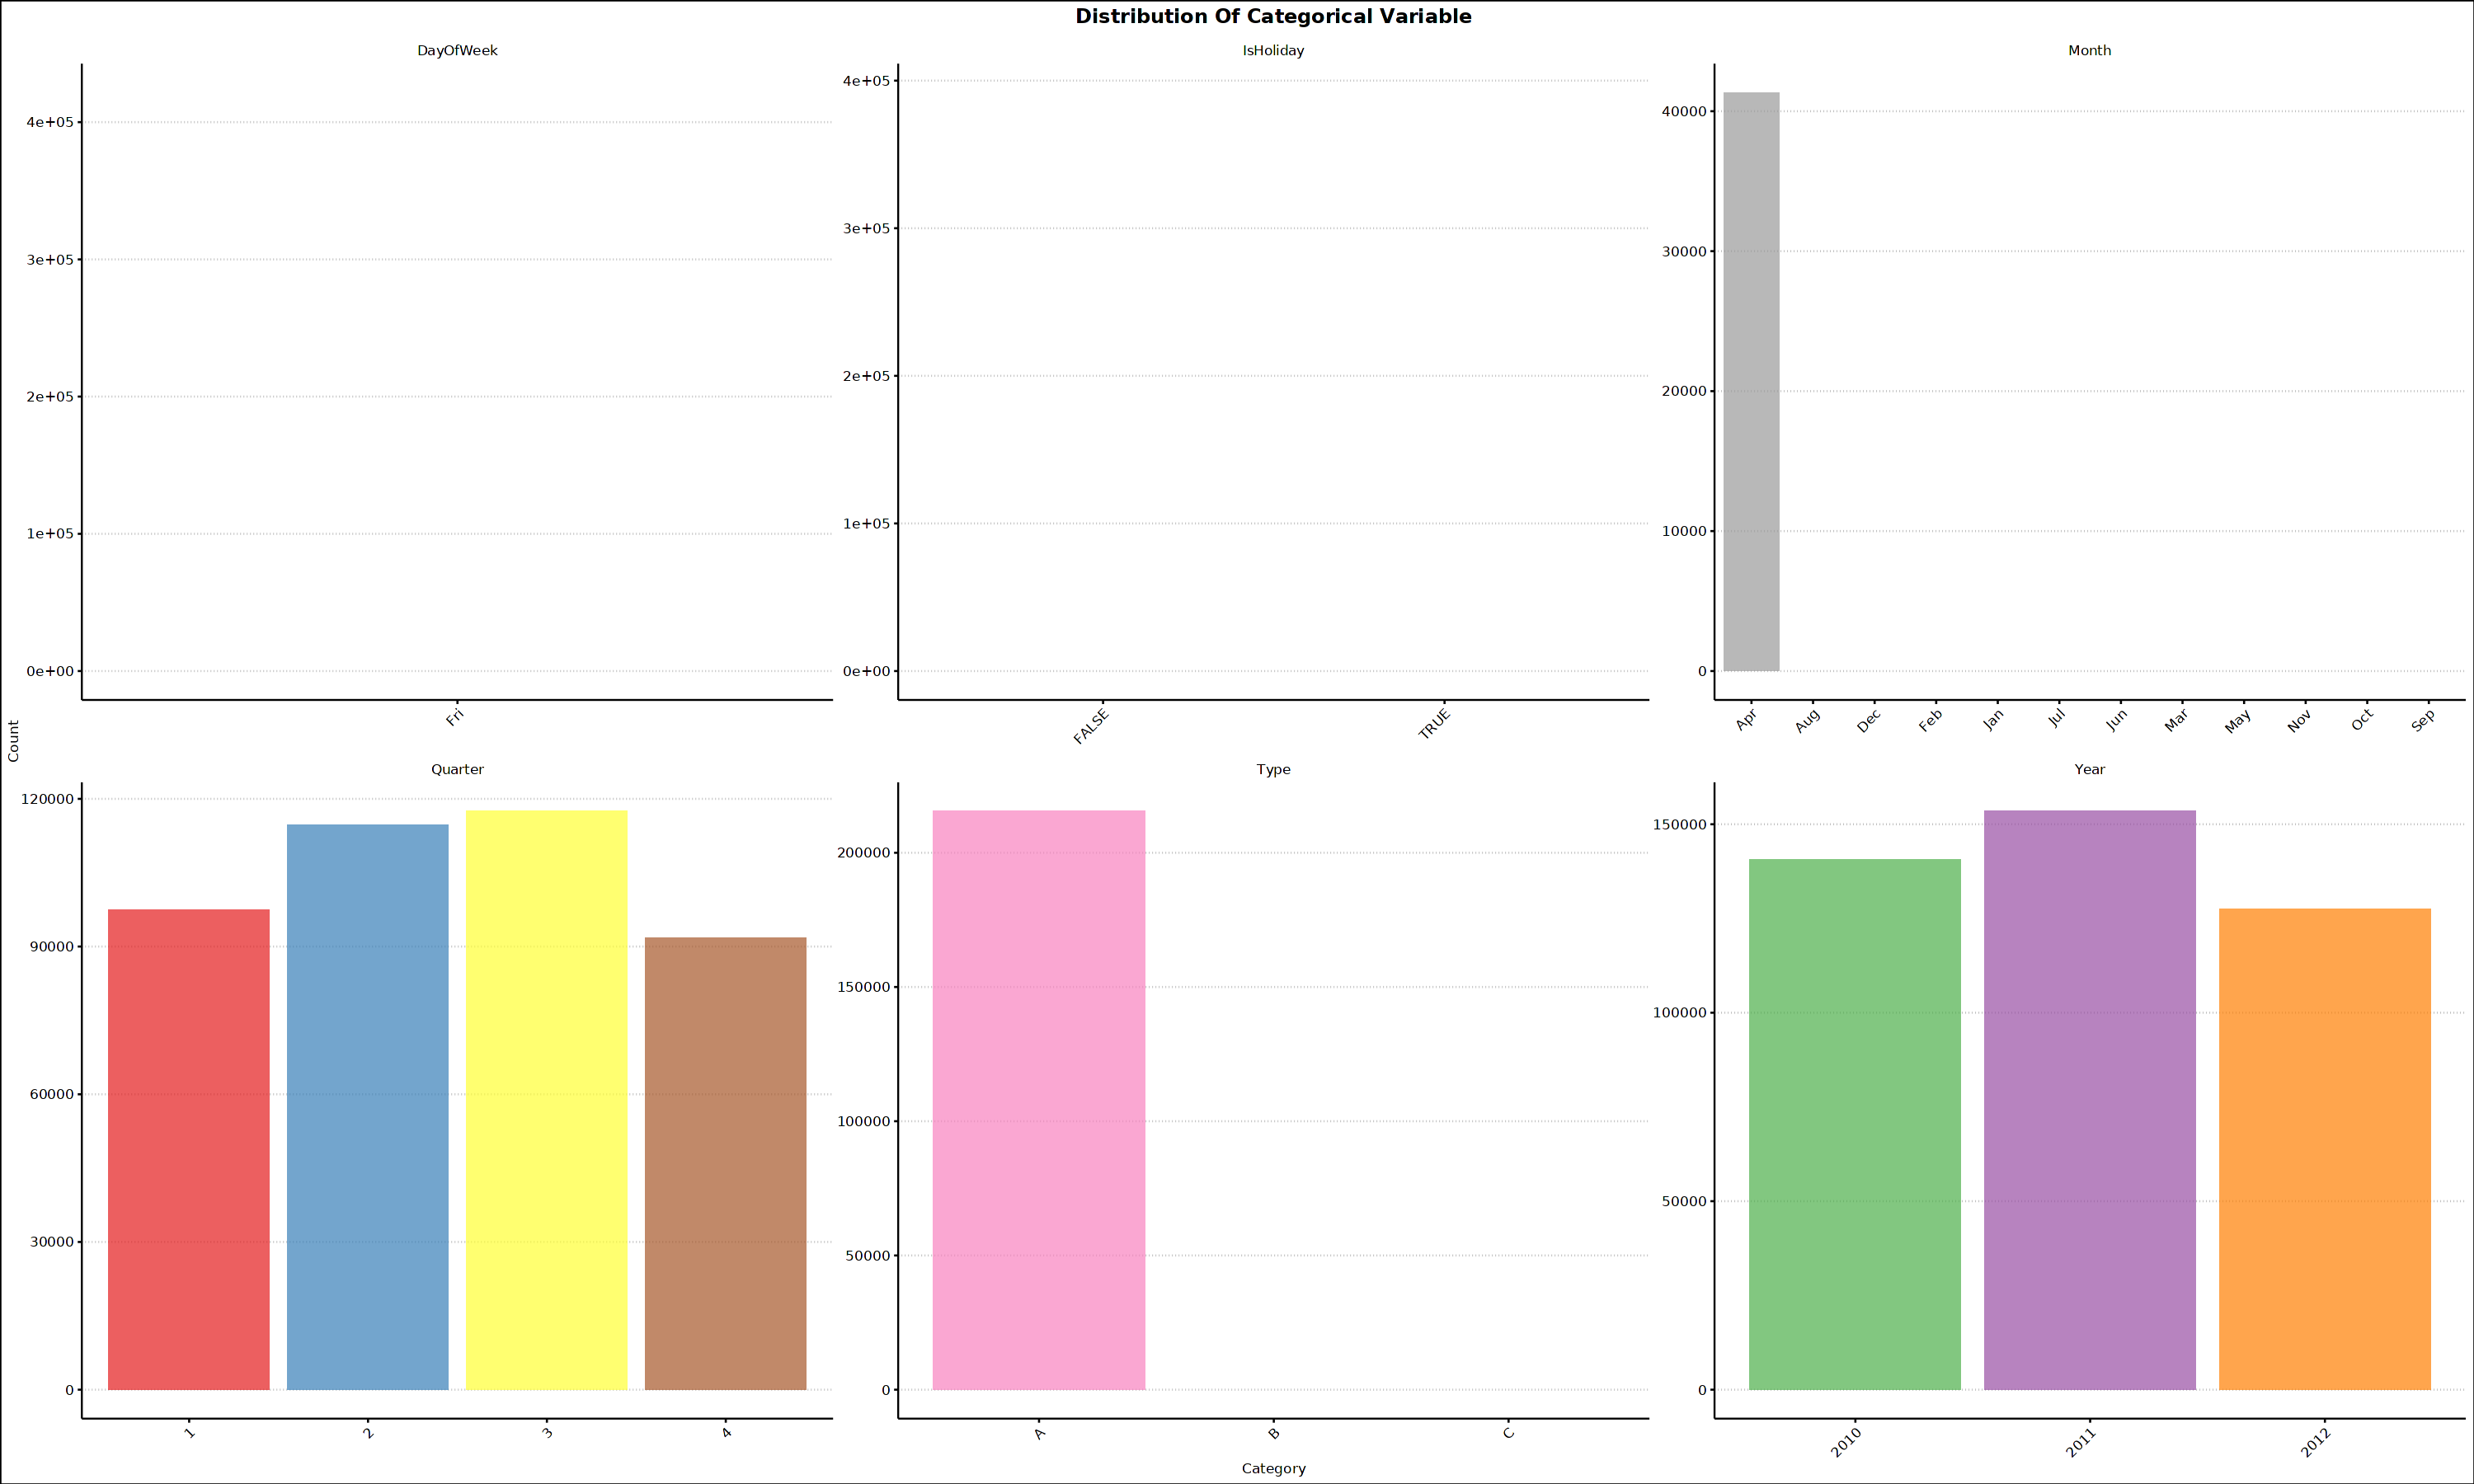

In [32]:
categorical_var<-df%>%select(IsHoliday,Type,Year,Month,Quarter,DayOfWeek)%>%mutate(across(everything(),as.character))%>%pivot_longer(everything(),names_to="Variable",values_to="Value")%>%
    mutate(Value=as.factor(Value))

p3<-ggplot(categorical_var,aes(x=Value,fill=Value))+geom_bar(alpha=0.7)+facet_wrap(~Variable,scales="free",ncol=3)+labs(title="Distribution Of Categorical Variable",
            x="Category",y="Count")+scale_fill_brewer(palette="Set1")+theme(axis.text.x=element_text(angle=45,hjust=1),legend.position="none")

options(repr.plot.width=25,repr.plot.height=15)

print(p3)

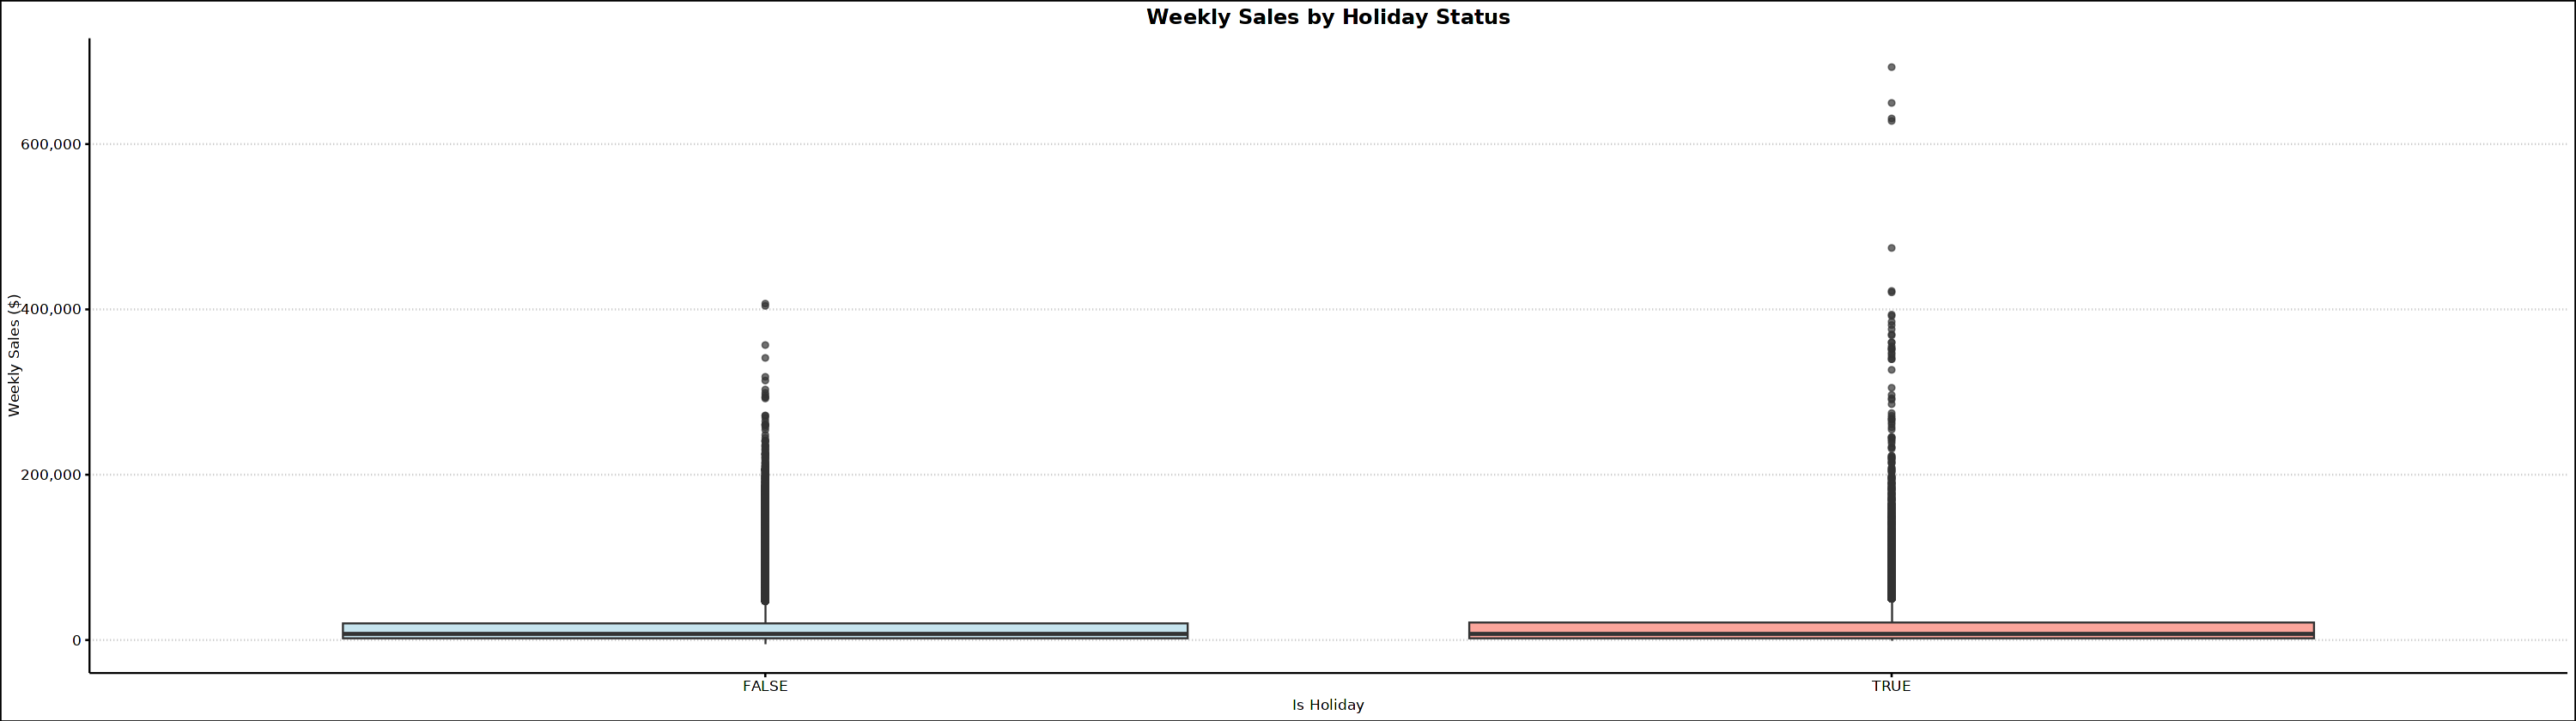

In [33]:
p4 <- ggplot(df, aes(x = IsHoliday, y = Weekly_Sales, fill = IsHoliday)) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Weekly Sales by Holiday Status",
    x = "Is Holiday",
    y = "Weekly Sales ($)"
  ) +
  scale_y_continuous(labels = scales::comma) +
  scale_fill_manual(values = c("FALSE" = "lightblue", "TRUE" = "salmon")) +
  theme(legend.position = "none")

options(repr.plot.width=25,repr.plot.height=7)
print(p4)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


`geom_smooth()` using formula = 'y ~ x'


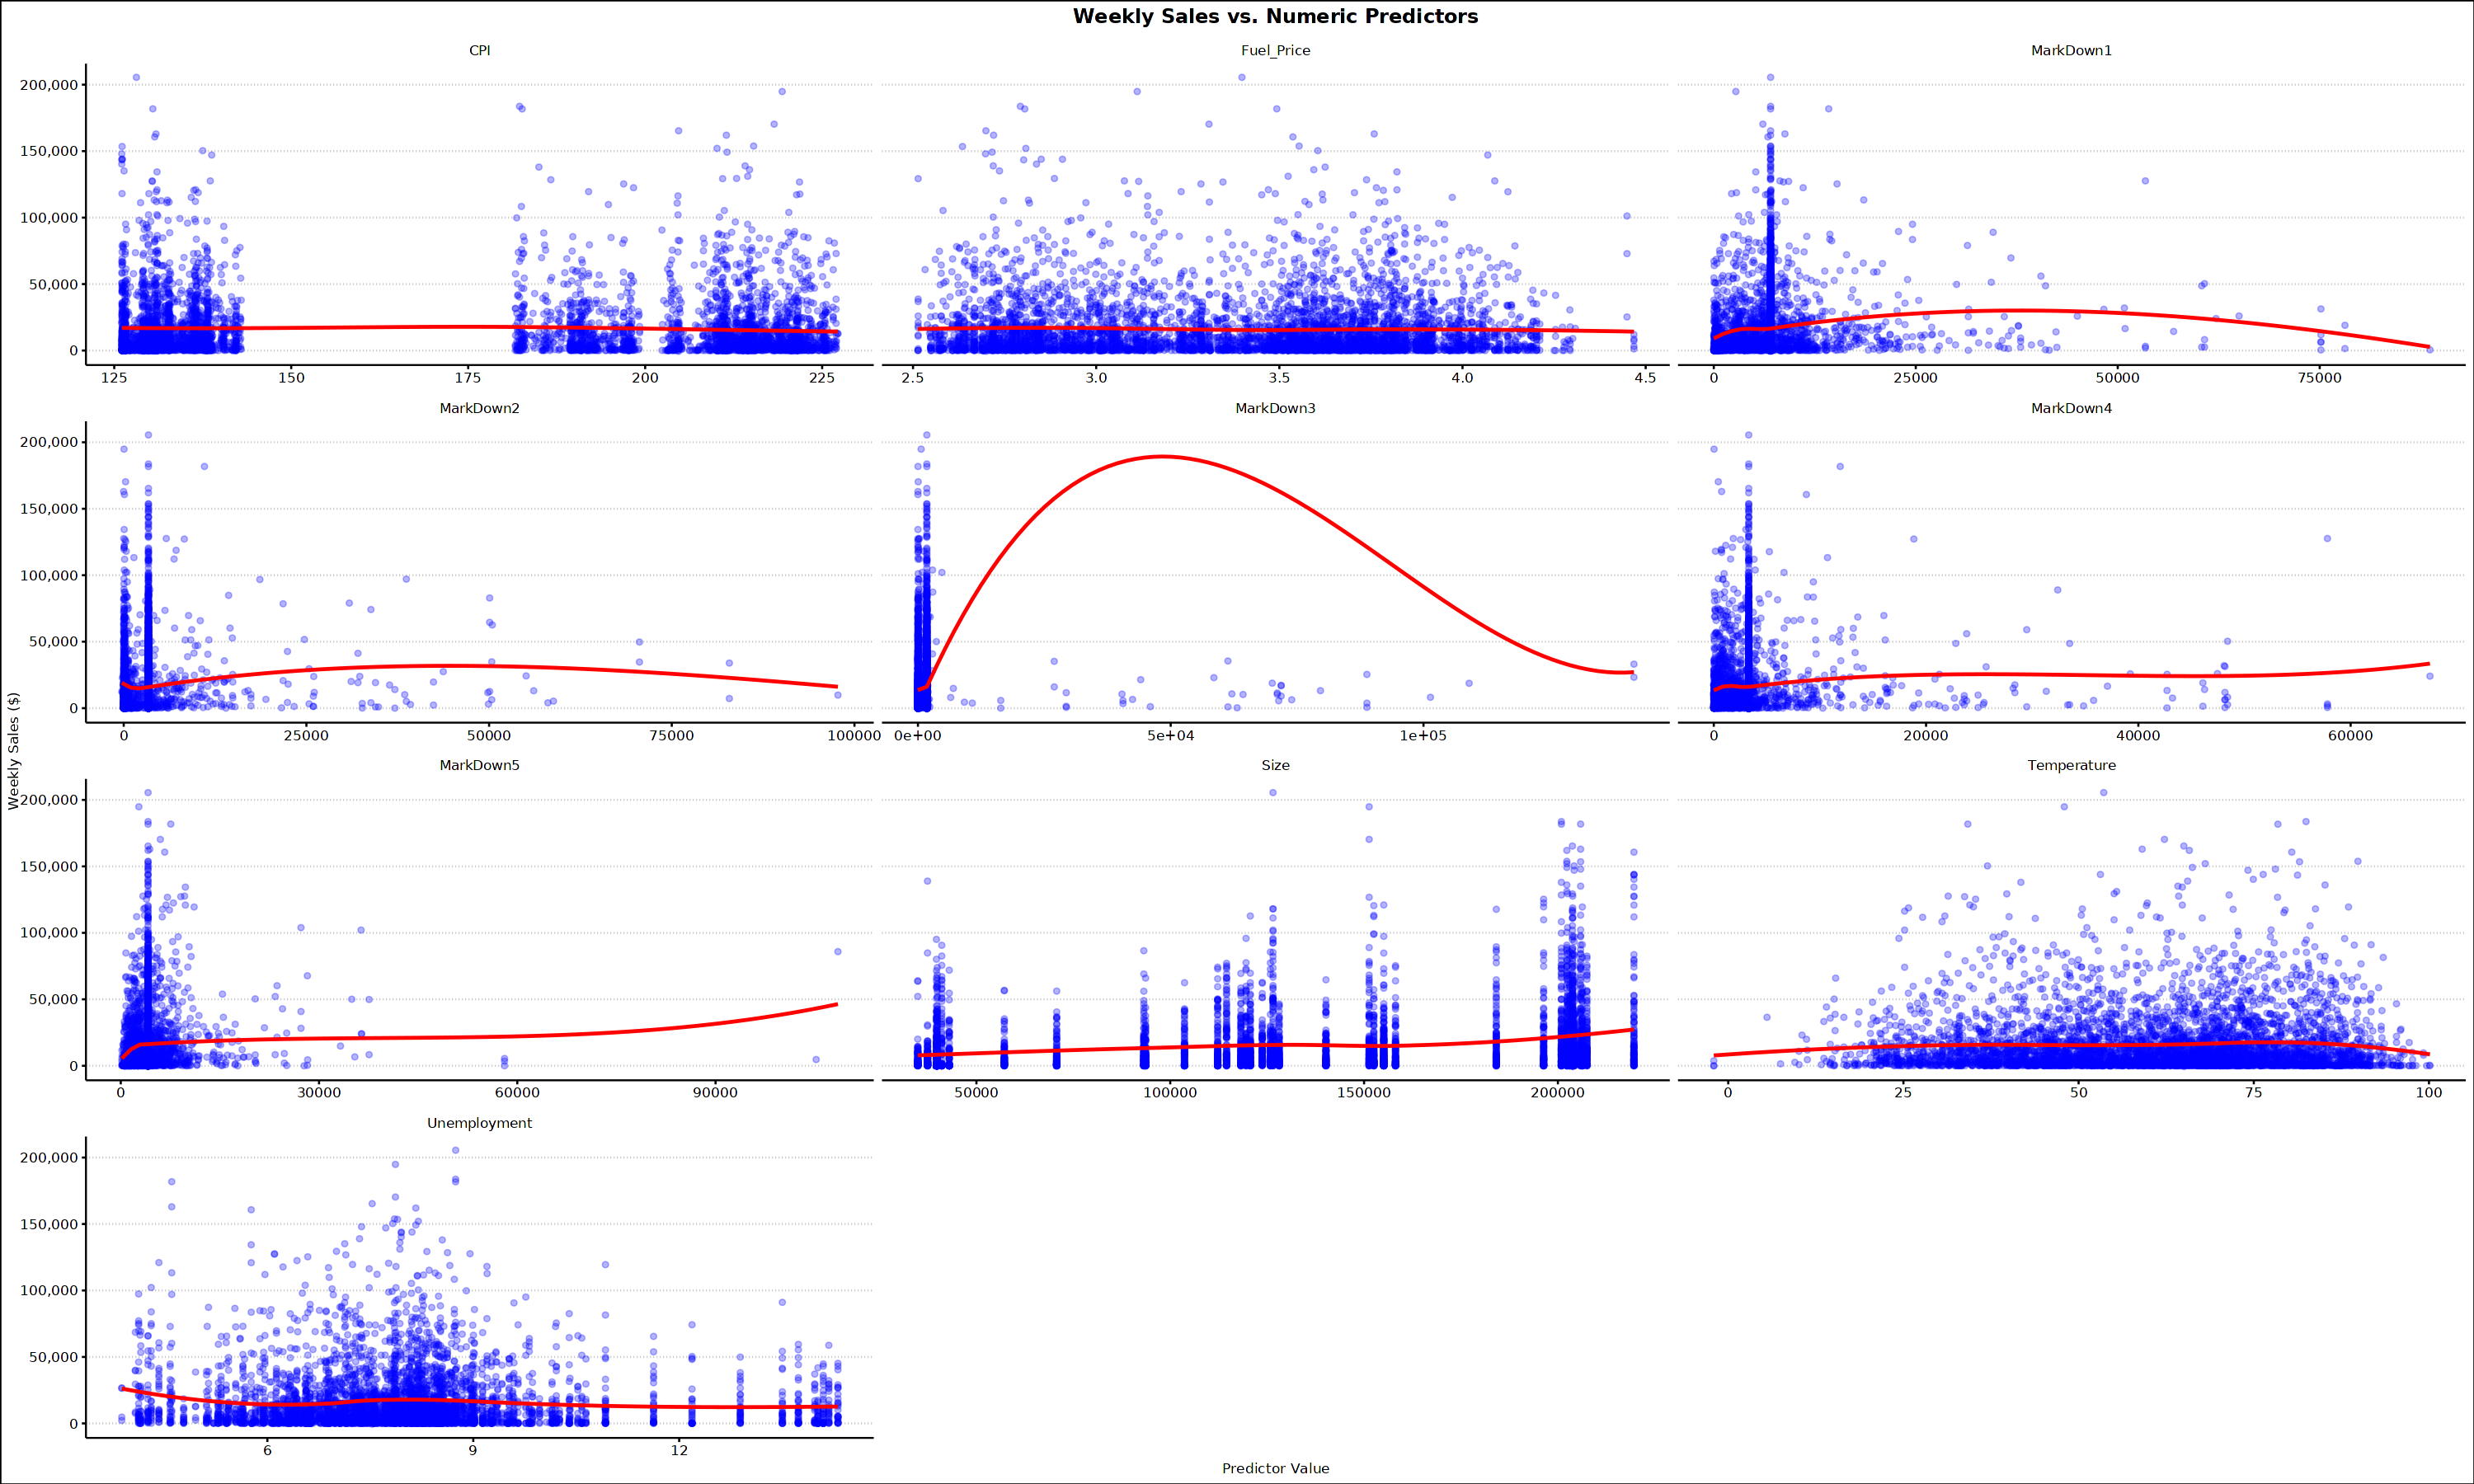

In [34]:
library(scales) 

df_sample <- df %>% slice_sample(n = 5000)

# Create plot
p5 <- df_sample %>%
  select(Weekly_Sales, Temperature, Fuel_Price, MarkDown1, MarkDown2,
         MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Size) %>%
  pivot_longer(-Weekly_Sales, names_to = "Variable", values_to = "Value") %>%
  ggplot(aes(x = Value, y = Weekly_Sales)) +
  geom_point(alpha = 0.3, color = "blue") +
  geom_smooth(method = "loess", color = "red", se = FALSE) +
  facet_wrap(~ Variable, scales = "free_x", ncol = 3) +
  labs(
    title = "Weekly Sales vs. Numeric Predictors",
    x = "Predictor Value",
    y = "Weekly Sales ($)"
  ) +
  scale_y_continuous(labels = scales::comma)

# Increase figure size
options(repr.plot.width = 25, repr.plot.height = 15)

# Display
print(p5)

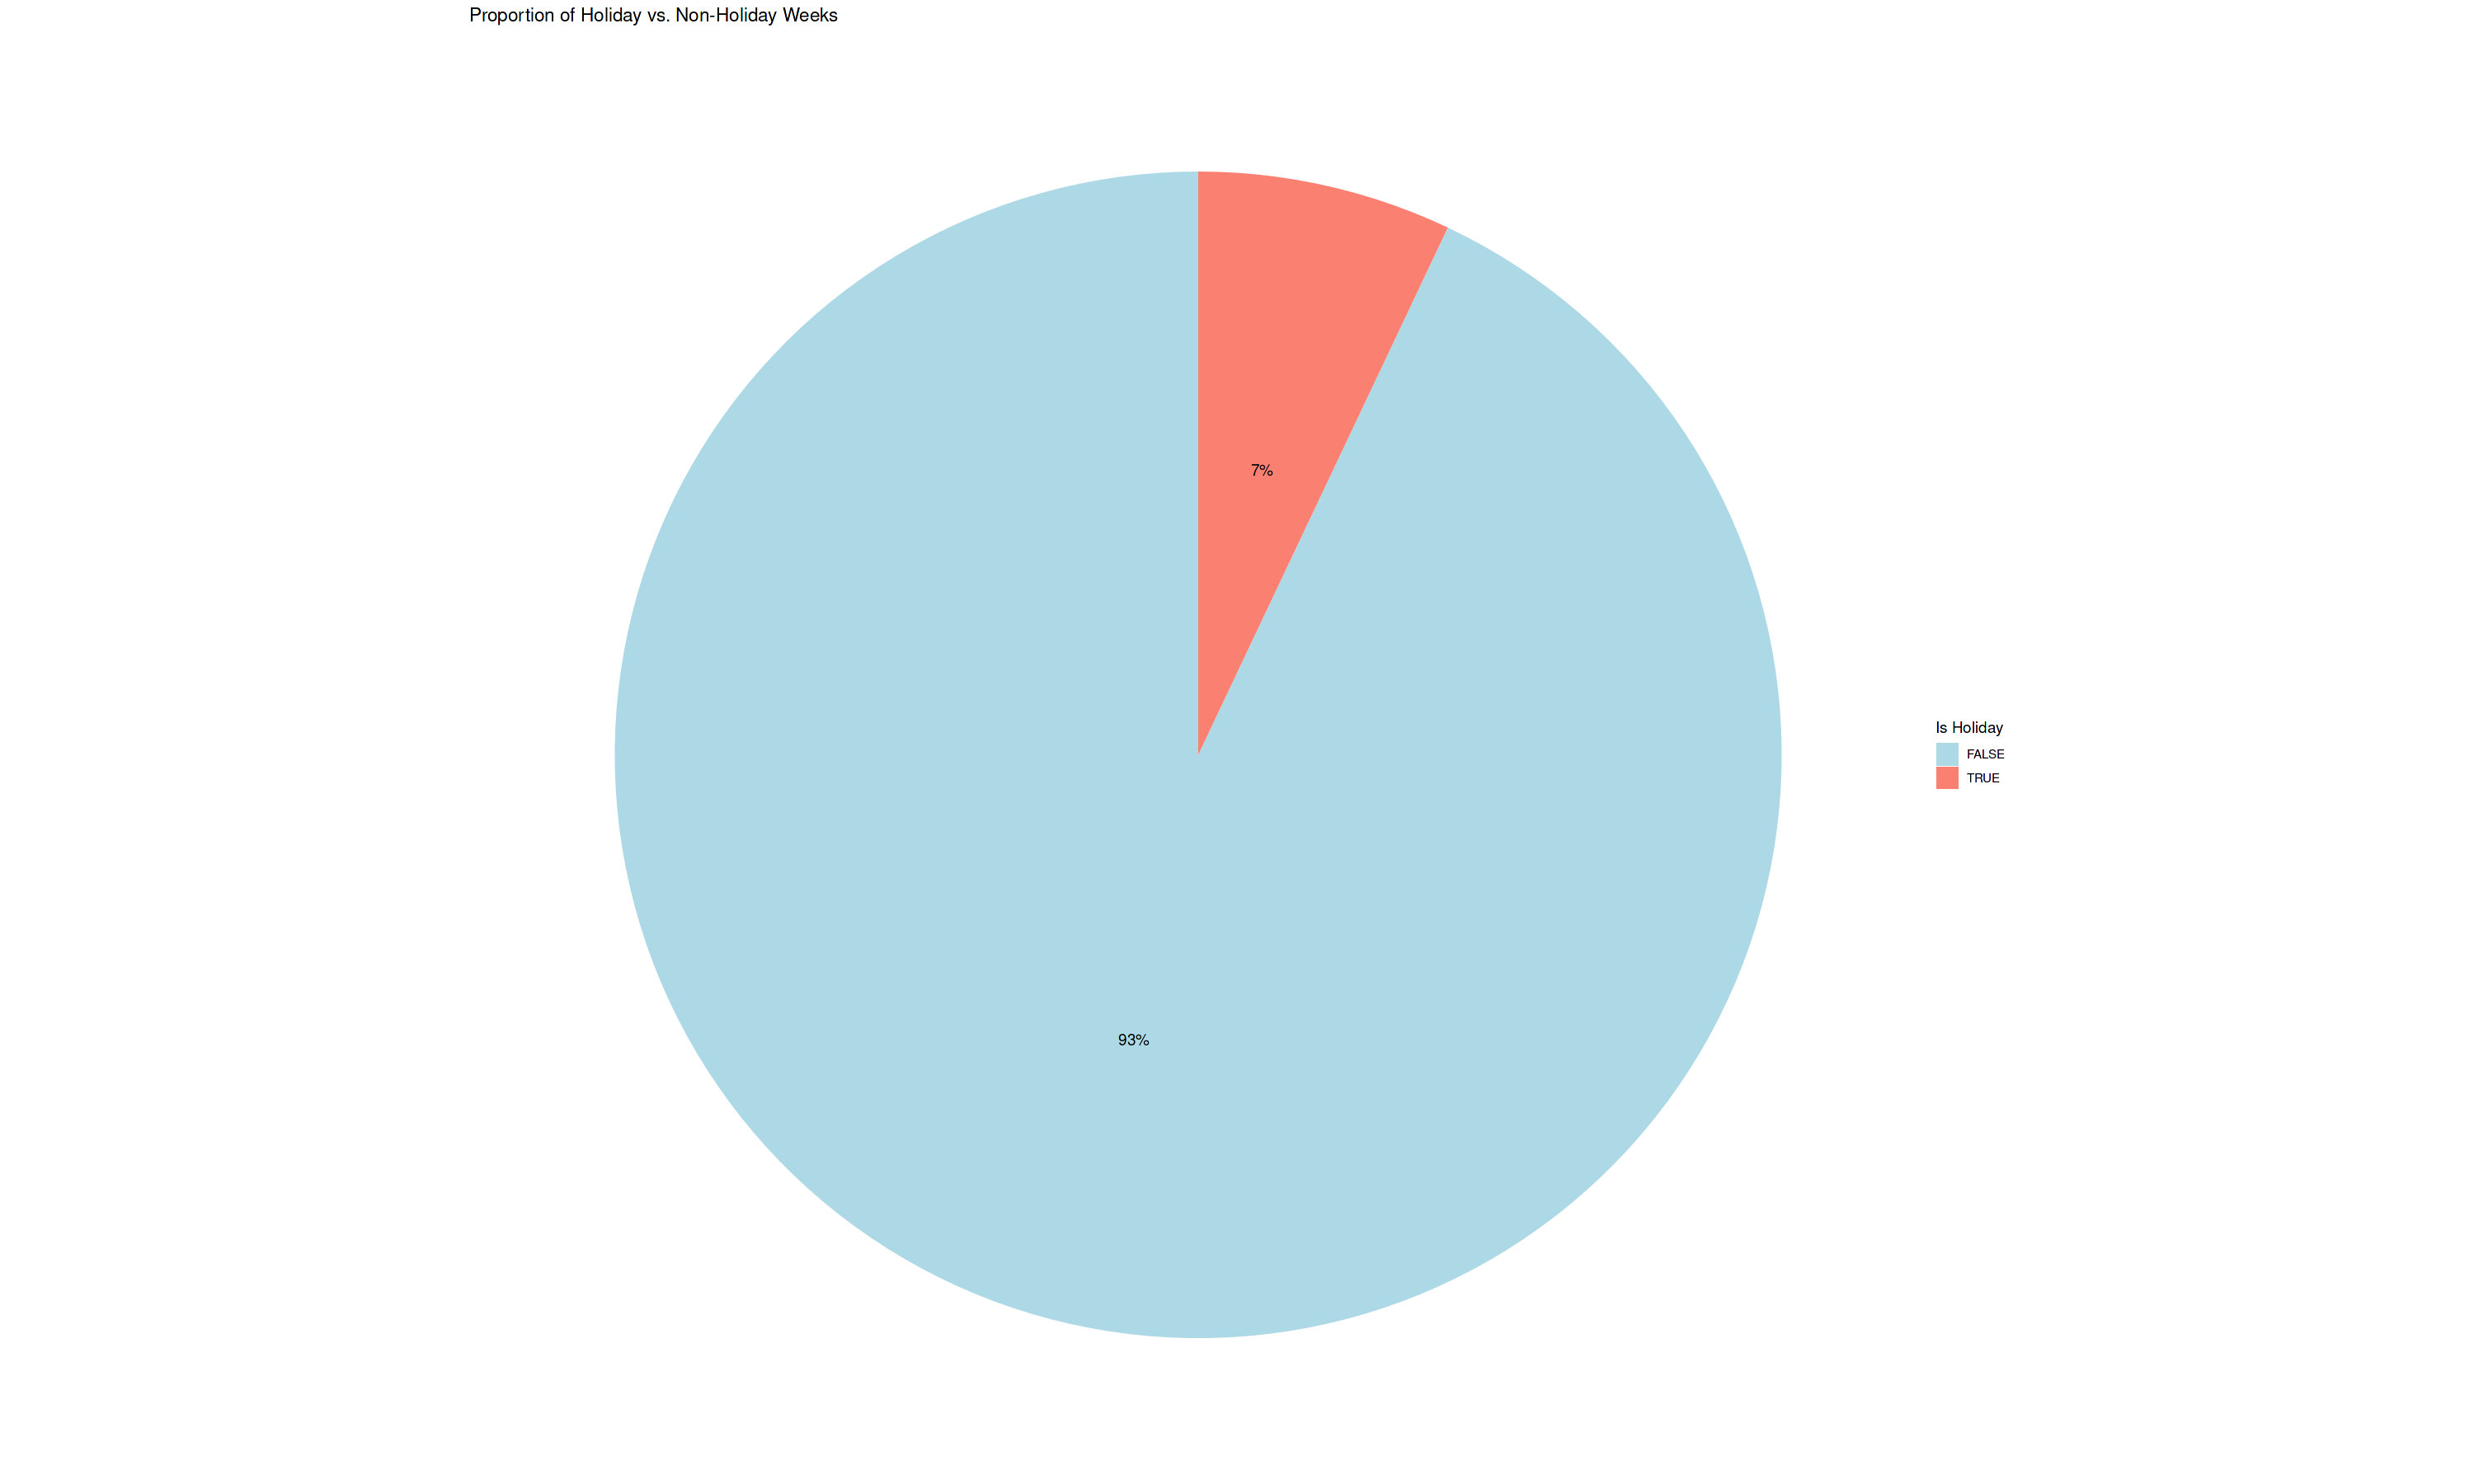

In [35]:
p4 <- df %>%
  count(IsHoliday) %>%
  mutate(Percentage = n / sum(n) * 100) %>%
  ggplot(aes(x = "", y = Percentage, fill = IsHoliday)) +
  geom_bar(stat = "identity", width = 0.4) +
  coord_polar("y") +
  labs(
    title = "Proportion of Holiday vs. Non-Holiday Weeks",
    fill = "Is Holiday"
  ) +
  scale_fill_manual(values = c("FALSE" = "lightblue", "TRUE" = "salmon")) +
  theme_void() +
  geom_text(aes(label = paste0(round(Percentage, 1), "%")), position = position_stack(vjust = 0.5))

p4

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”


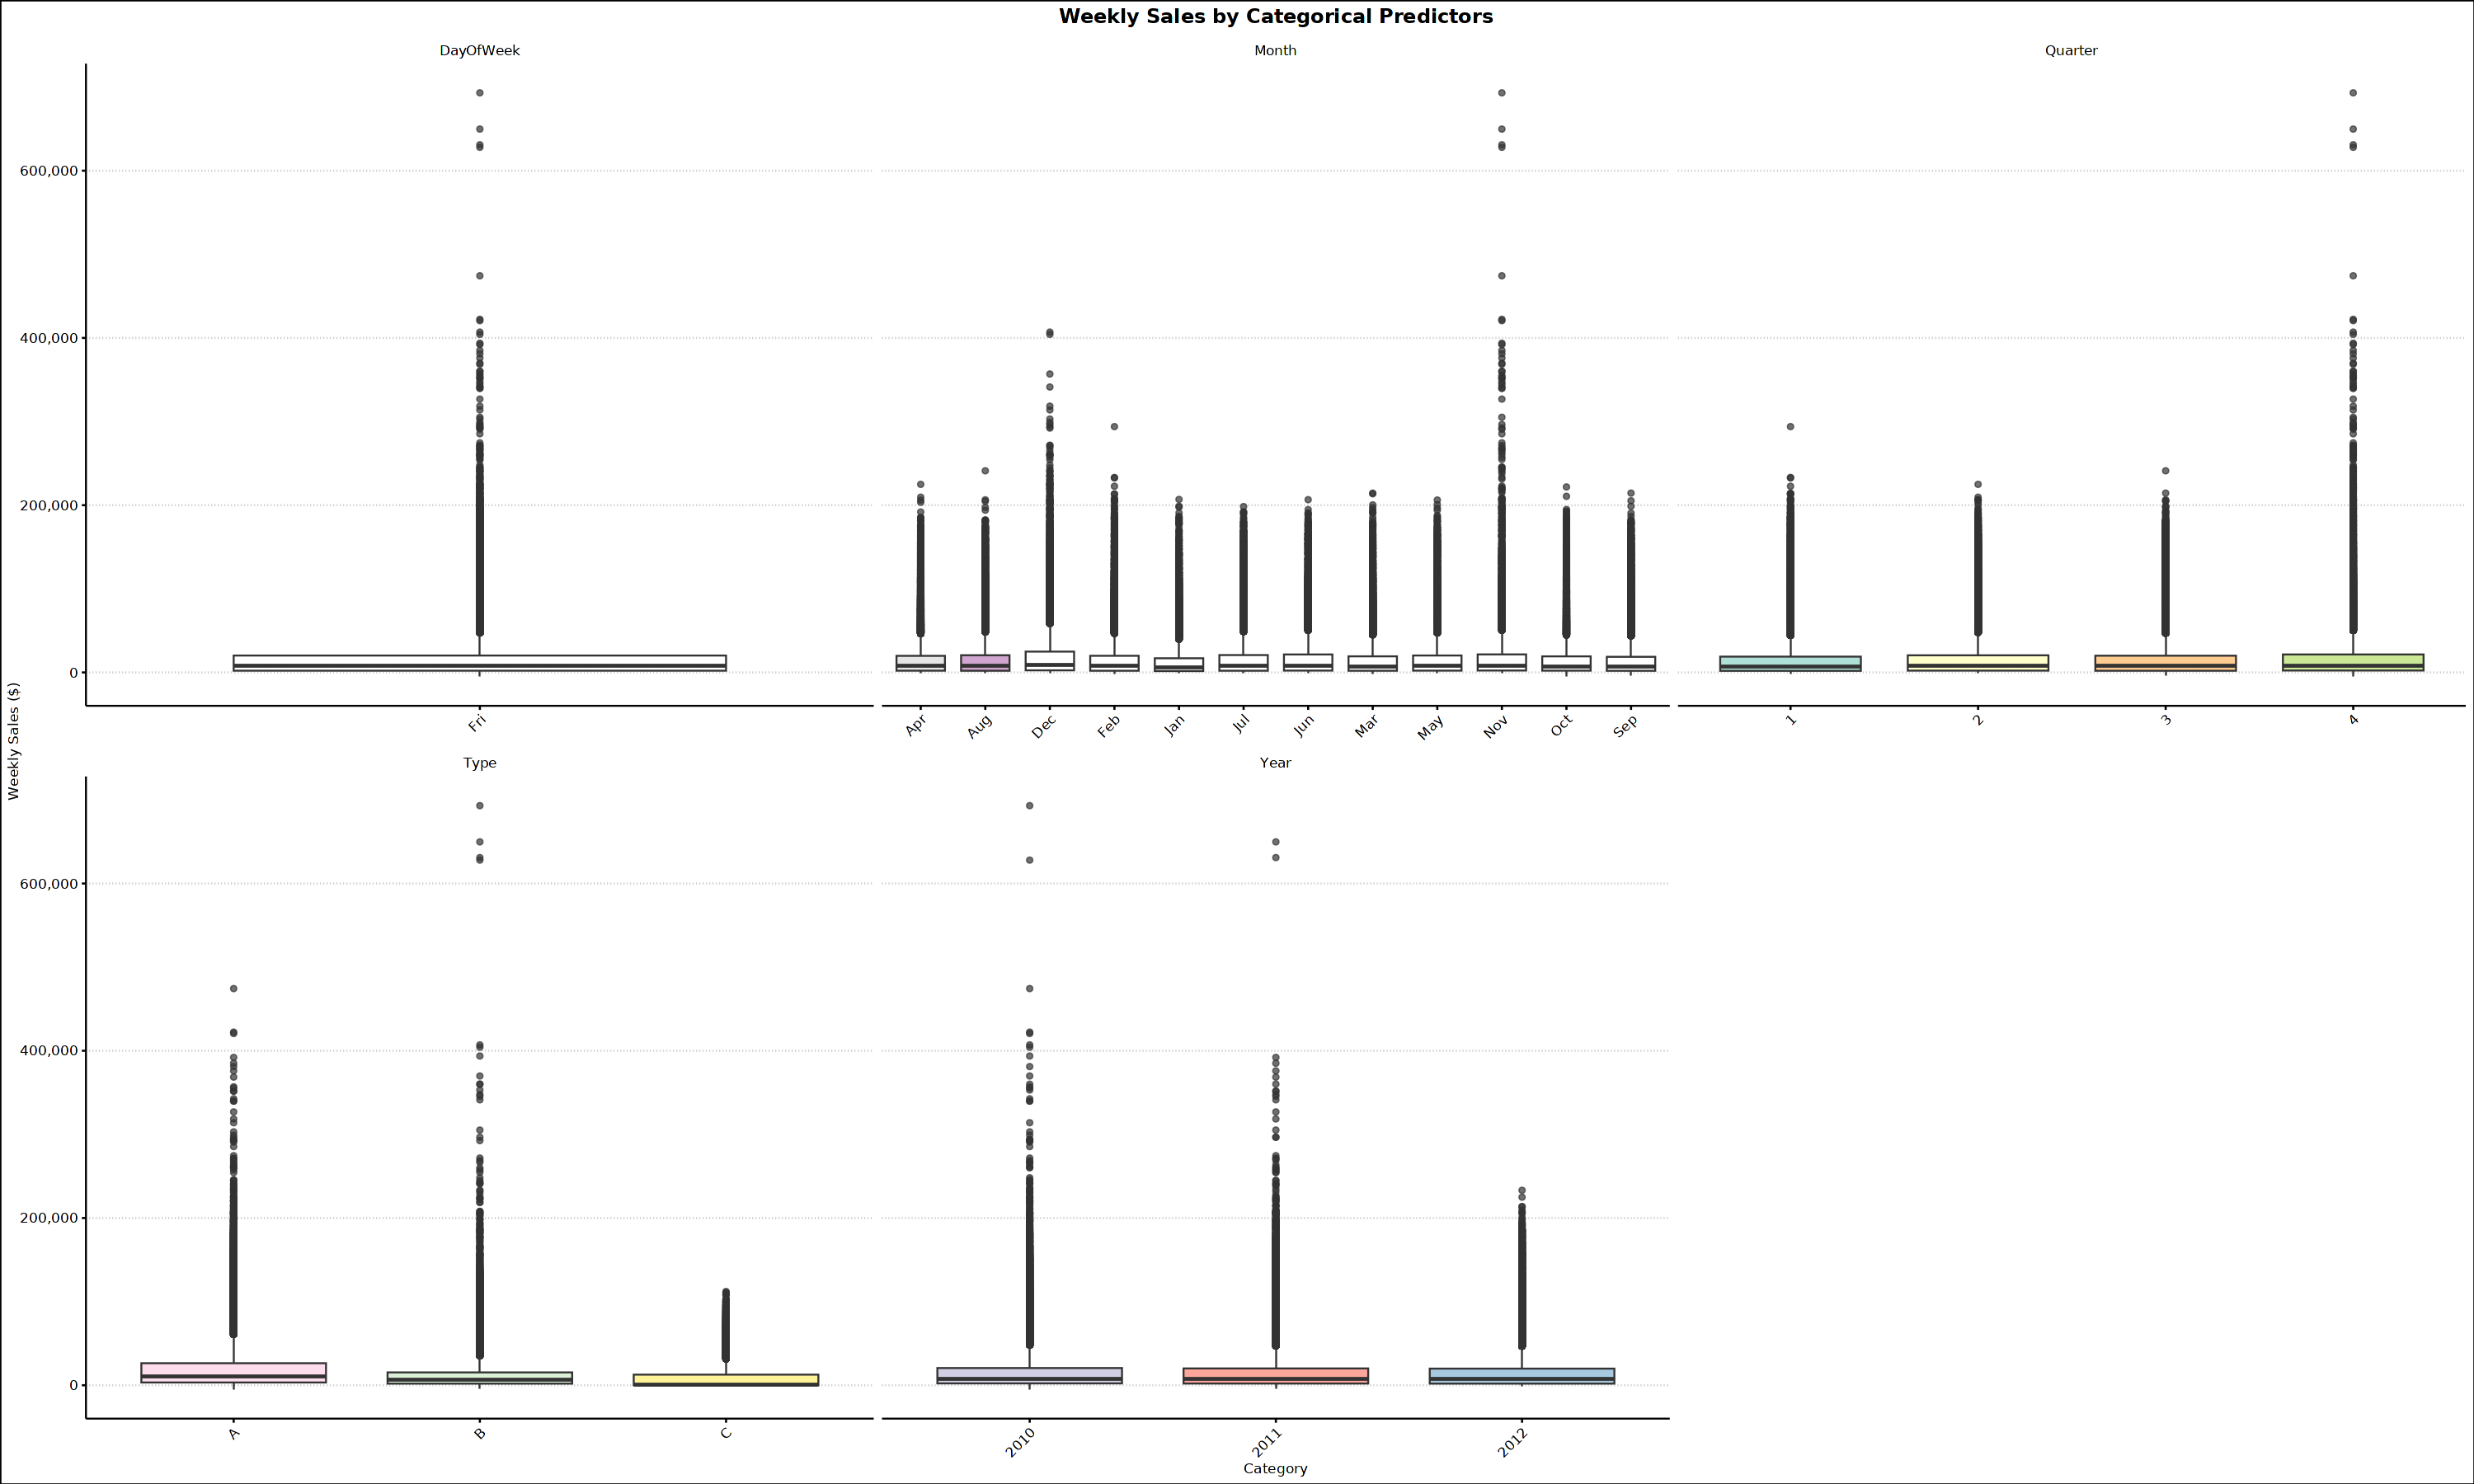

In [36]:

p8 <- df %>%
  select(Weekly_Sales, Type, Year, Month, Quarter, DayOfWeek) %>%
  mutate(across(-Weekly_Sales, as.character)) %>%   # convert all predictors to character
  pivot_longer(-Weekly_Sales, names_to = "Variable", values_to = "Value") %>%
  mutate(Value = as.factor(Value)) %>%
  ggplot(aes(x = Value, y = Weekly_Sales, fill = Value)) +
  geom_boxplot(alpha = 0.7) +
  facet_wrap(~ Variable, scales = "free_x", ncol = 3) +
  labs(
    title = "Weekly Sales by Categorical Predictors",
    x = "Category",
    y = "Weekly Sales ($)"
  ) +
  scale_y_continuous(labels = comma) +
  scale_fill_brewer(palette = "Set3") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
  )

p8

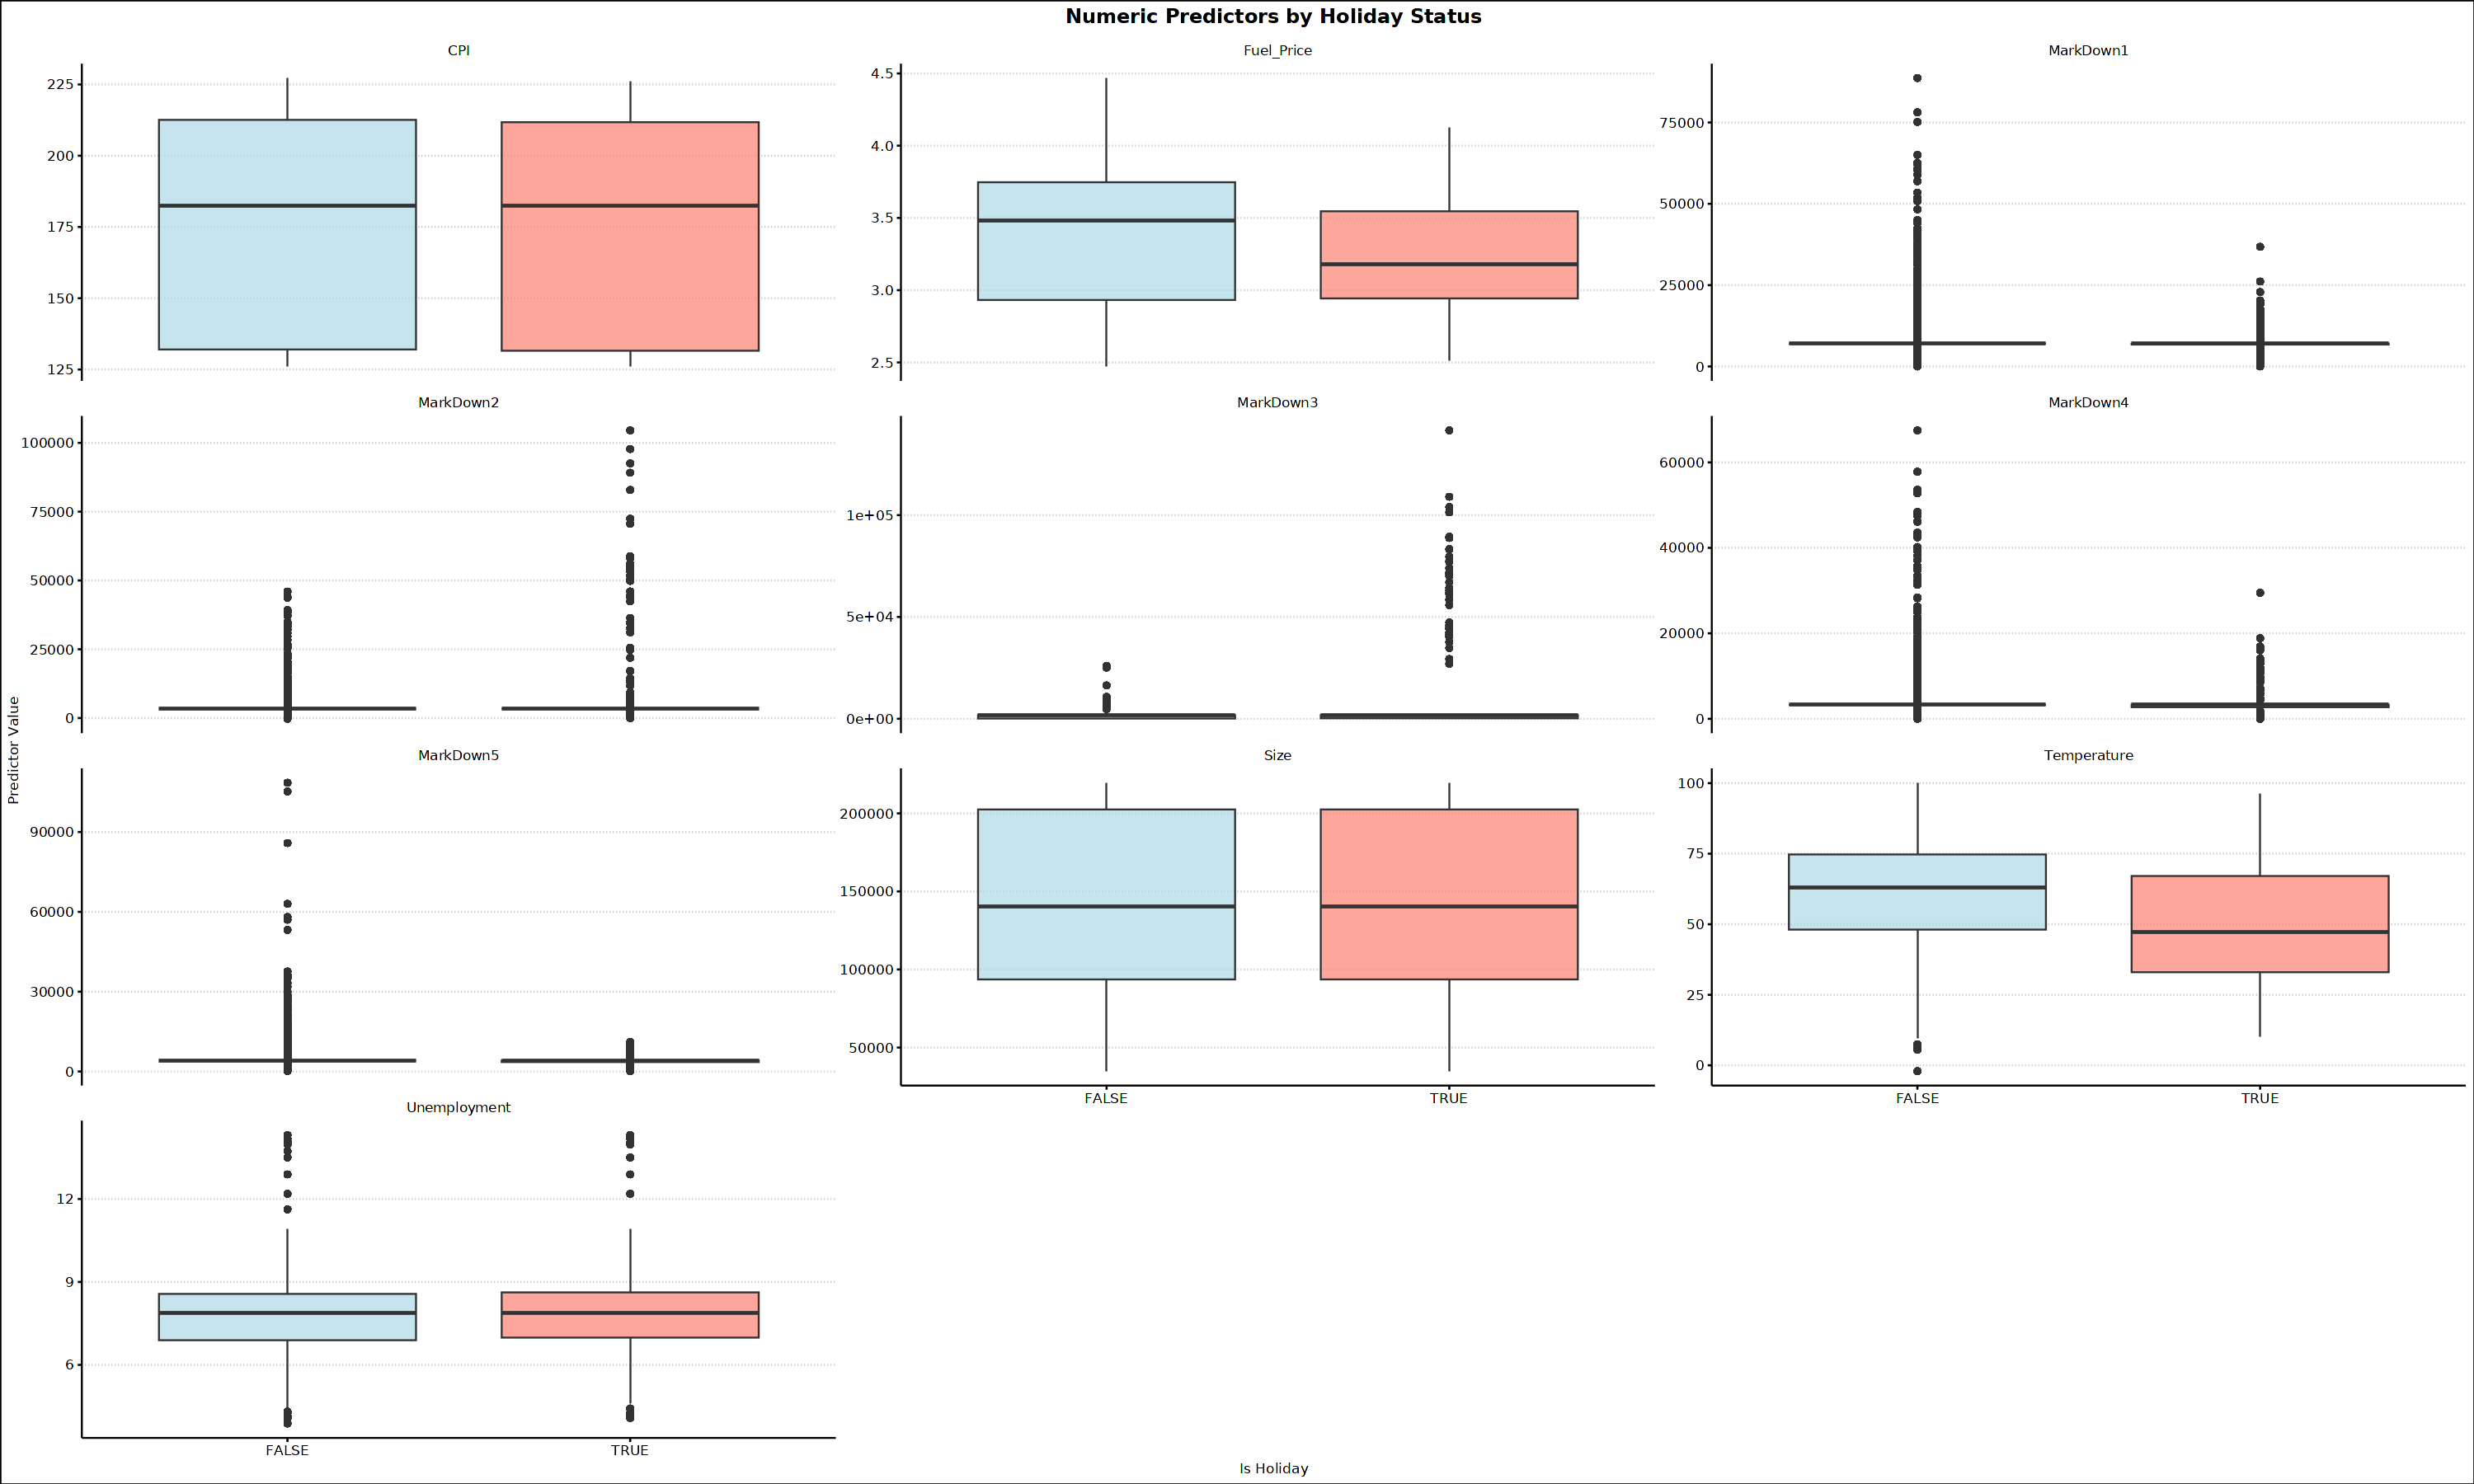

In [37]:
p9 <- df %>%
  select(IsHoliday, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, Size) %>%
  pivot_longer(-IsHoliday, names_to = "Variable", values_to = "Value") %>%
  ggplot(aes(x = IsHoliday, y = Value, fill = IsHoliday)) +
  geom_boxplot(alpha = 0.7) +
  facet_wrap(~ Variable, scales = "free_y", ncol = 3) +
  labs(
    title = "Numeric Predictors by Holiday Status",
    x = "Is Holiday",
    y = "Predictor Value"
  ) +
  scale_fill_manual(values = c("FALSE" = "lightblue", "TRUE" = "salmon")) +
  theme(legend.position = "none")

p9

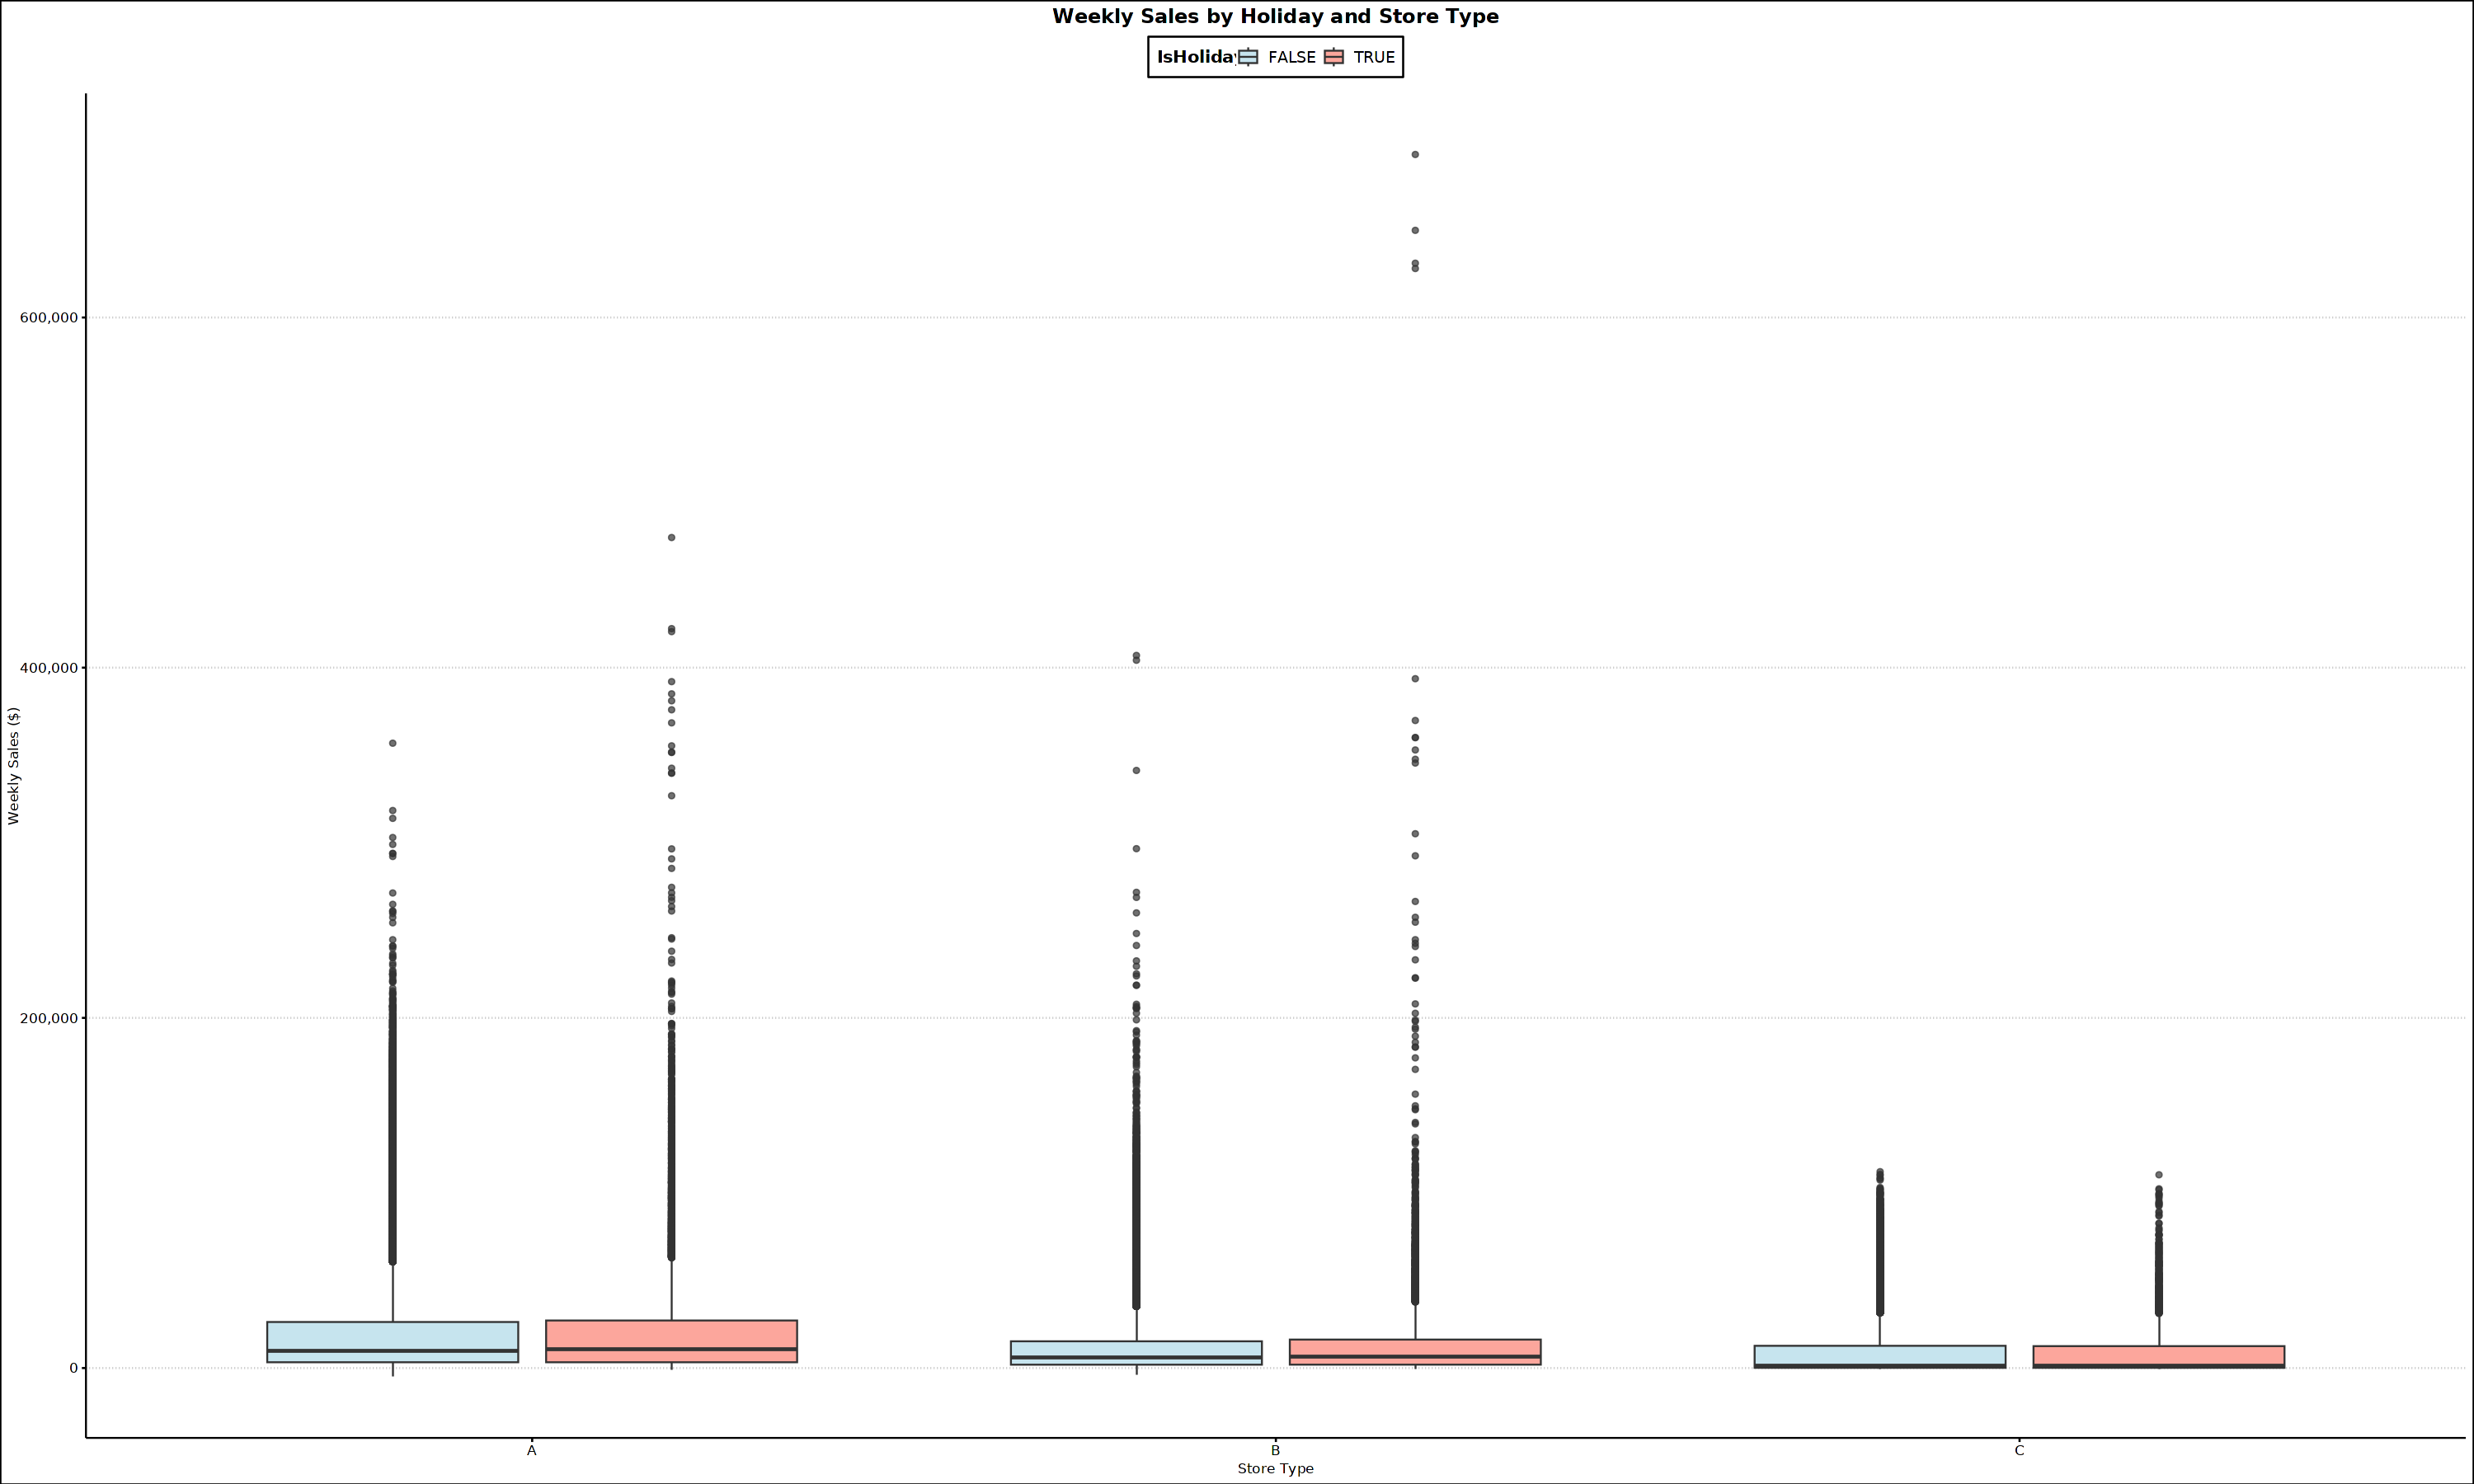

In [38]:
p10 <- ggplot(df, aes(x = Type, y = Weekly_Sales, fill = IsHoliday)) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Weekly Sales by Holiday and Store Type",
    x = "Store Type",
    y = "Weekly Sales ($)"
  ) +
  scale_y_continuous(labels = comma) +
  scale_fill_manual(values = c("FALSE" = "lightblue", "TRUE" = "salmon")) +
  theme(legend.title = element_text(face = "bold"))

p10

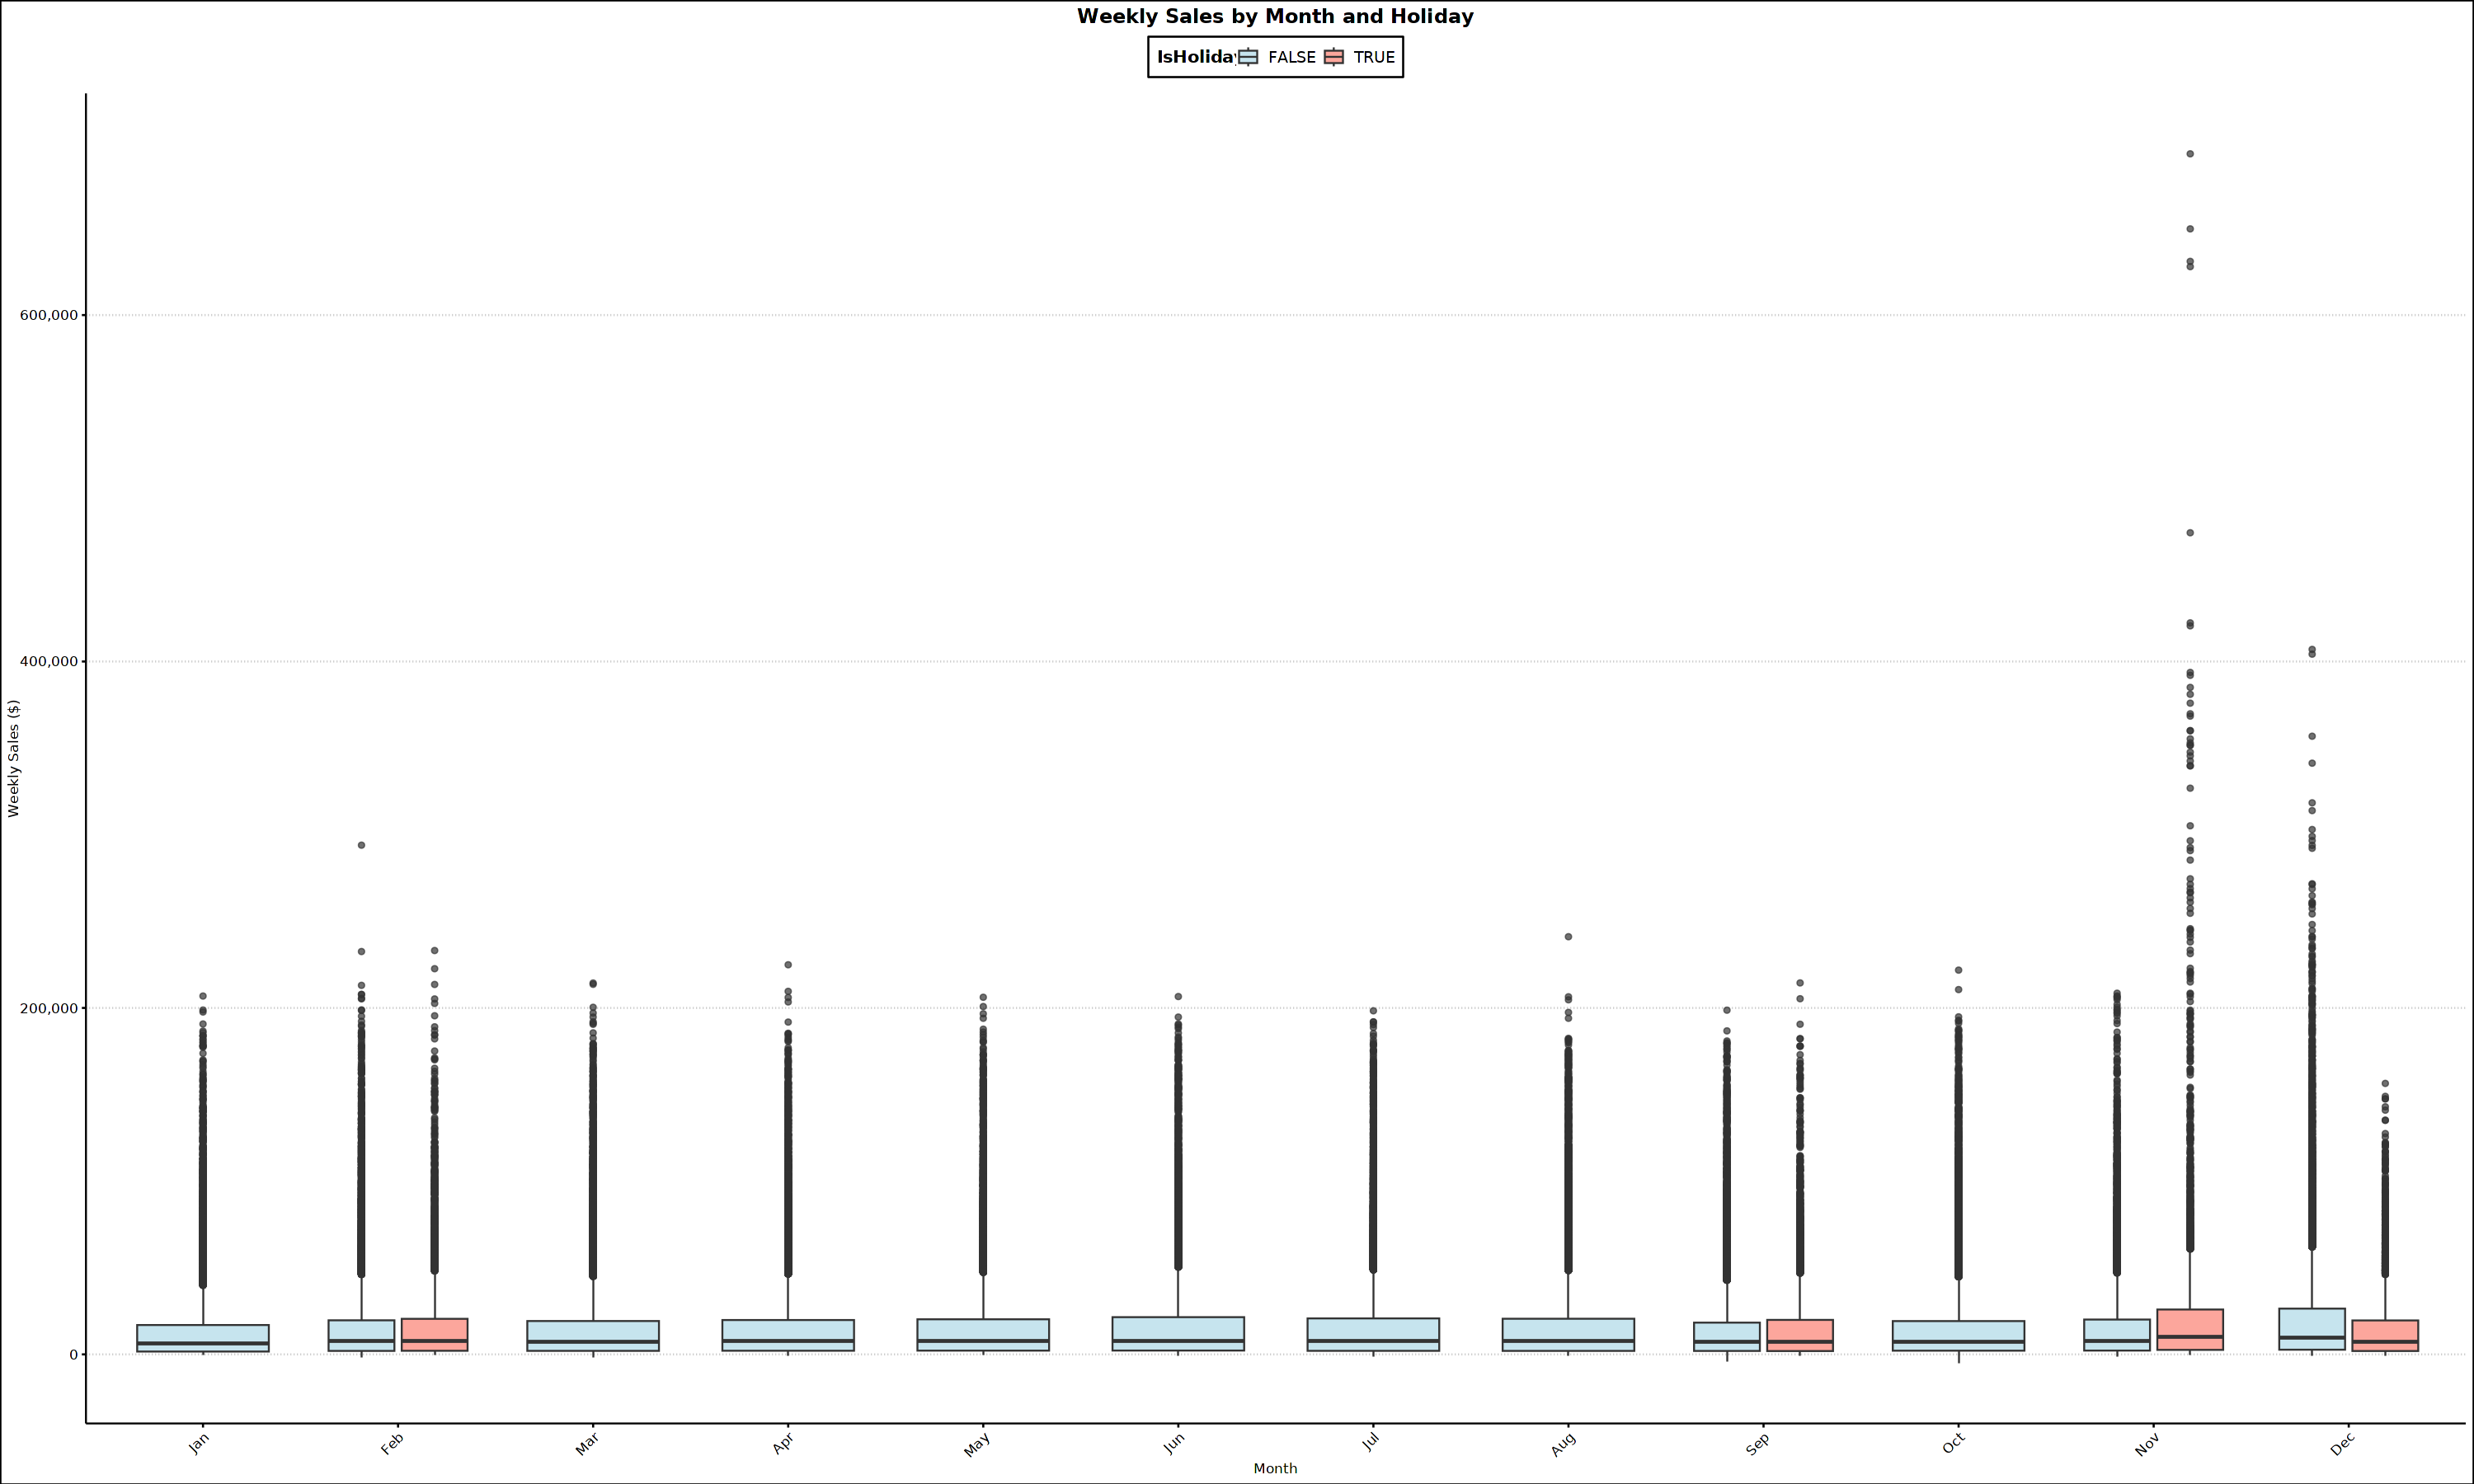

In [39]:
p11 <- ggplot(df, aes(x = Month, y = Weekly_Sales, fill = IsHoliday)) +
  geom_boxplot(alpha = 0.7) +
  labs(
    title = "Weekly Sales by Month and Holiday",
    x = "Month",
    y = "Weekly Sales ($)"
  ) +
  scale_y_continuous(labels = comma) +
  scale_fill_manual(values = c("FALSE" = "lightblue", "TRUE" = "salmon")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

p11

`geom_smooth()` using formula = 'y ~ x'


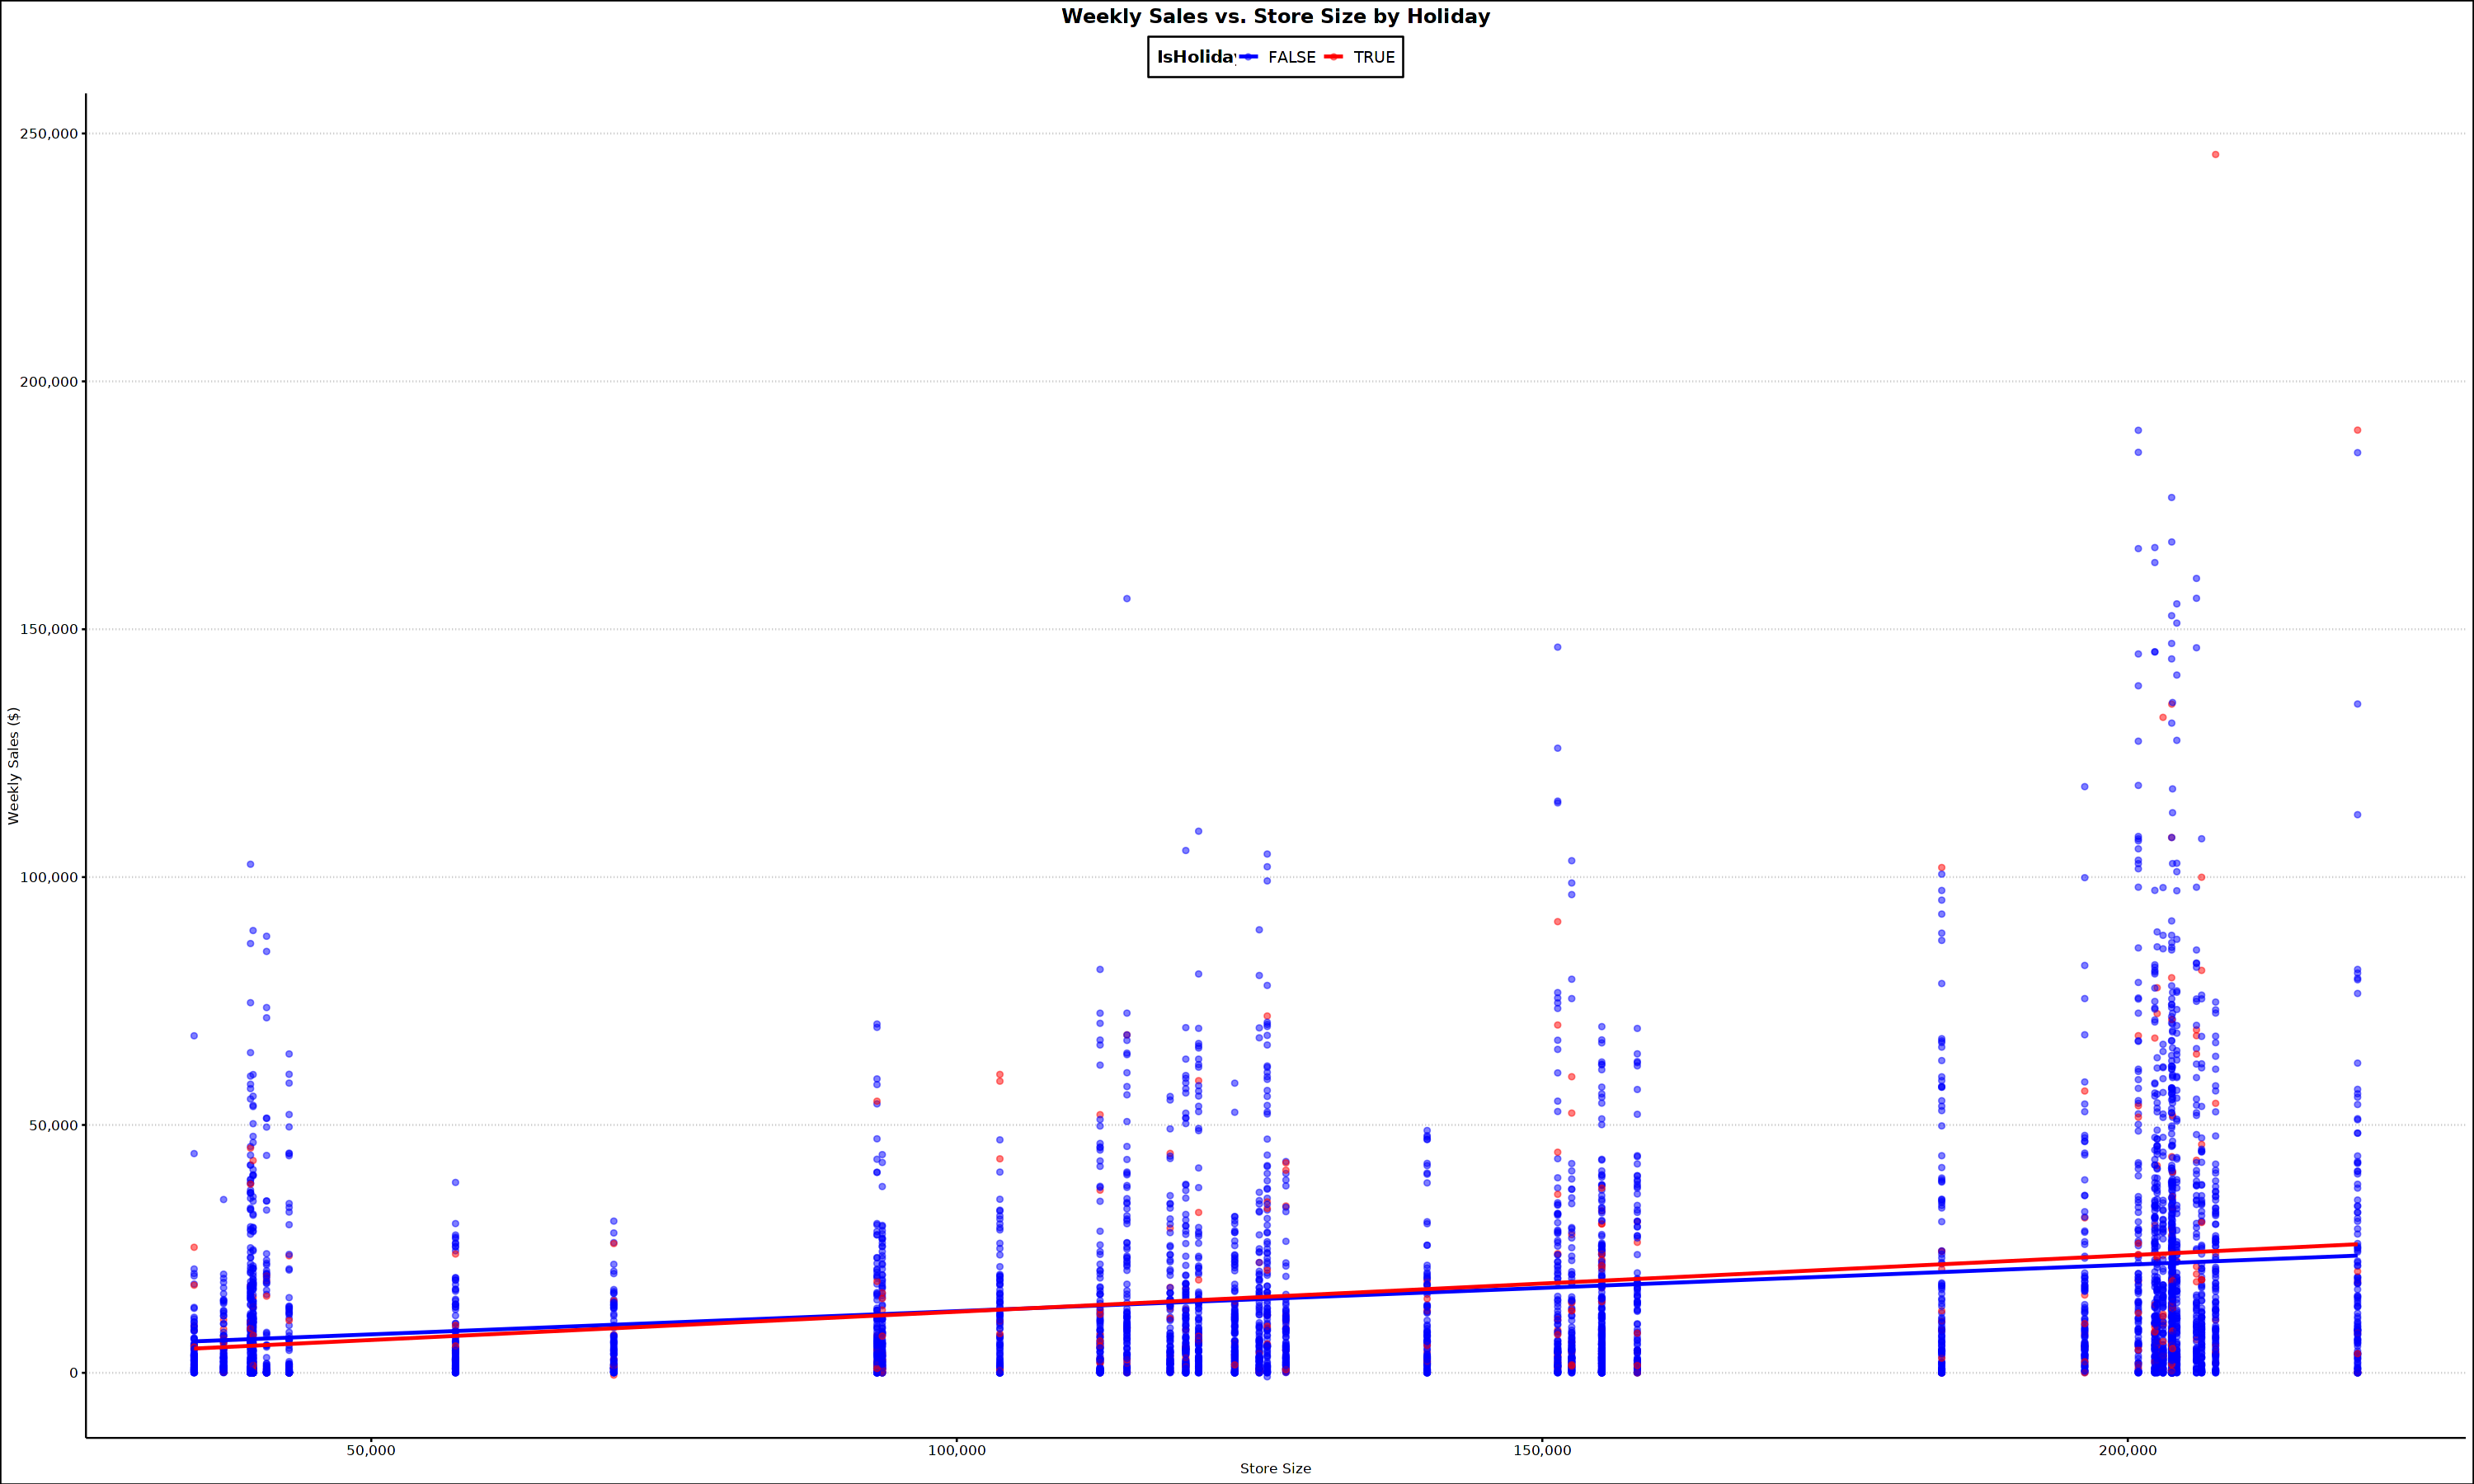

In [40]:
df_sample <- df %>% slice_sample(n = 5000)

p12 <- ggplot(df_sample, aes(x = Size, y = Weekly_Sales, color = IsHoliday)) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(
    title = "Weekly Sales vs. Store Size by Holiday",
    x = "Store Size",
    y = "Weekly Sales ($)"
  ) +
  scale_x_continuous(labels = comma) +
  scale_y_continuous(labels = comma) +
  scale_color_manual(values = c("FALSE" = "blue", "TRUE" = "red")) +
  theme(legend.title = element_text(face = "bold"))

p12

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



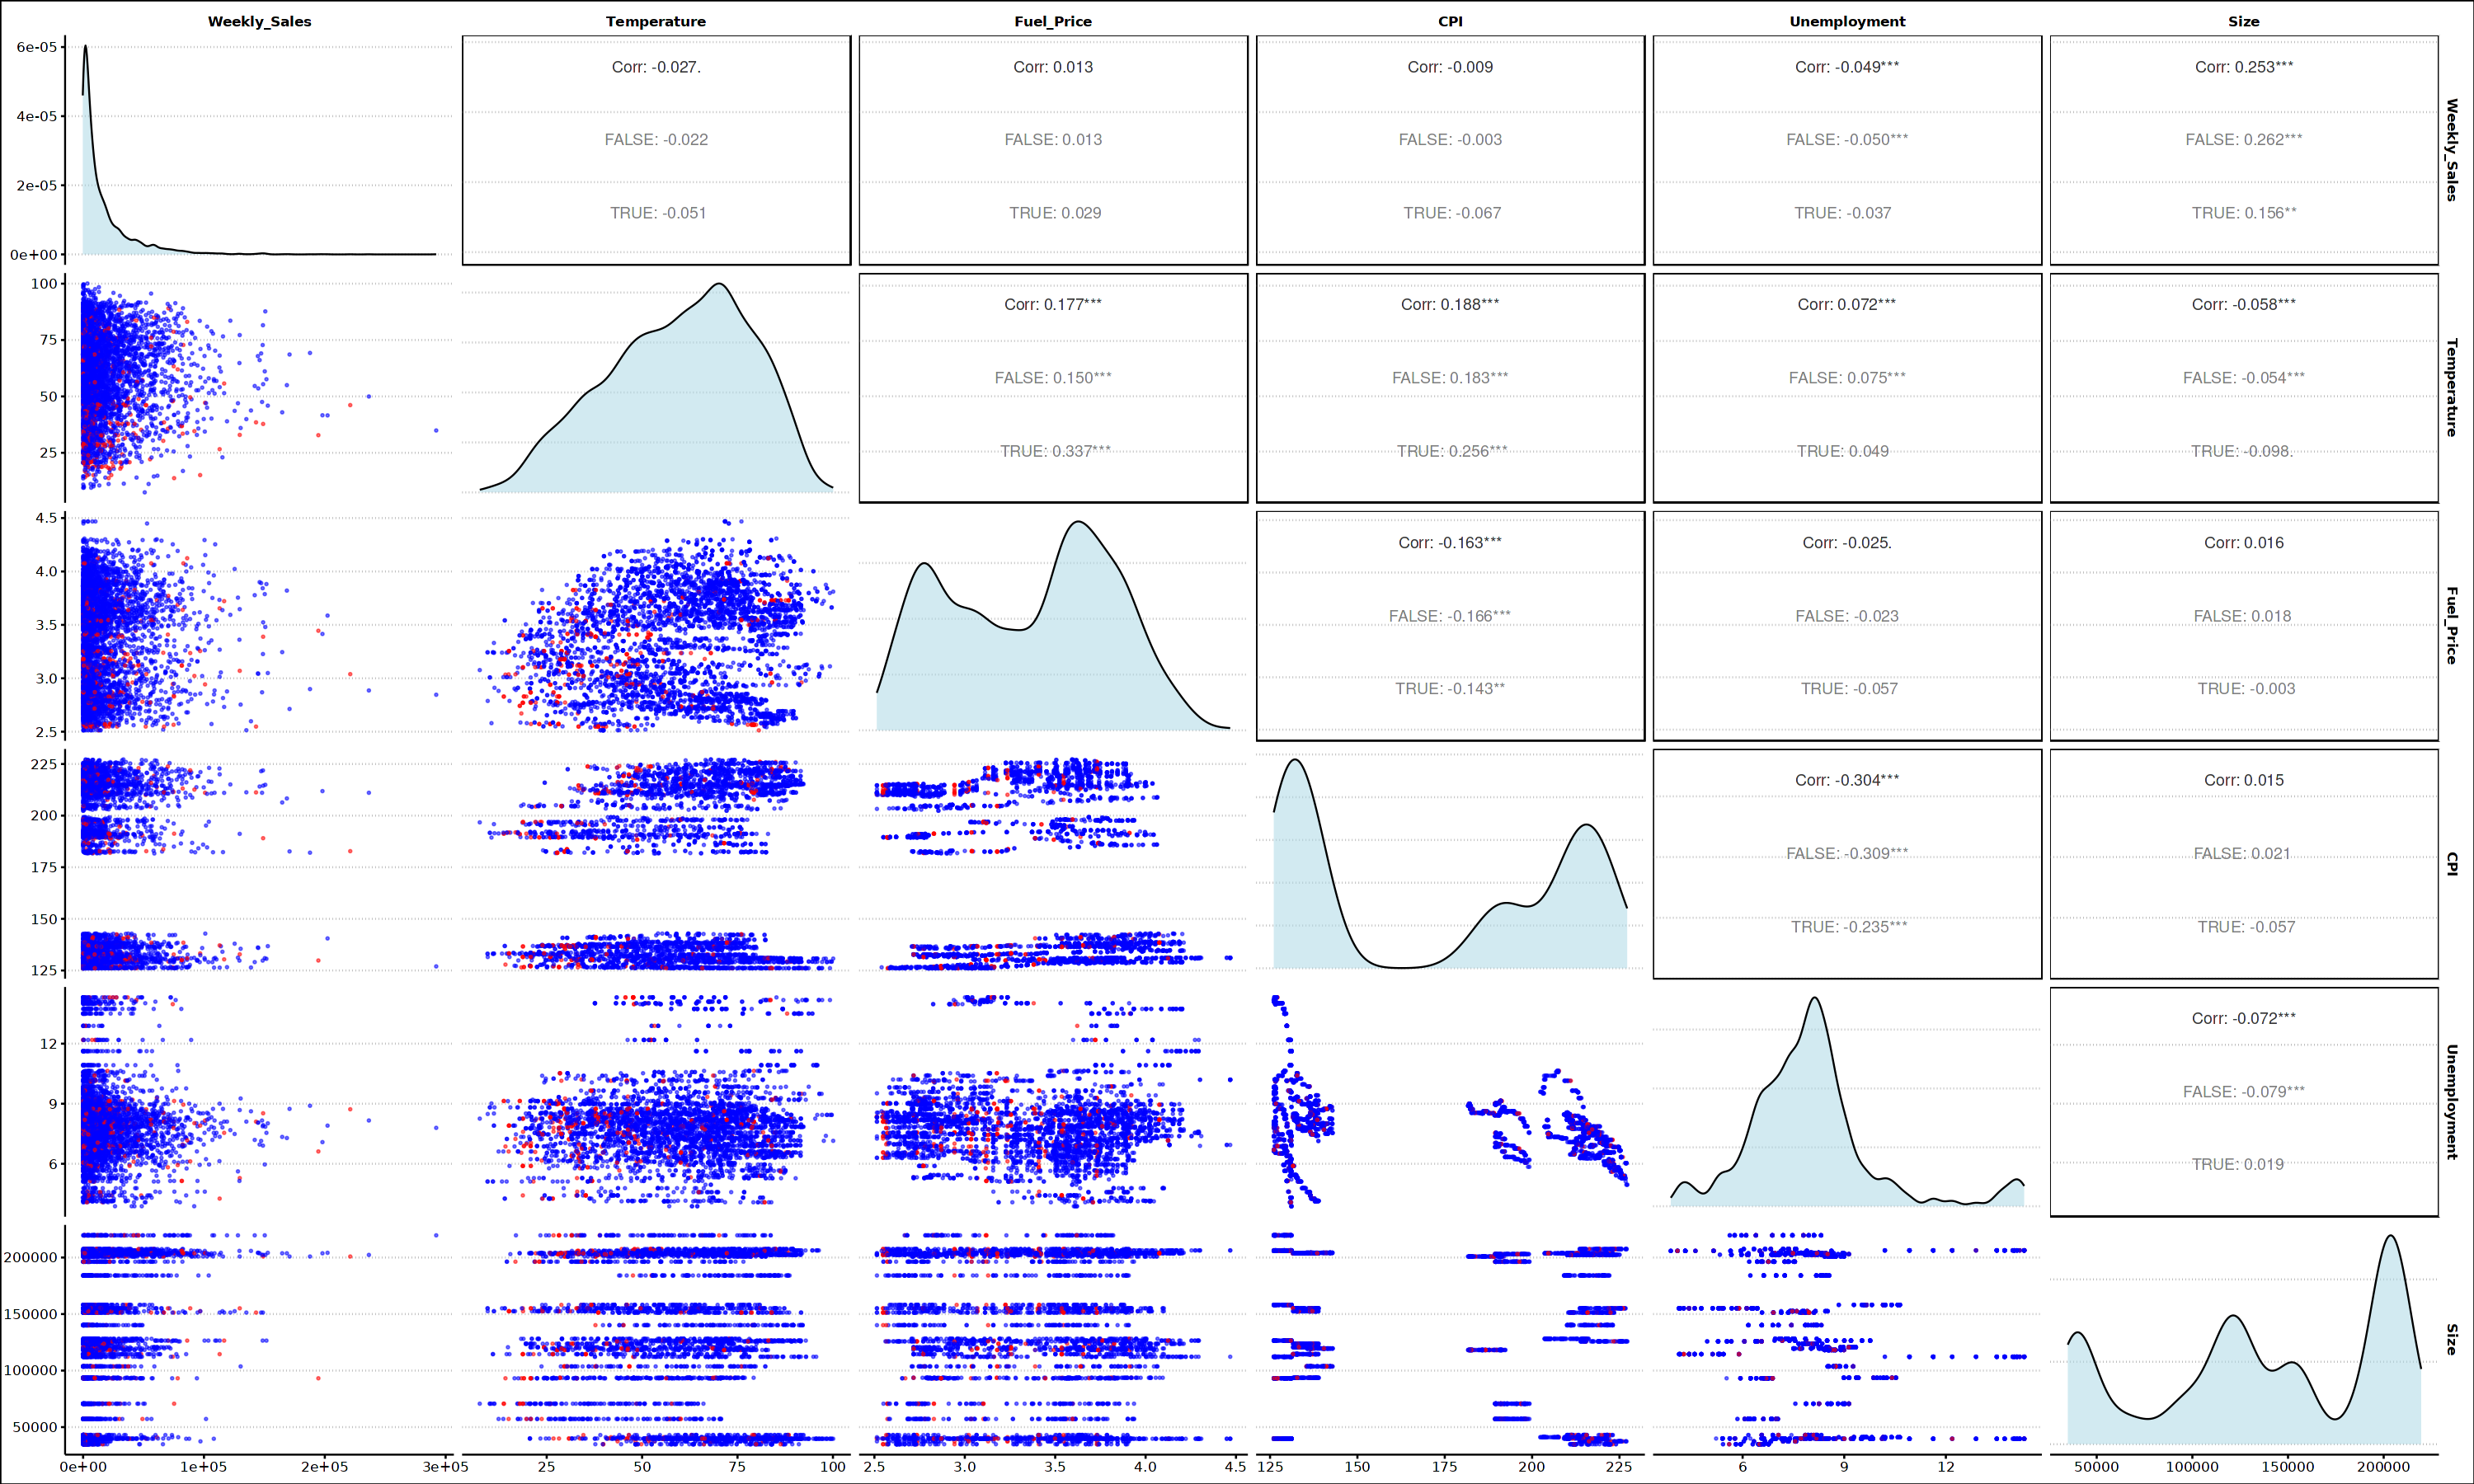

In [41]:
library(GGally)
library(dplyr)
library(ggplot2)
options(warn = -1) 
df_sample <- df %>% slice_sample(n = 5000)

# Ensure IsHoliday is a factor with correct levels
df_sample$IsHoliday <- factor(df_sample$IsHoliday, levels = c(FALSE, TRUE))

# Numeric columns for the pair plot
numeric_cols <- c("Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Size")

# Convert column names to indices
num_indices <- which(names(df_sample) %in% numeric_cols)

p13 <- ggpairs(
  df_sample,
  columns = num_indices,  # use numeric indices here
  mapping = aes(color = IsHoliday, alpha = 0.5),
  diag = list(continuous = wrap("densityDiag", fill = "lightblue")),
  lower = list(continuous = wrap("points", size = 0.5)),
  upper = list(continuous = wrap("cor", size = 4))
) +
  scale_color_manual(values = c(`FALSE` = "blue", `TRUE` = "red")) +  # match factor levels
  theme(strip.text = element_text(face = "bold"))

print(p13)


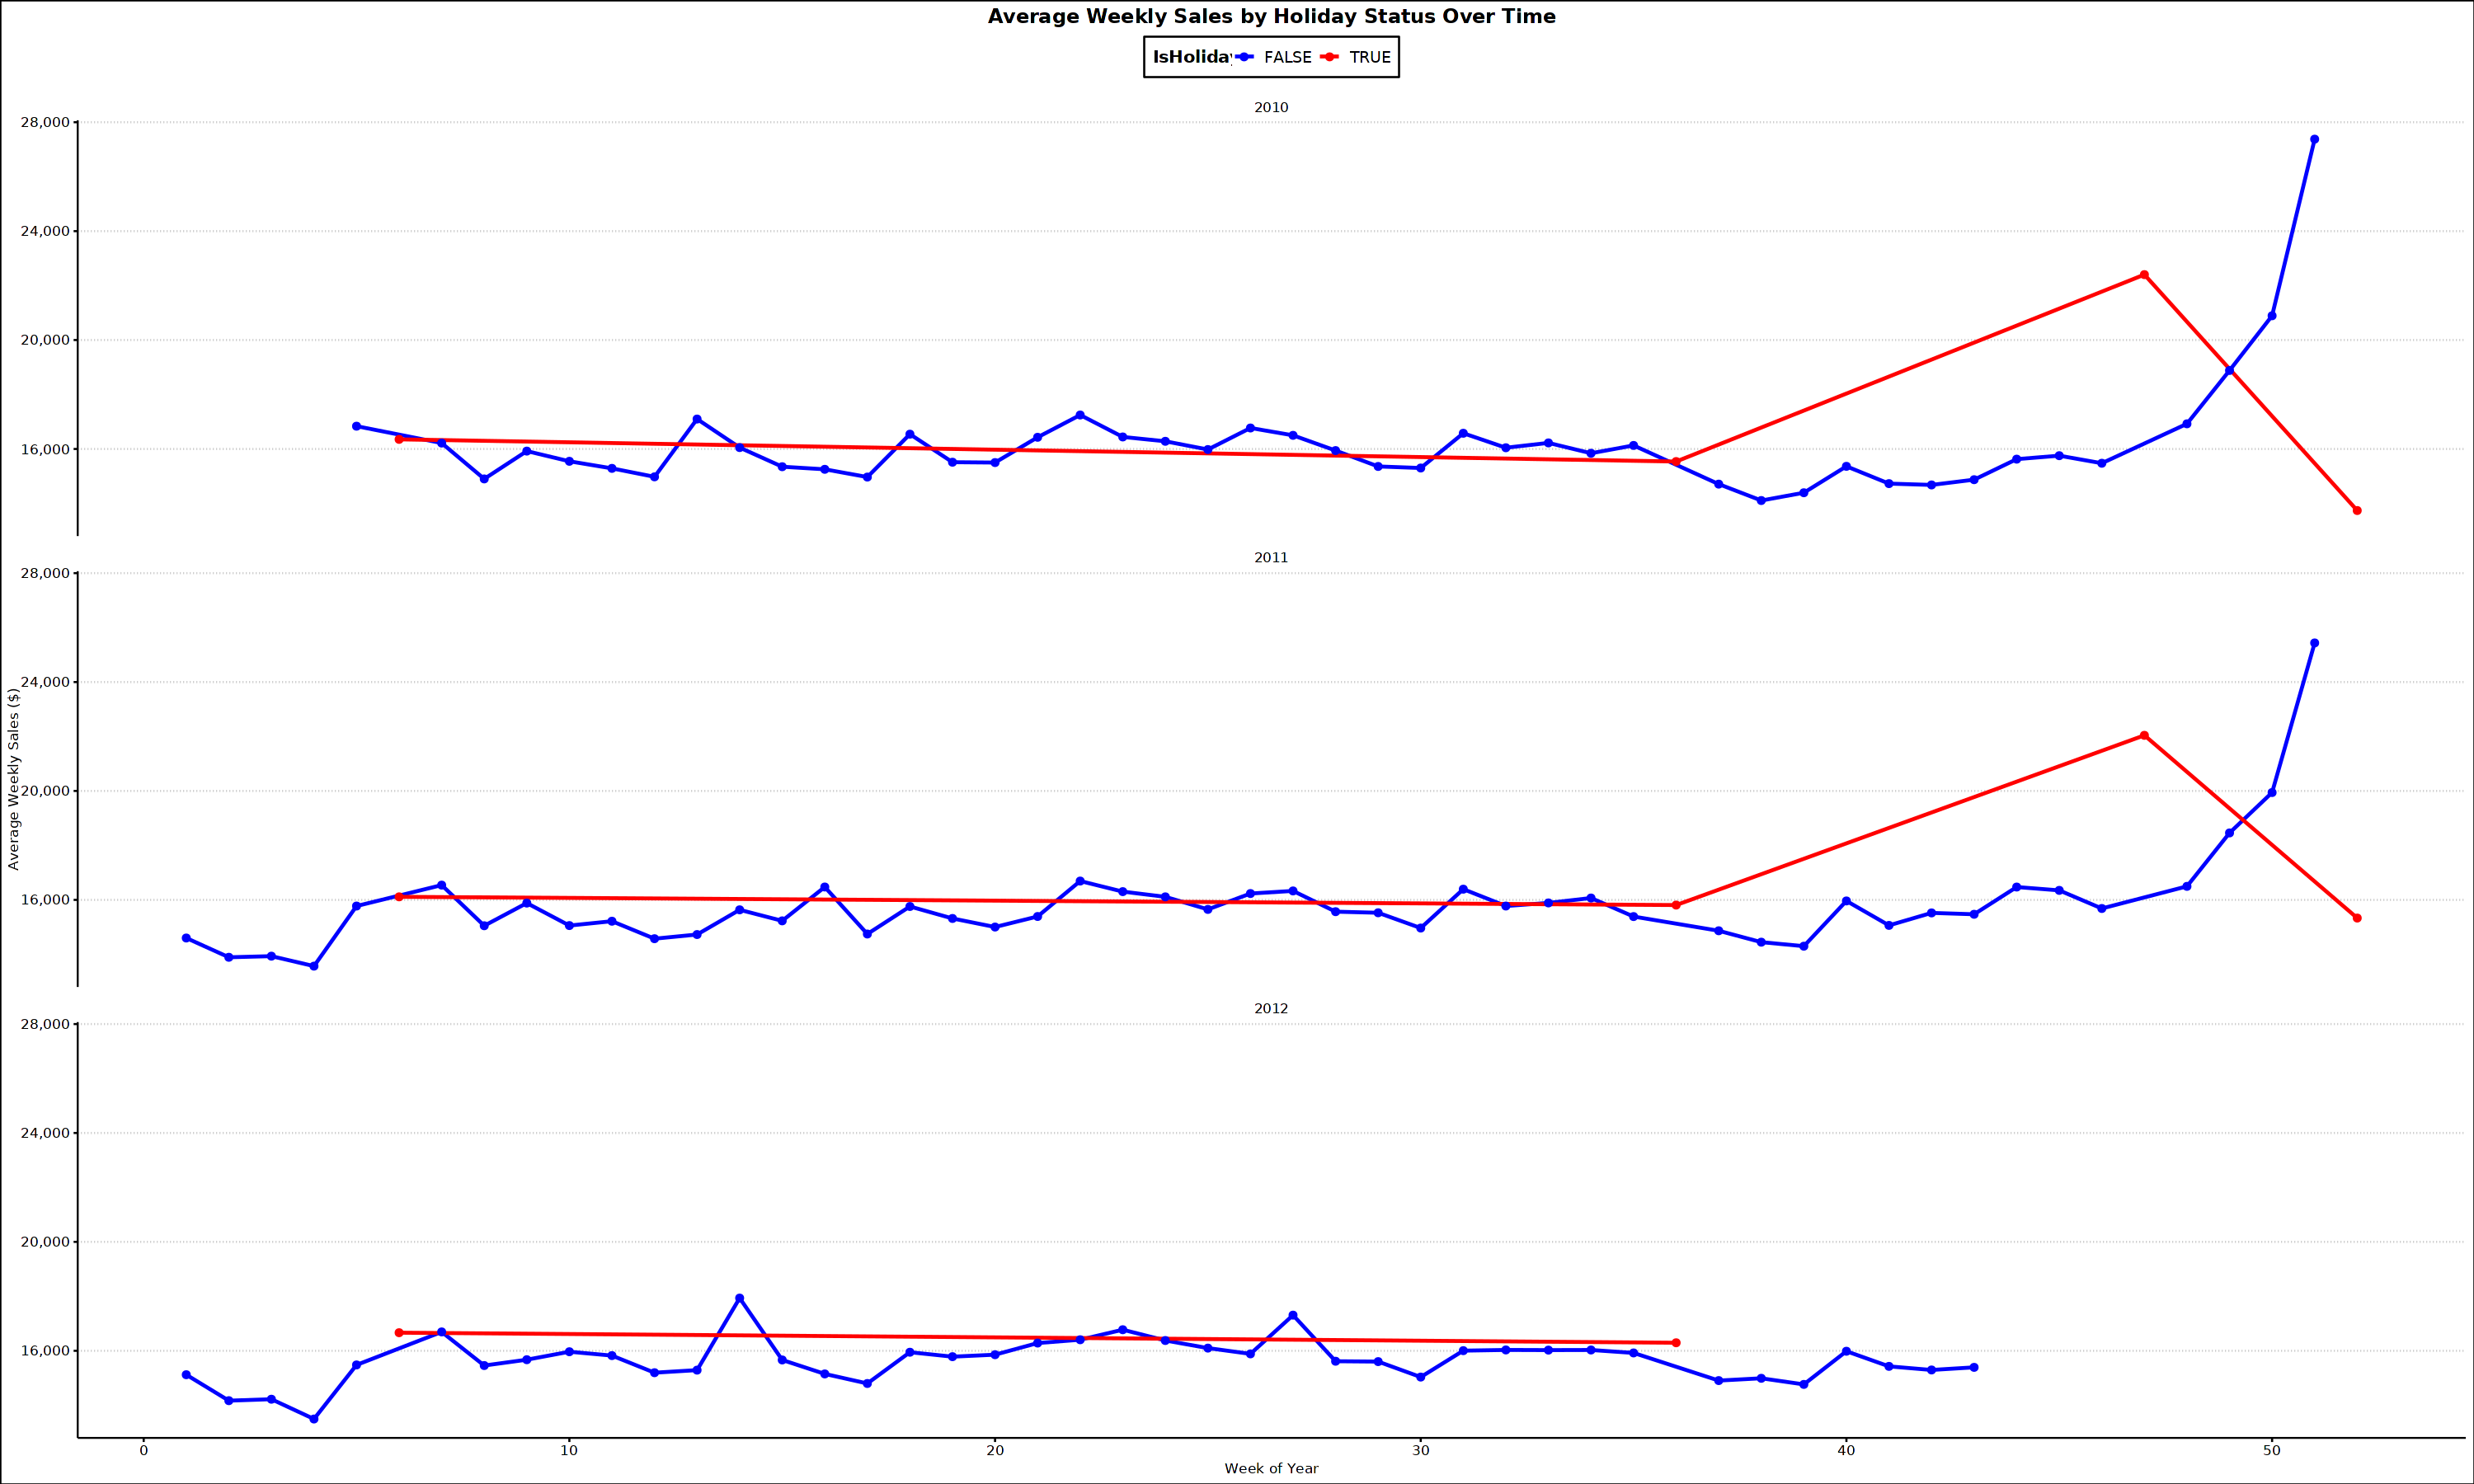

In [42]:
p15 <- df %>%
  group_by(Year, Week, IsHoliday) %>%
  summarise(Avg_Weekly_Sales = mean(Weekly_Sales, na.rm = TRUE), .groups = "drop") %>%
  ggplot(aes(x = Week, y = Avg_Weekly_Sales, color = IsHoliday, group = interaction(Year, IsHoliday))) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  facet_wrap(~ Year, ncol = 1) +
  labs(
    title = "Average Weekly Sales by Holiday Status Over Time",
    x = "Week of Year",
    y = "Average Weekly Sales ($)"
  ) +
  scale_y_continuous(labels = comma) +
  scale_color_manual(values = c("FALSE" = "blue", "TRUE" = "red"))

p15

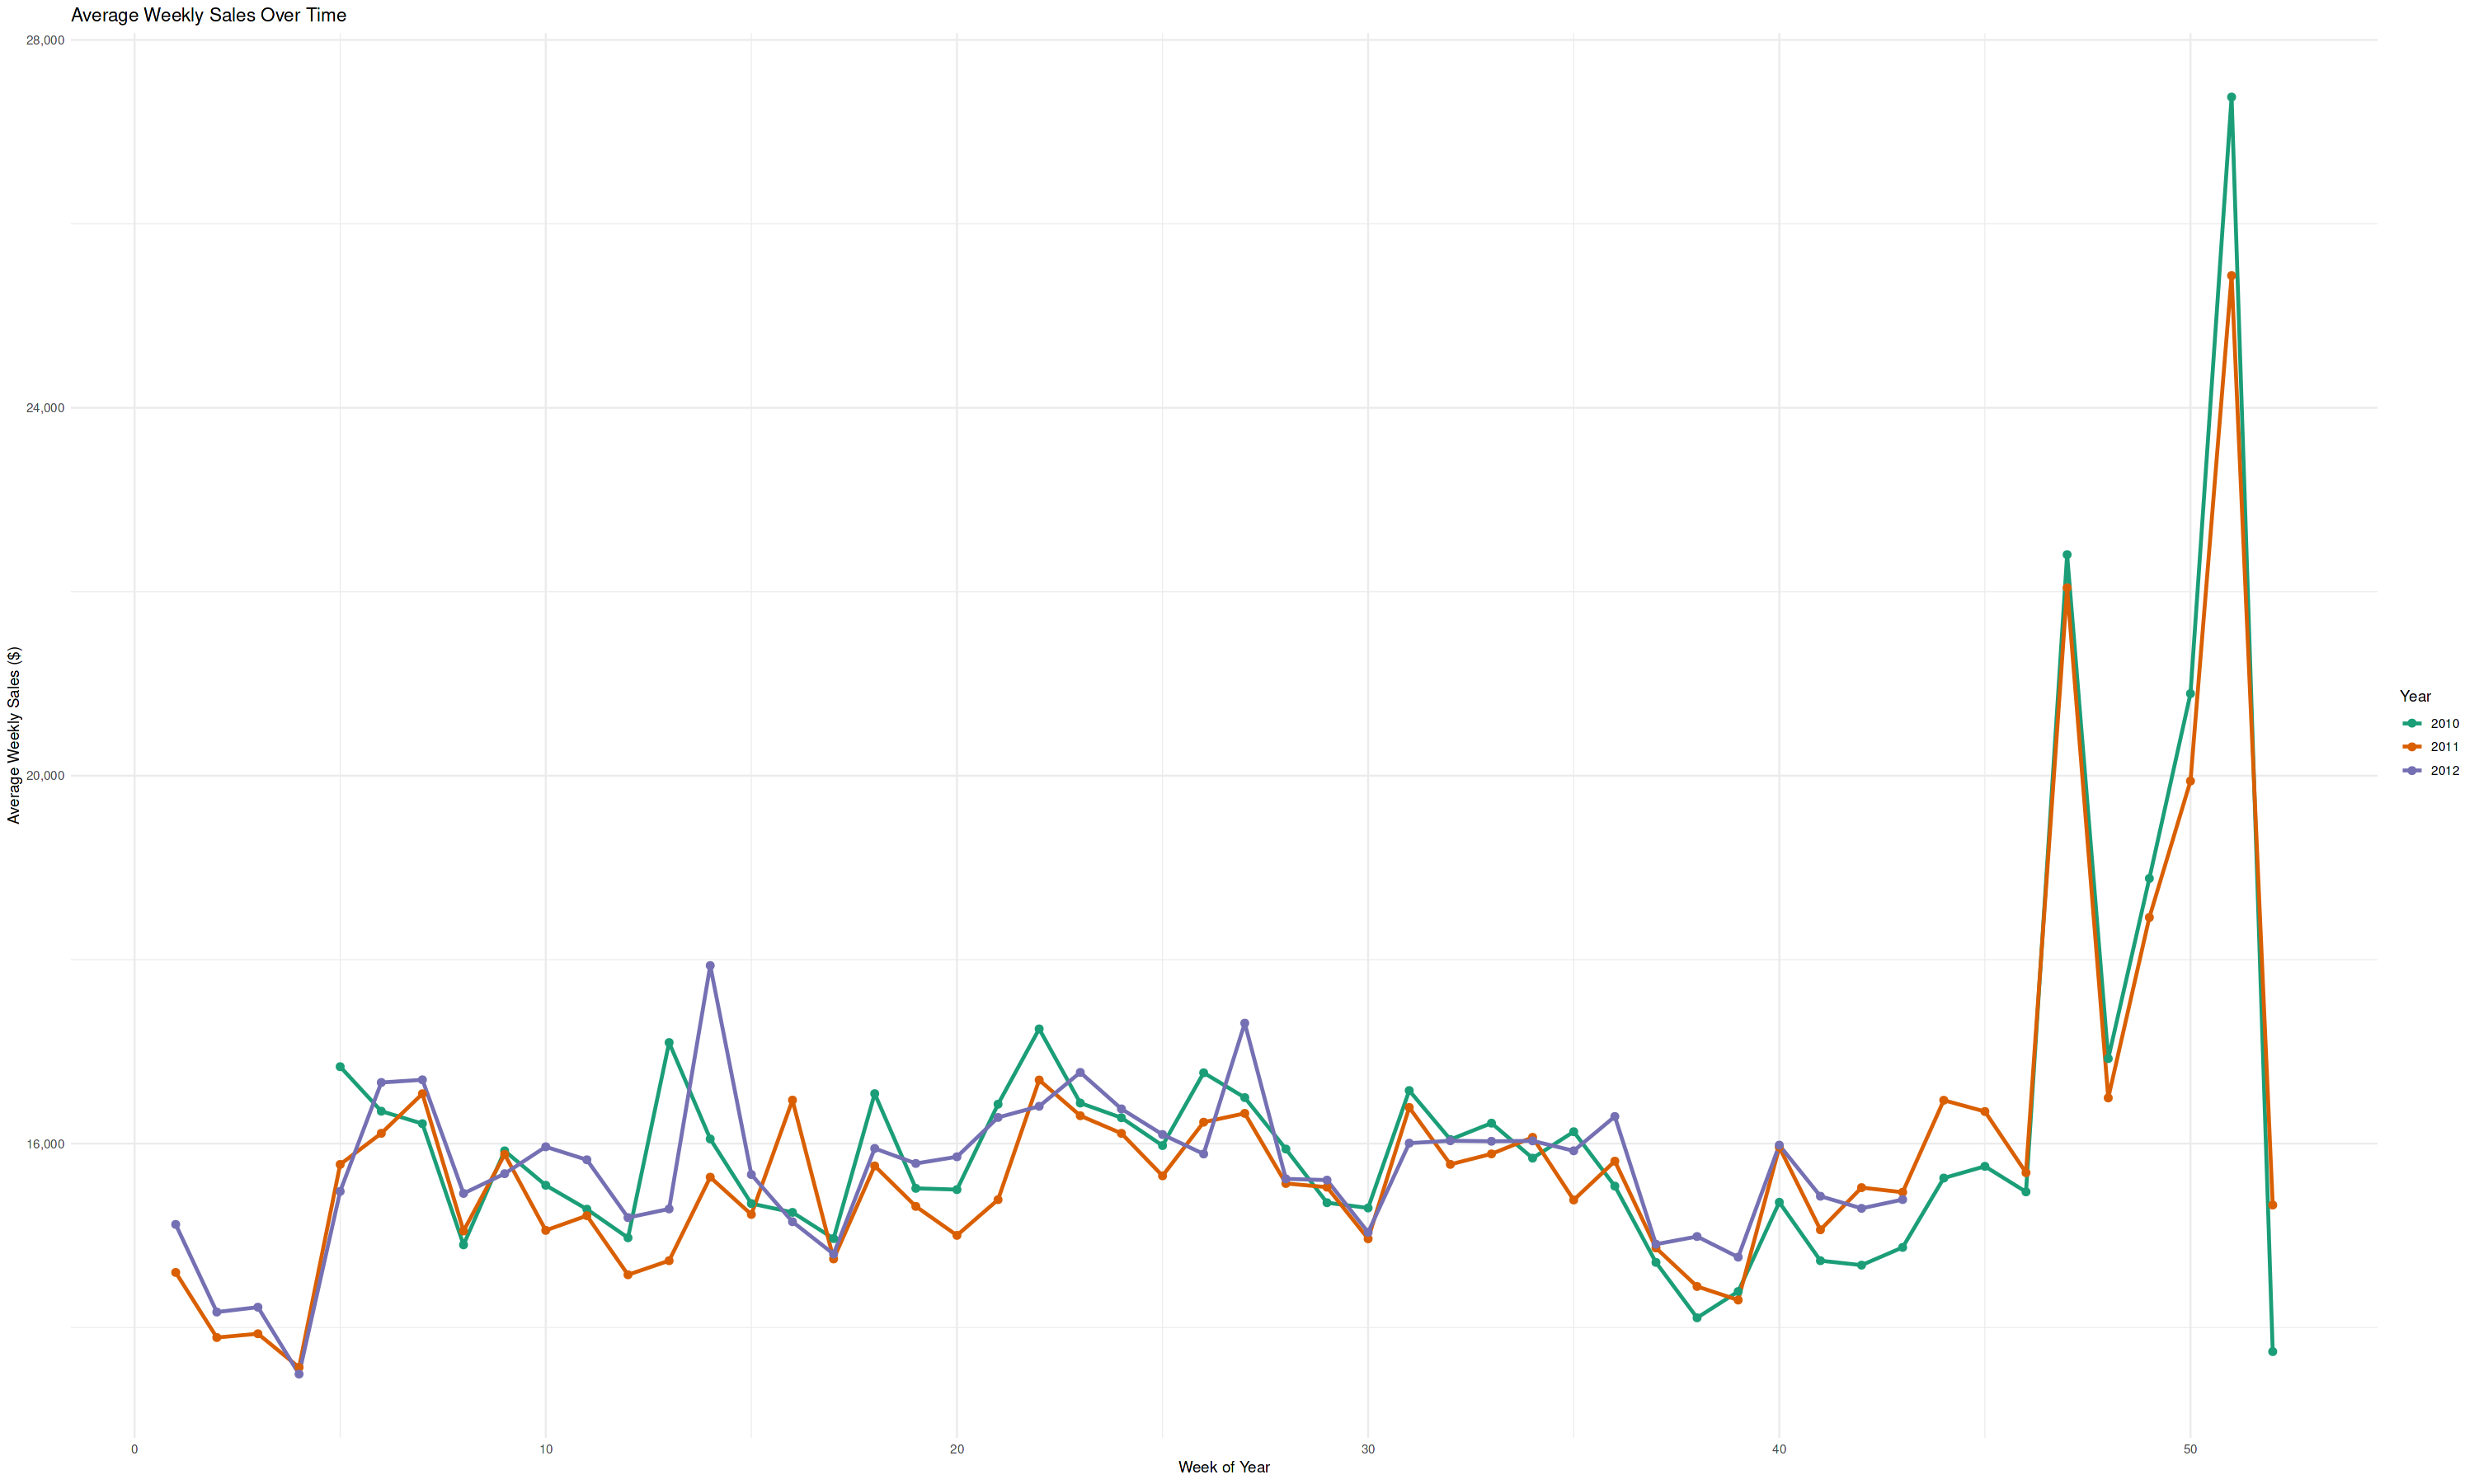

In [43]:

p14 <- df %>%
  group_by(Year, Week) %>%
  summarise(Avg_Weekly_Sales = mean(Weekly_Sales, na.rm = TRUE), .groups = "drop") %>%
  ggplot(aes(x = Week, y = Avg_Weekly_Sales, color = factor(Year), group = Year)) +  # <- convert Year to factor
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Average Weekly Sales Over Time",
    x = "Week of Year",
    y = "Average Weekly Sales ($)",
    color = "Year"   # Add label for legend
  ) +
  scale_y_continuous(labels = comma) +
  scale_color_brewer(palette = "Dark2") +
  theme_minimal()

p14

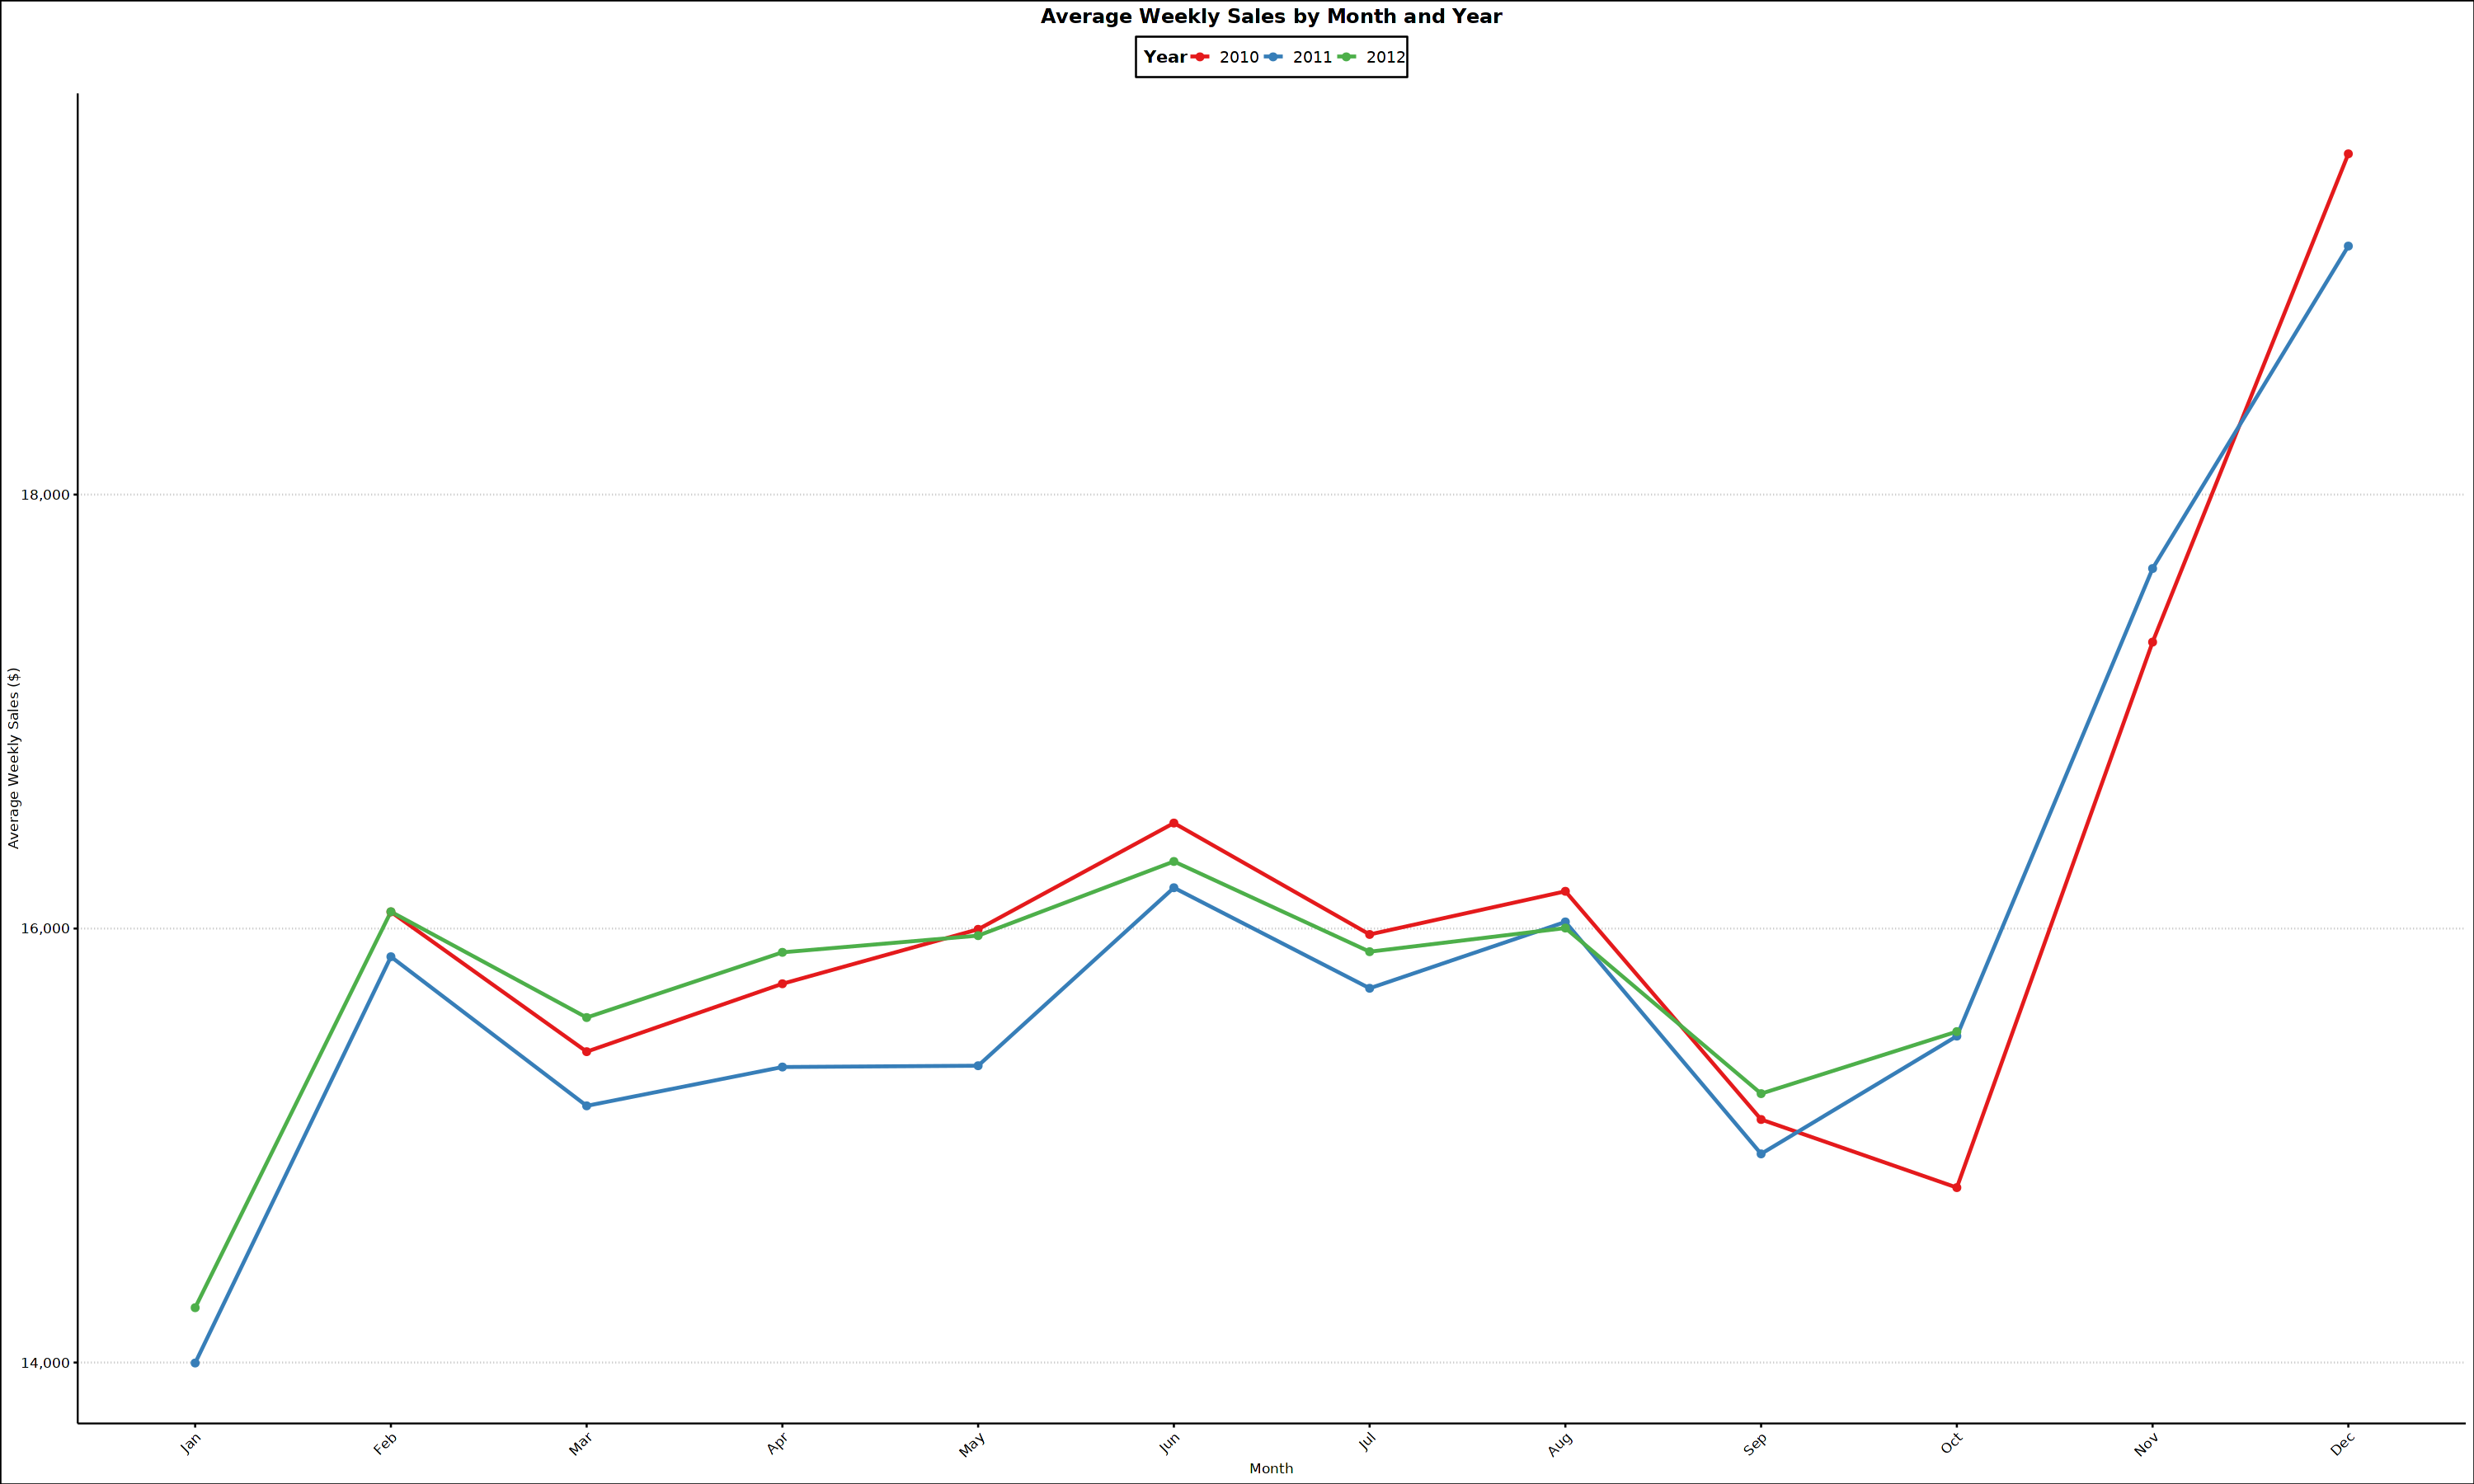

In [44]:

p16 <- df %>%
  group_by(Year, Month) %>%
  summarise(Avg_Weekly_Sales = mean(Weekly_Sales, na.rm = TRUE), .groups = "drop") %>%
  ggplot(aes(x = Month, y = Avg_Weekly_Sales, color = factor(Year), group = Year)) +  # <- convert Year to factor
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(
    title = "Average Weekly Sales by Month and Year",
    x = "Month",
    y = "Average Weekly Sales ($)",
    color = "Year"   # Legend title
  ) +
  scale_y_continuous(labels = comma) +
  scale_color_brewer(palette = "Set1") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

p16

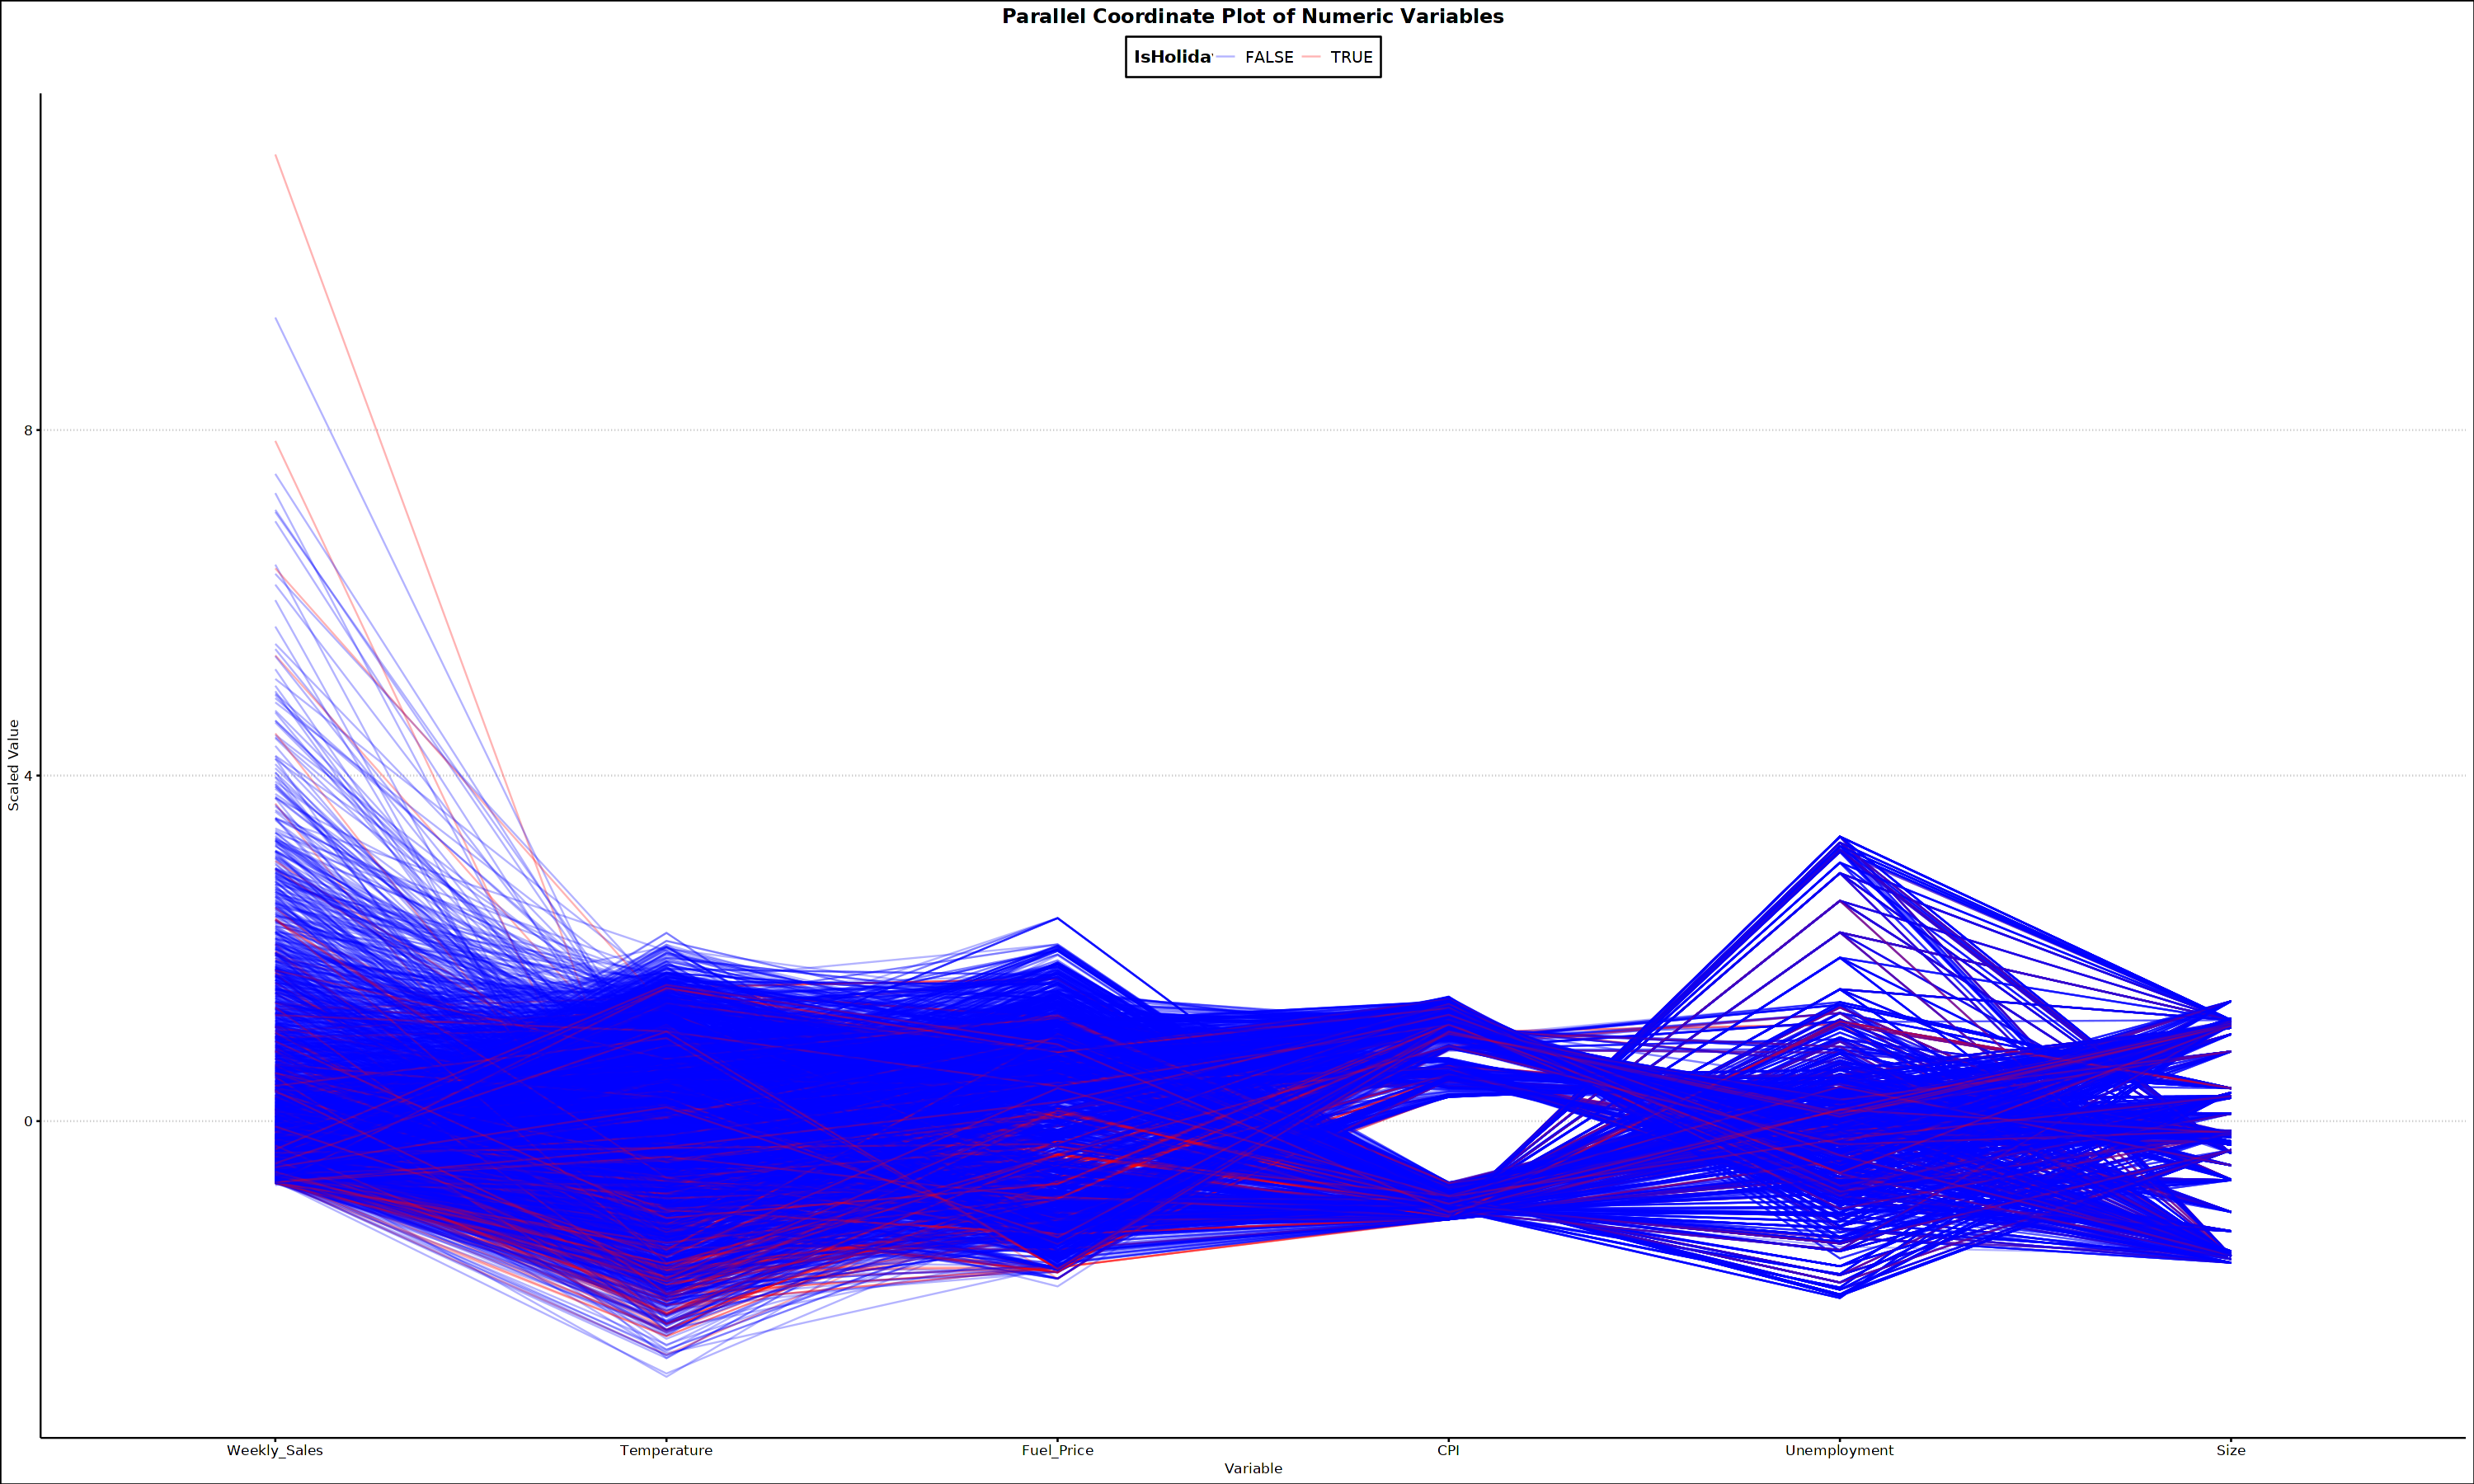

In [45]:
df_sample <- df %>% slice_sample(n = 5000)
p18 <- df_sample %>%
  select(Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment, Size, IsHoliday) %>%
  ggparcoord(
    columns = 1:6,
    groupColumn = "IsHoliday",
    scale = "std",
    alphaLines = 0.3
  ) +
  labs(
    title = "Parallel Coordinate Plot of Numeric Variables",
    x = "Variable",
    y = "Scaled Value"
  ) +
  scale_color_manual(values = c("FALSE" = "blue", "TRUE" = "red")) +
  theme(legend.title = element_text(face = "bold"))

p18

`geom_smooth()` using formula = 'y ~ x'


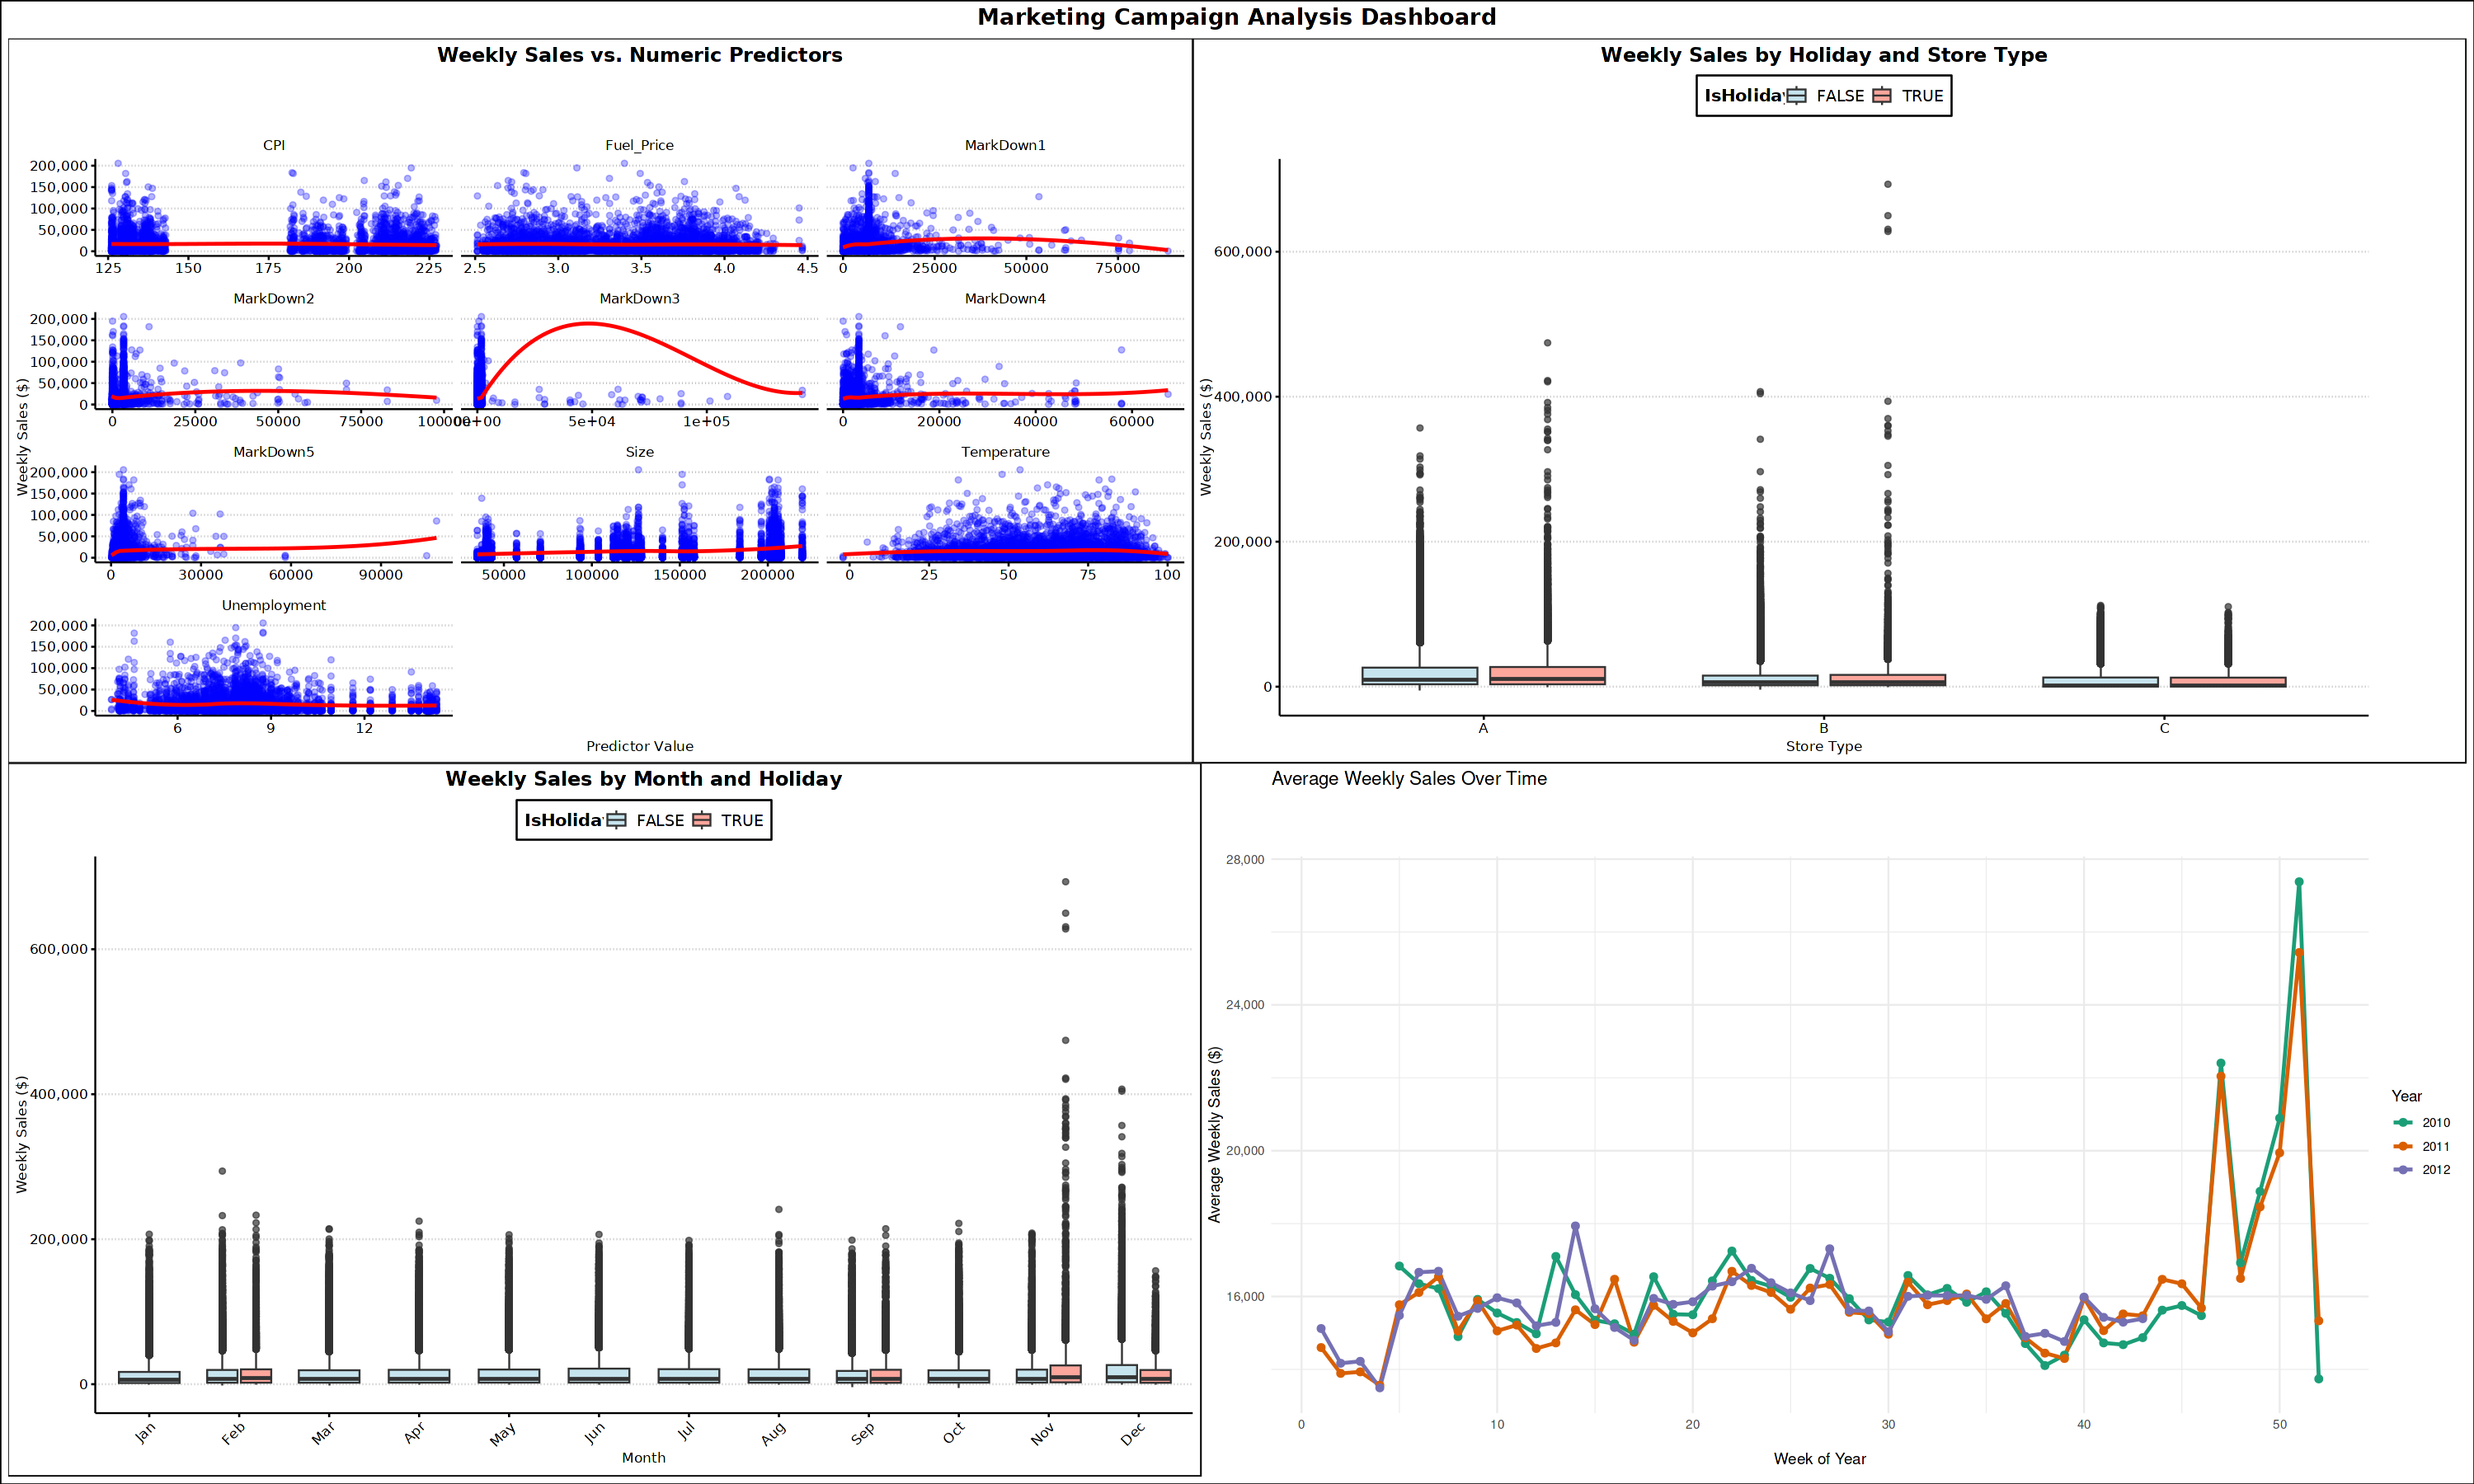

In [46]:
# Combine key plots
dashboard <- (p5 + p10) / (p11 + p14) +
  plot_annotation(
    title = "Marketing Campaign Analysis Dashboard",
    theme = theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 16))
  )

dashboard

In [47]:
cols=c("IsHoliday","Type","Month","DayOfWeek")

map_list<-list()
for(col in cols){
    df[[col]]<-as.factor(df[[col]])
    map_list[[col]]<-setNames(seq_along(levels(df[[col]])),levels(df[[col]]))
    df[[col]]<-as.numeric(df[[col]])
}
map_list

$IsHoliday
FALSE  TRUE 
    1     2 

$Type
A B C 
1 2 3 

$Month
Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec 
  1   2   3   4   5   6   7   8   9  10  11  12 

$DayOfWeek
Sun Mon Tue Wed Thu Fri Sat 
  1   2   3   4   5   6   7

In [48]:
numeric_cols <- sapply(df, is.numeric)
predictors_names <- names(df)[numeric_cols & names(df) != "Weekly_Sales"]

complete_rows <- !is.na(df$Weekly_Sales)
y <- df$Weekly_Sales[complete_rows]

cor_values <- numeric(length(predictors_names))
names(cor_values) <- predictors_names

for (i in seq_along(predictors_names)) {
  x <- df[[predictors_names[i]]]
  if (any(complete <- complete.cases(x, y))) {
    cor_values[i] <- abs(cor(x[complete], y[complete]))
  } else {
    cor_values[i] <- 0
  }
}

cor_values[is.na(cor_values)] <- 0
top_7_features <- names(sort(cor_values, decreasing = TRUE))[1:7]

df_top <- df[complete_rows, c(top_7_features, "Weekly_Sales"), drop = FALSE]

head(df_top)

Size   Type Dept Store MarkDown5 MarkDown1 MarkDown3 Weekly_Sales
1 151315 1    1    1     4132.216  7032.372  1760.1    24924.50    
2 151315 1    1    1     4132.216  7032.372  1760.1    46039.49    
3 151315 1    1    1     4132.216  7032.372  1760.1    41595.55    
4 151315 1    1    1     4132.216  7032.372  1760.1    19403.54    
5 151315 1    1    1     4132.216  7032.372  1760.1    21827.90    
6 151315 1    1    1     4132.216  7032.372  1760.1    21043.39

In [49]:
df_top<-df_top%>%mutate(Total_Markdown=MarkDown1+MarkDown3+MarkDown5)

In [50]:
df_top <- df_top[, !names(df_top) %in% c("MarkDown1", "MarkDown3", "MarkDown5")]

In [51]:
cols=c("Size","Total_Markdown")
df_top[cols] <- lapply(df_top[cols], function(x) {
  (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))
})


In [52]:
df_top <- df_top[, c(setdiff(names(df_top), "Weekly_Sales"), "Weekly_Sales")]

In [53]:
colSums(is.na(df_top))


Size           Type           Dept          Store Total_Markdown 
             0              0              0              0              0 
  Weekly_Sales 
             0

In [54]:
head(df_top)

Size      Type Dept Store Total_Markdown Weekly_Sales
1 0.6302673 1    1    1     0.08908411     24924.50    
2 0.6302673 1    1    1     0.08908411     46039.49    
3 0.6302673 1    1    1     0.08908411     41595.55    
4 0.6302673 1    1    1     0.08908411     19403.54    
5 0.6302673 1    1    1     0.08908411     21827.90    
6 0.6302673 1    1    1     0.08908411     21043.39

In [55]:
library(caret)
train_index <- createDataPartition(df_top$Weekly_Sales, p = 0.7, list = FALSE)
train_data <- df_top[train_index, ]
test_data  <- df_top[-train_index, ]

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




In [56]:
X_train <- train_data[, !names(train_data) %in% "Weekly_Sales"]
y_train <- train_data$Weekly_Sales

X_test <- test_data[, !names(test_data) %in% "Weekly_Sales"]
y_test <- test_data$Weekly_Sales

In [57]:
library(xgboost)
library(ggplot2)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [58]:
X_train_matrix <- as.matrix(X_train)
X_test_matrix <- as.matrix(X_test)

# Target vectors
y_train_vector <- y_train
y_test_vector <- y_test

dtrain <- xgb.DMatrix(data = X_train_matrix, label = y_train_vector)
dtest  <- xgb.DMatrix(data = X_test_matrix, label = y_test_vector)


In [59]:
params<-list(booster="gbtree",objective="reg:squarederror",eta=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8)
xg_model<-xgb.train(params=params,data=dtrain,nrounds=100,watchlist = list(train = dtrain, test = dtest),print_every_n = 10,
                    early_stopping_rounds = 10)

[1]	train-rmse:25585.085095	test-rmse:25558.388251 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 10 rounds.

[11]	train-rmse:14781.370946	test-rmse:14866.029784 
[21]	train-rmse:11939.864322	test-rmse:12110.542467 
[31]	train-rmse:10692.430482	test-rmse:10913.084187 
[41]	train-rmse:9795.980589	test-rmse:10072.747293 
[51]	train-rmse:9440.356349	test-rmse:9728.522097 
[61]	train-rmse:9207.892697	test-rmse:9511.314092 
[71]	train-rmse:9005.510338	test-rmse:9321.276329 
[81]	train-rmse:8805.924726	test-rmse:9135.018816 
[91]	train-rmse:8572.319803	test-rmse:8917.518049 
[100]	train-rmse:8447.508317	test-rmse:8801.759271 


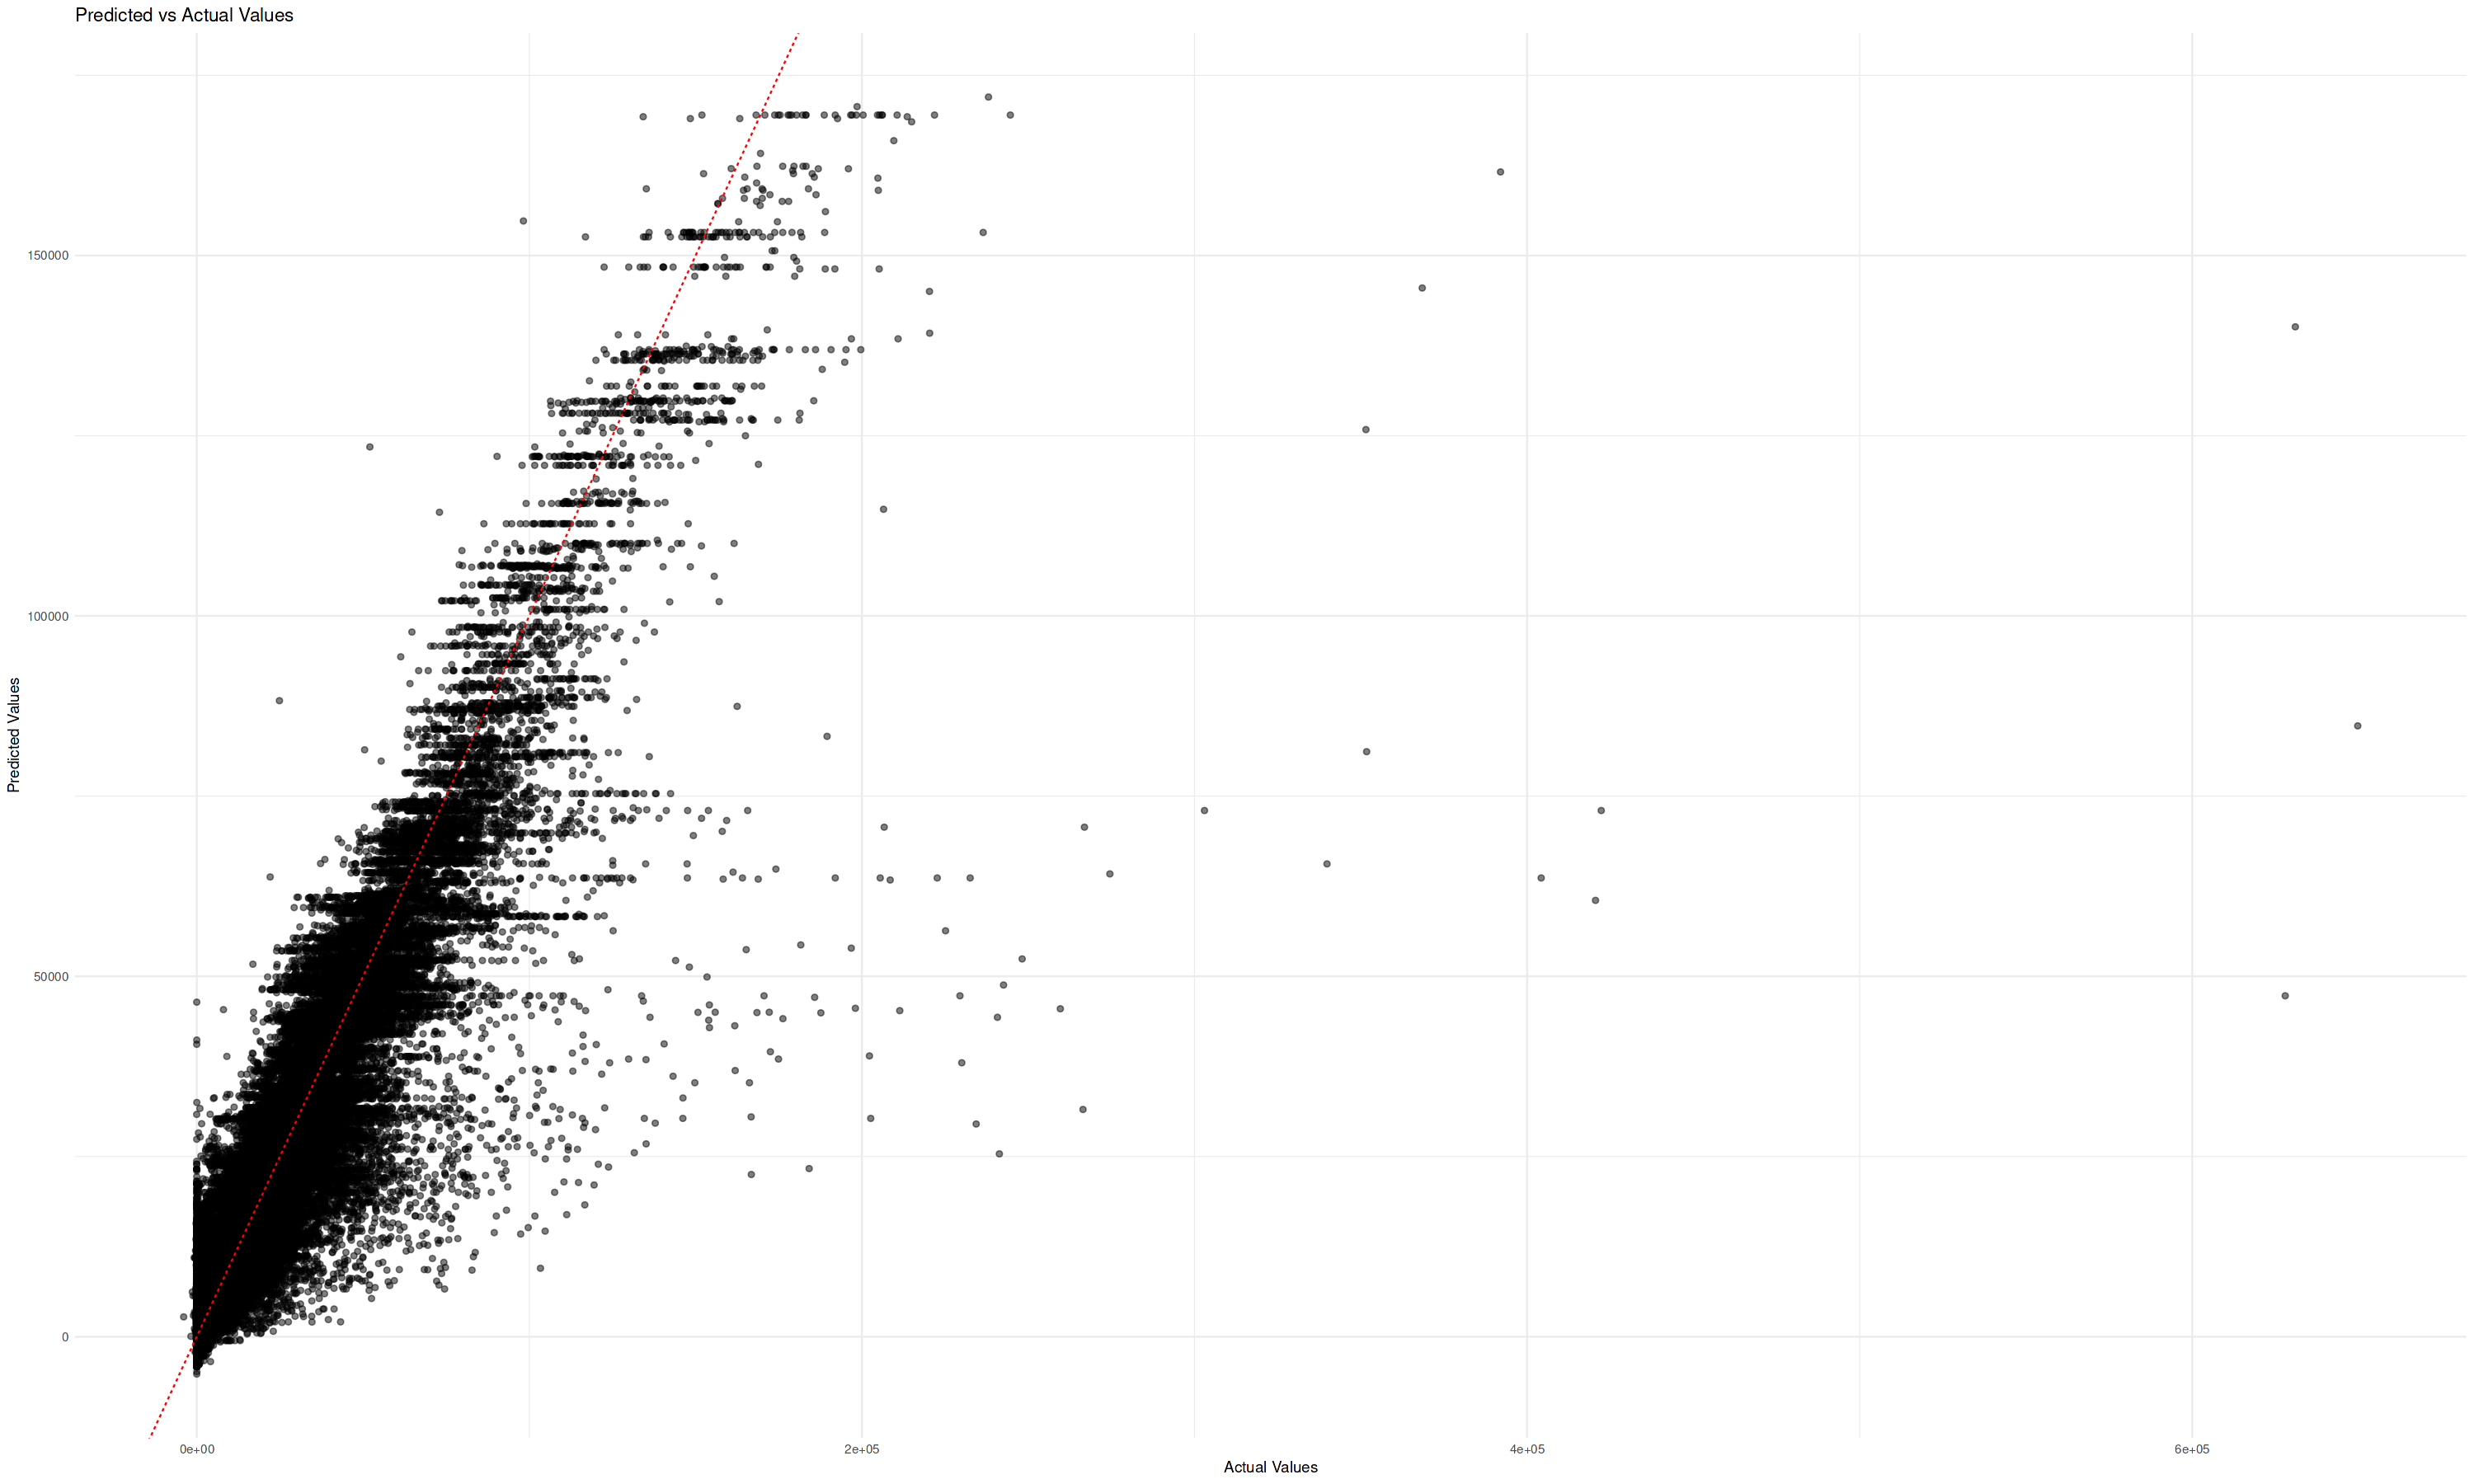

In [60]:
y_pred <- predict(xg_model, X_test_matrix)
results_df <- data.frame(Actual = y_test_vector, Predicted = y_pred)
ggplot(results_df, aes(x = Actual, y = Predicted)) +
  geom_point(alpha = 0.5) +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Predicted vs Actual Values", x = "Actual Values", y = "Predicted Values") +
  theme_minimal()

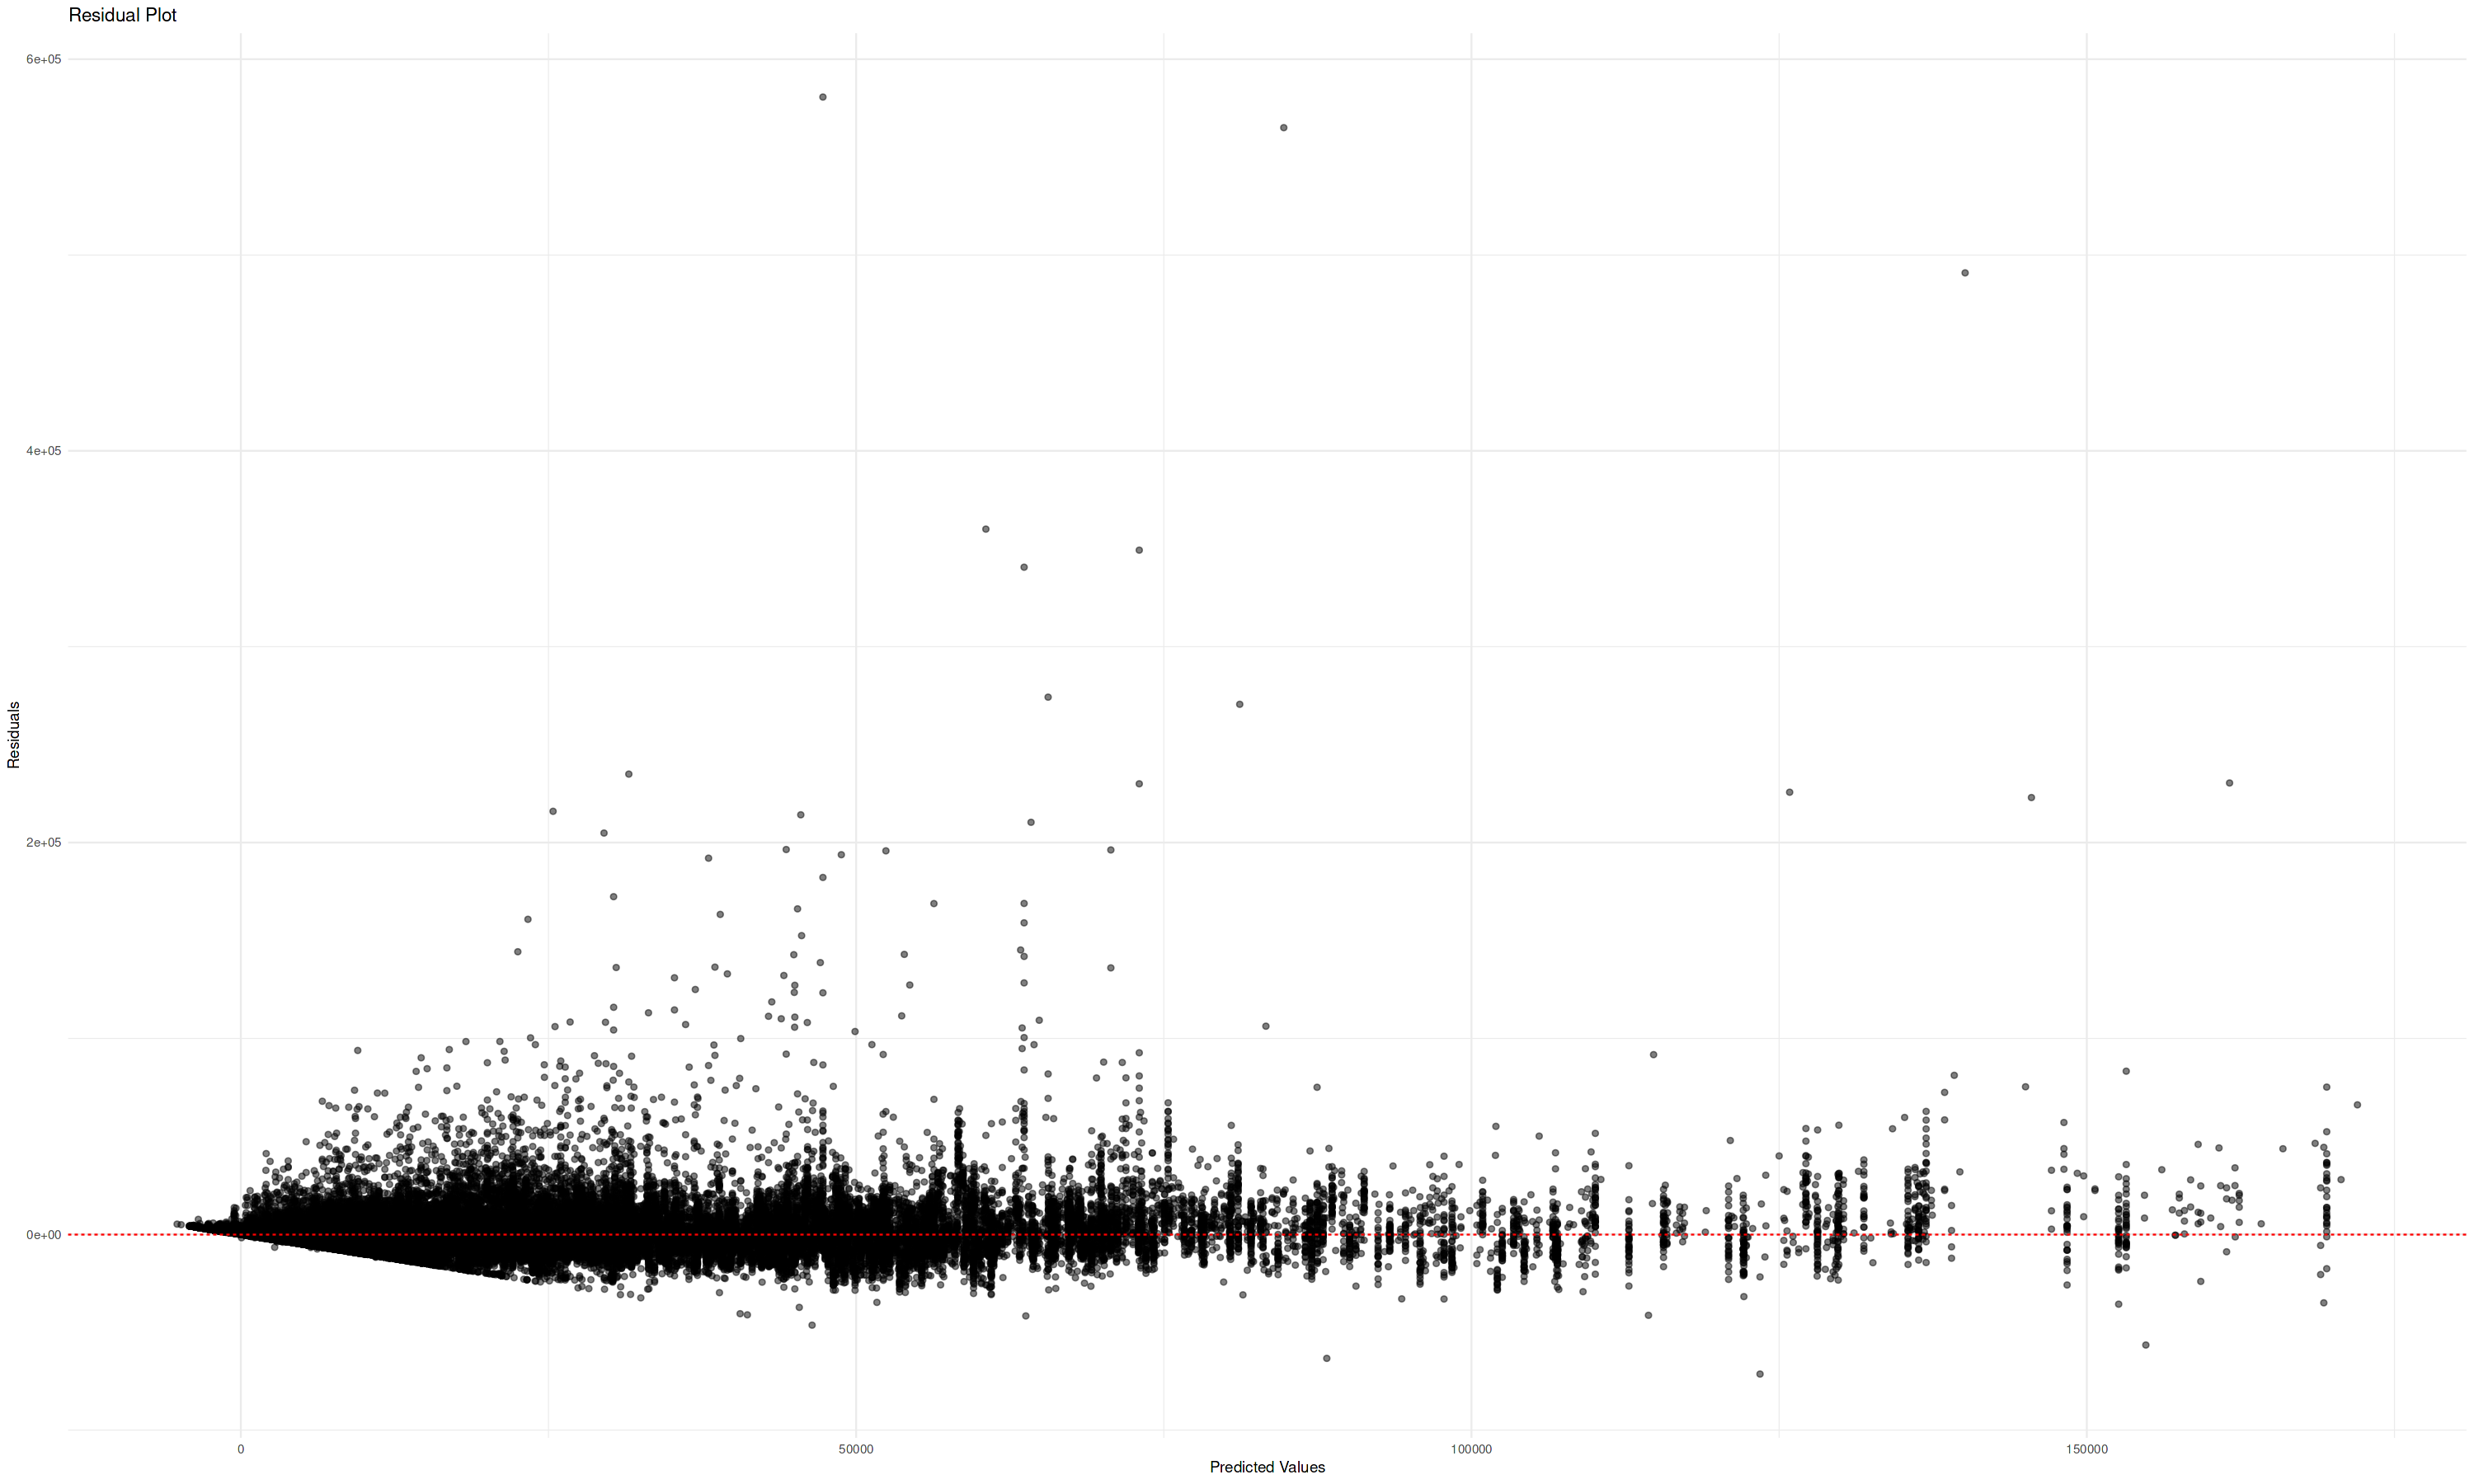

In [61]:
# Calculate residuals
residuals <- y_test_vector - y_pred

# Create data frame
residual_df <- data.frame(Predicted = y_pred, Residuals = residuals)

# Residual plot
ggplot(residual_df, aes(x = Predicted, y = Residuals)) +
  geom_point(alpha = 0.5) +
  geom_hline(yintercept = 0, color = "red", linetype = "dashed") +
  labs(title = "Residual Plot", x = "Predicted Values", y = "Residuals") +
  theme_minimal()

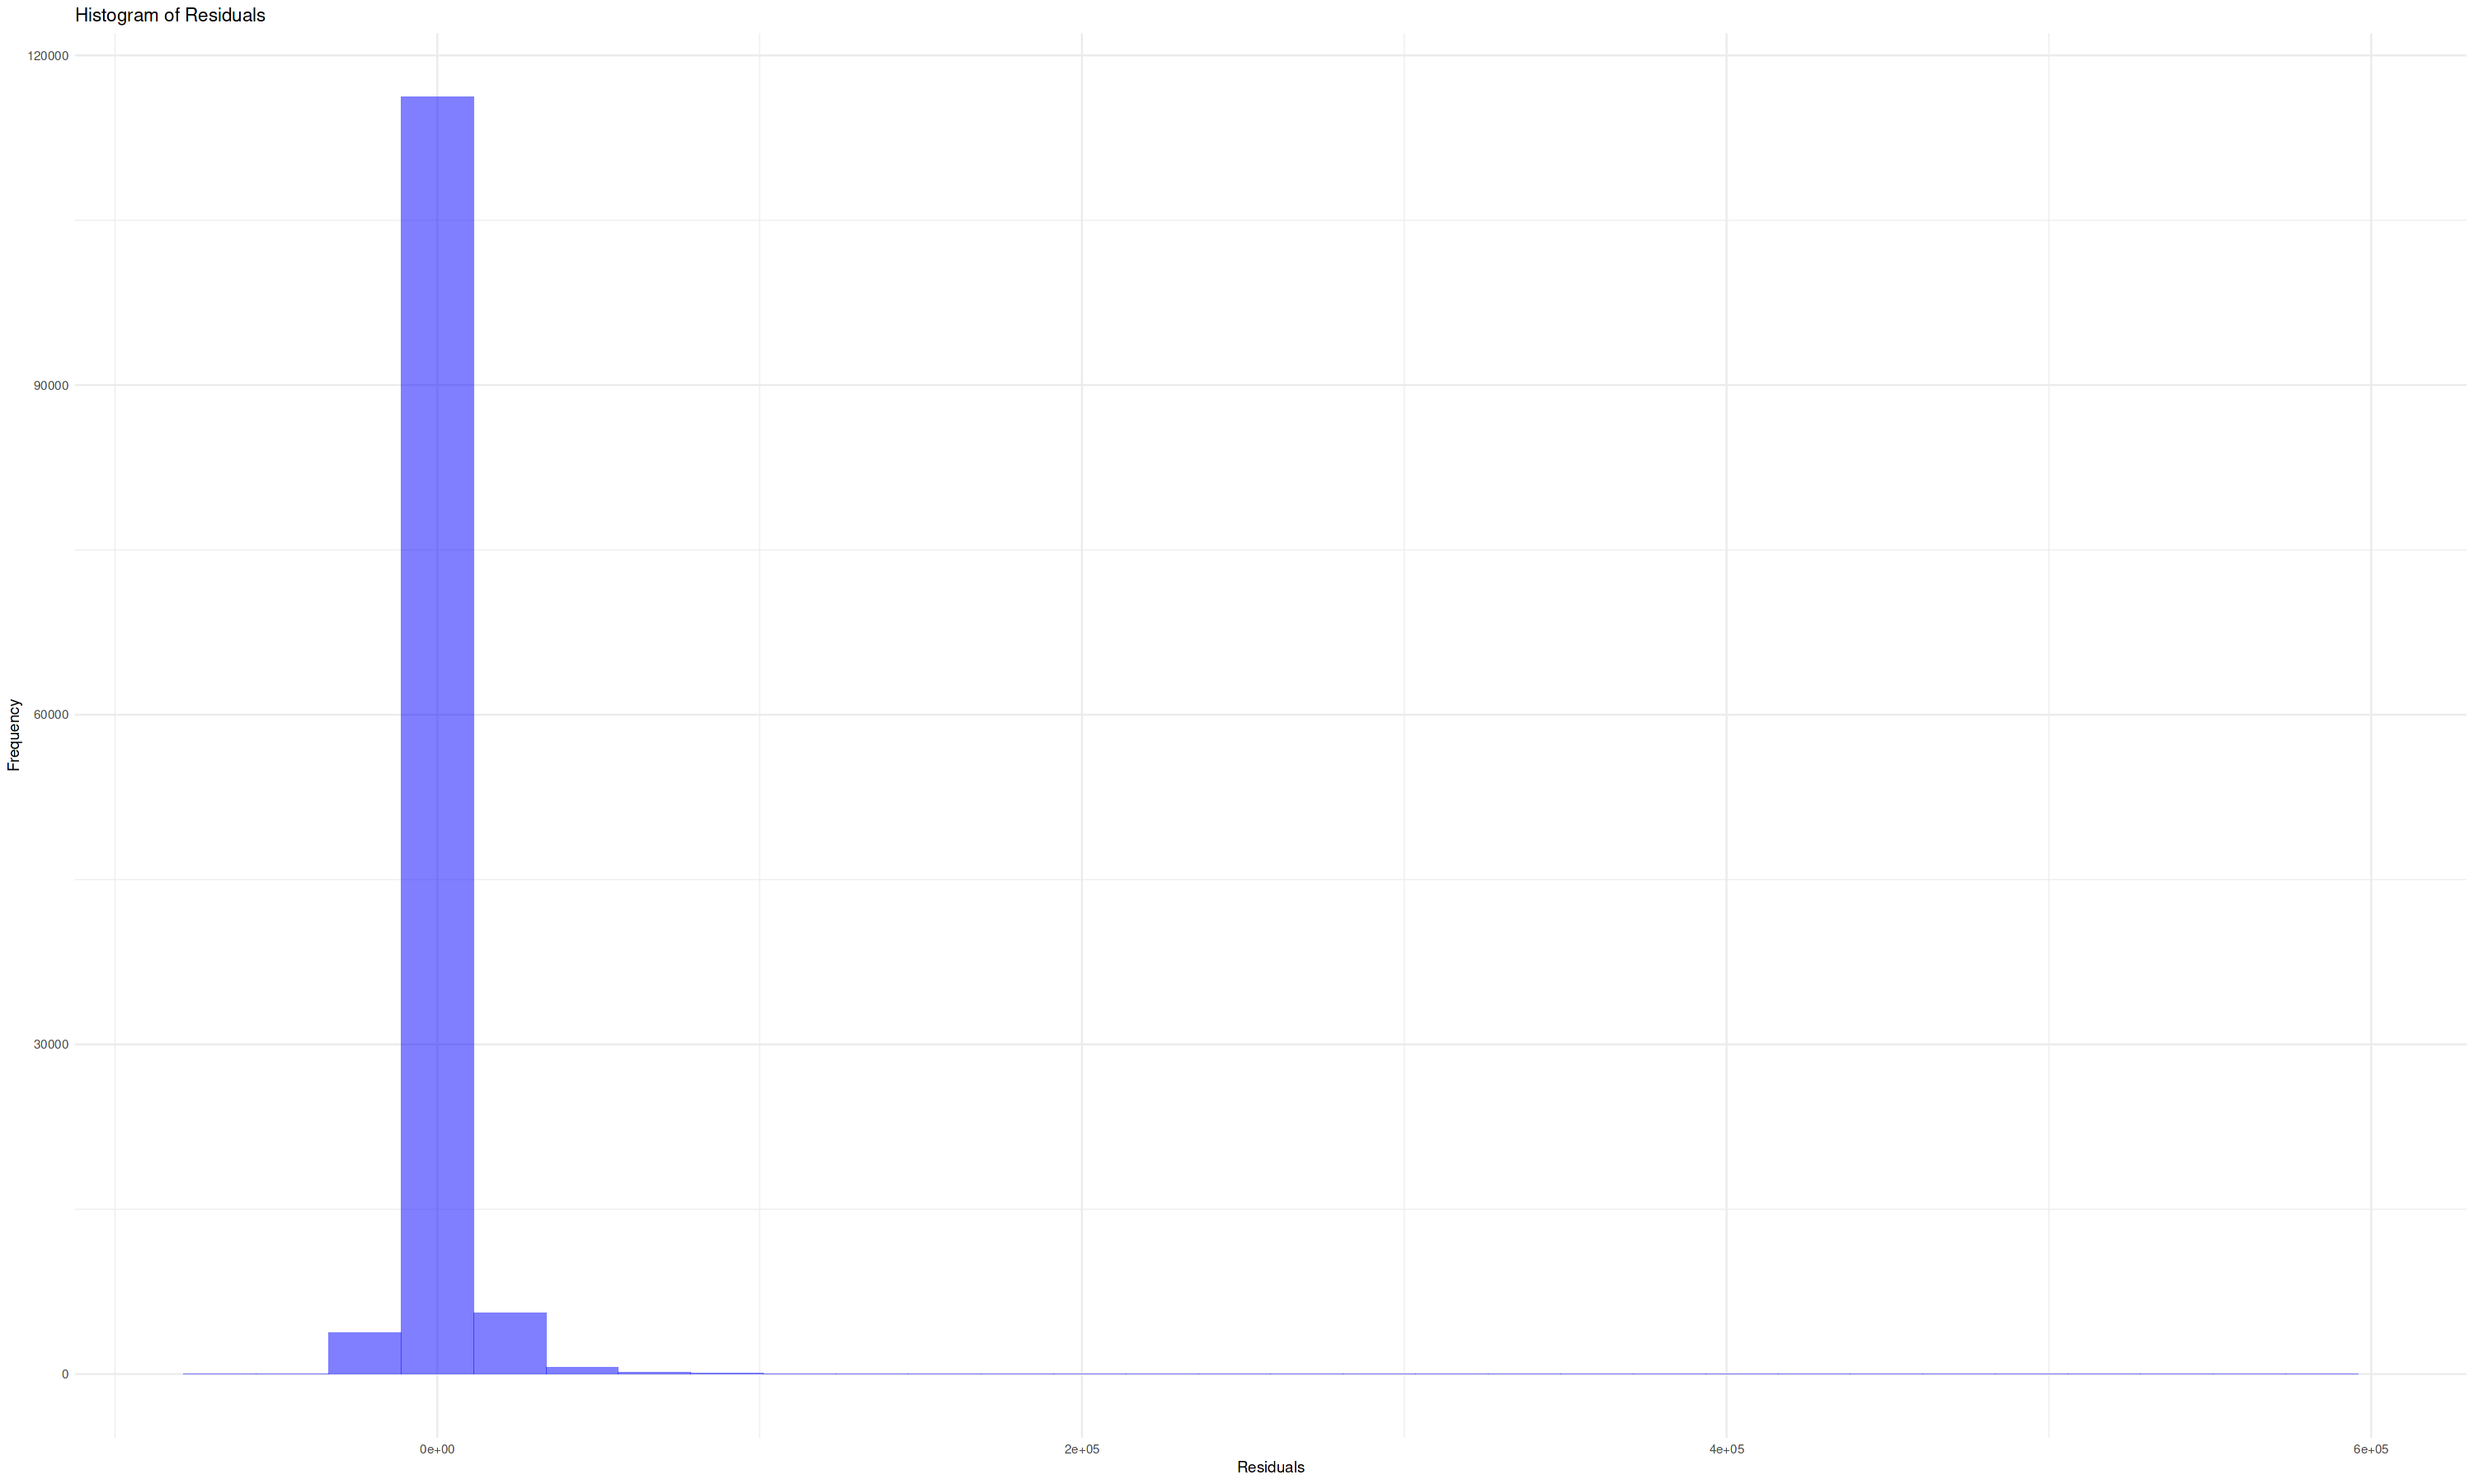

In [62]:
ggplot(data.frame(Residuals = residuals), aes(x = Residuals)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.5) +
  labs(title = "Histogram of Residuals", x = "Residuals", y = "Frequency") +
  theme_minimal()

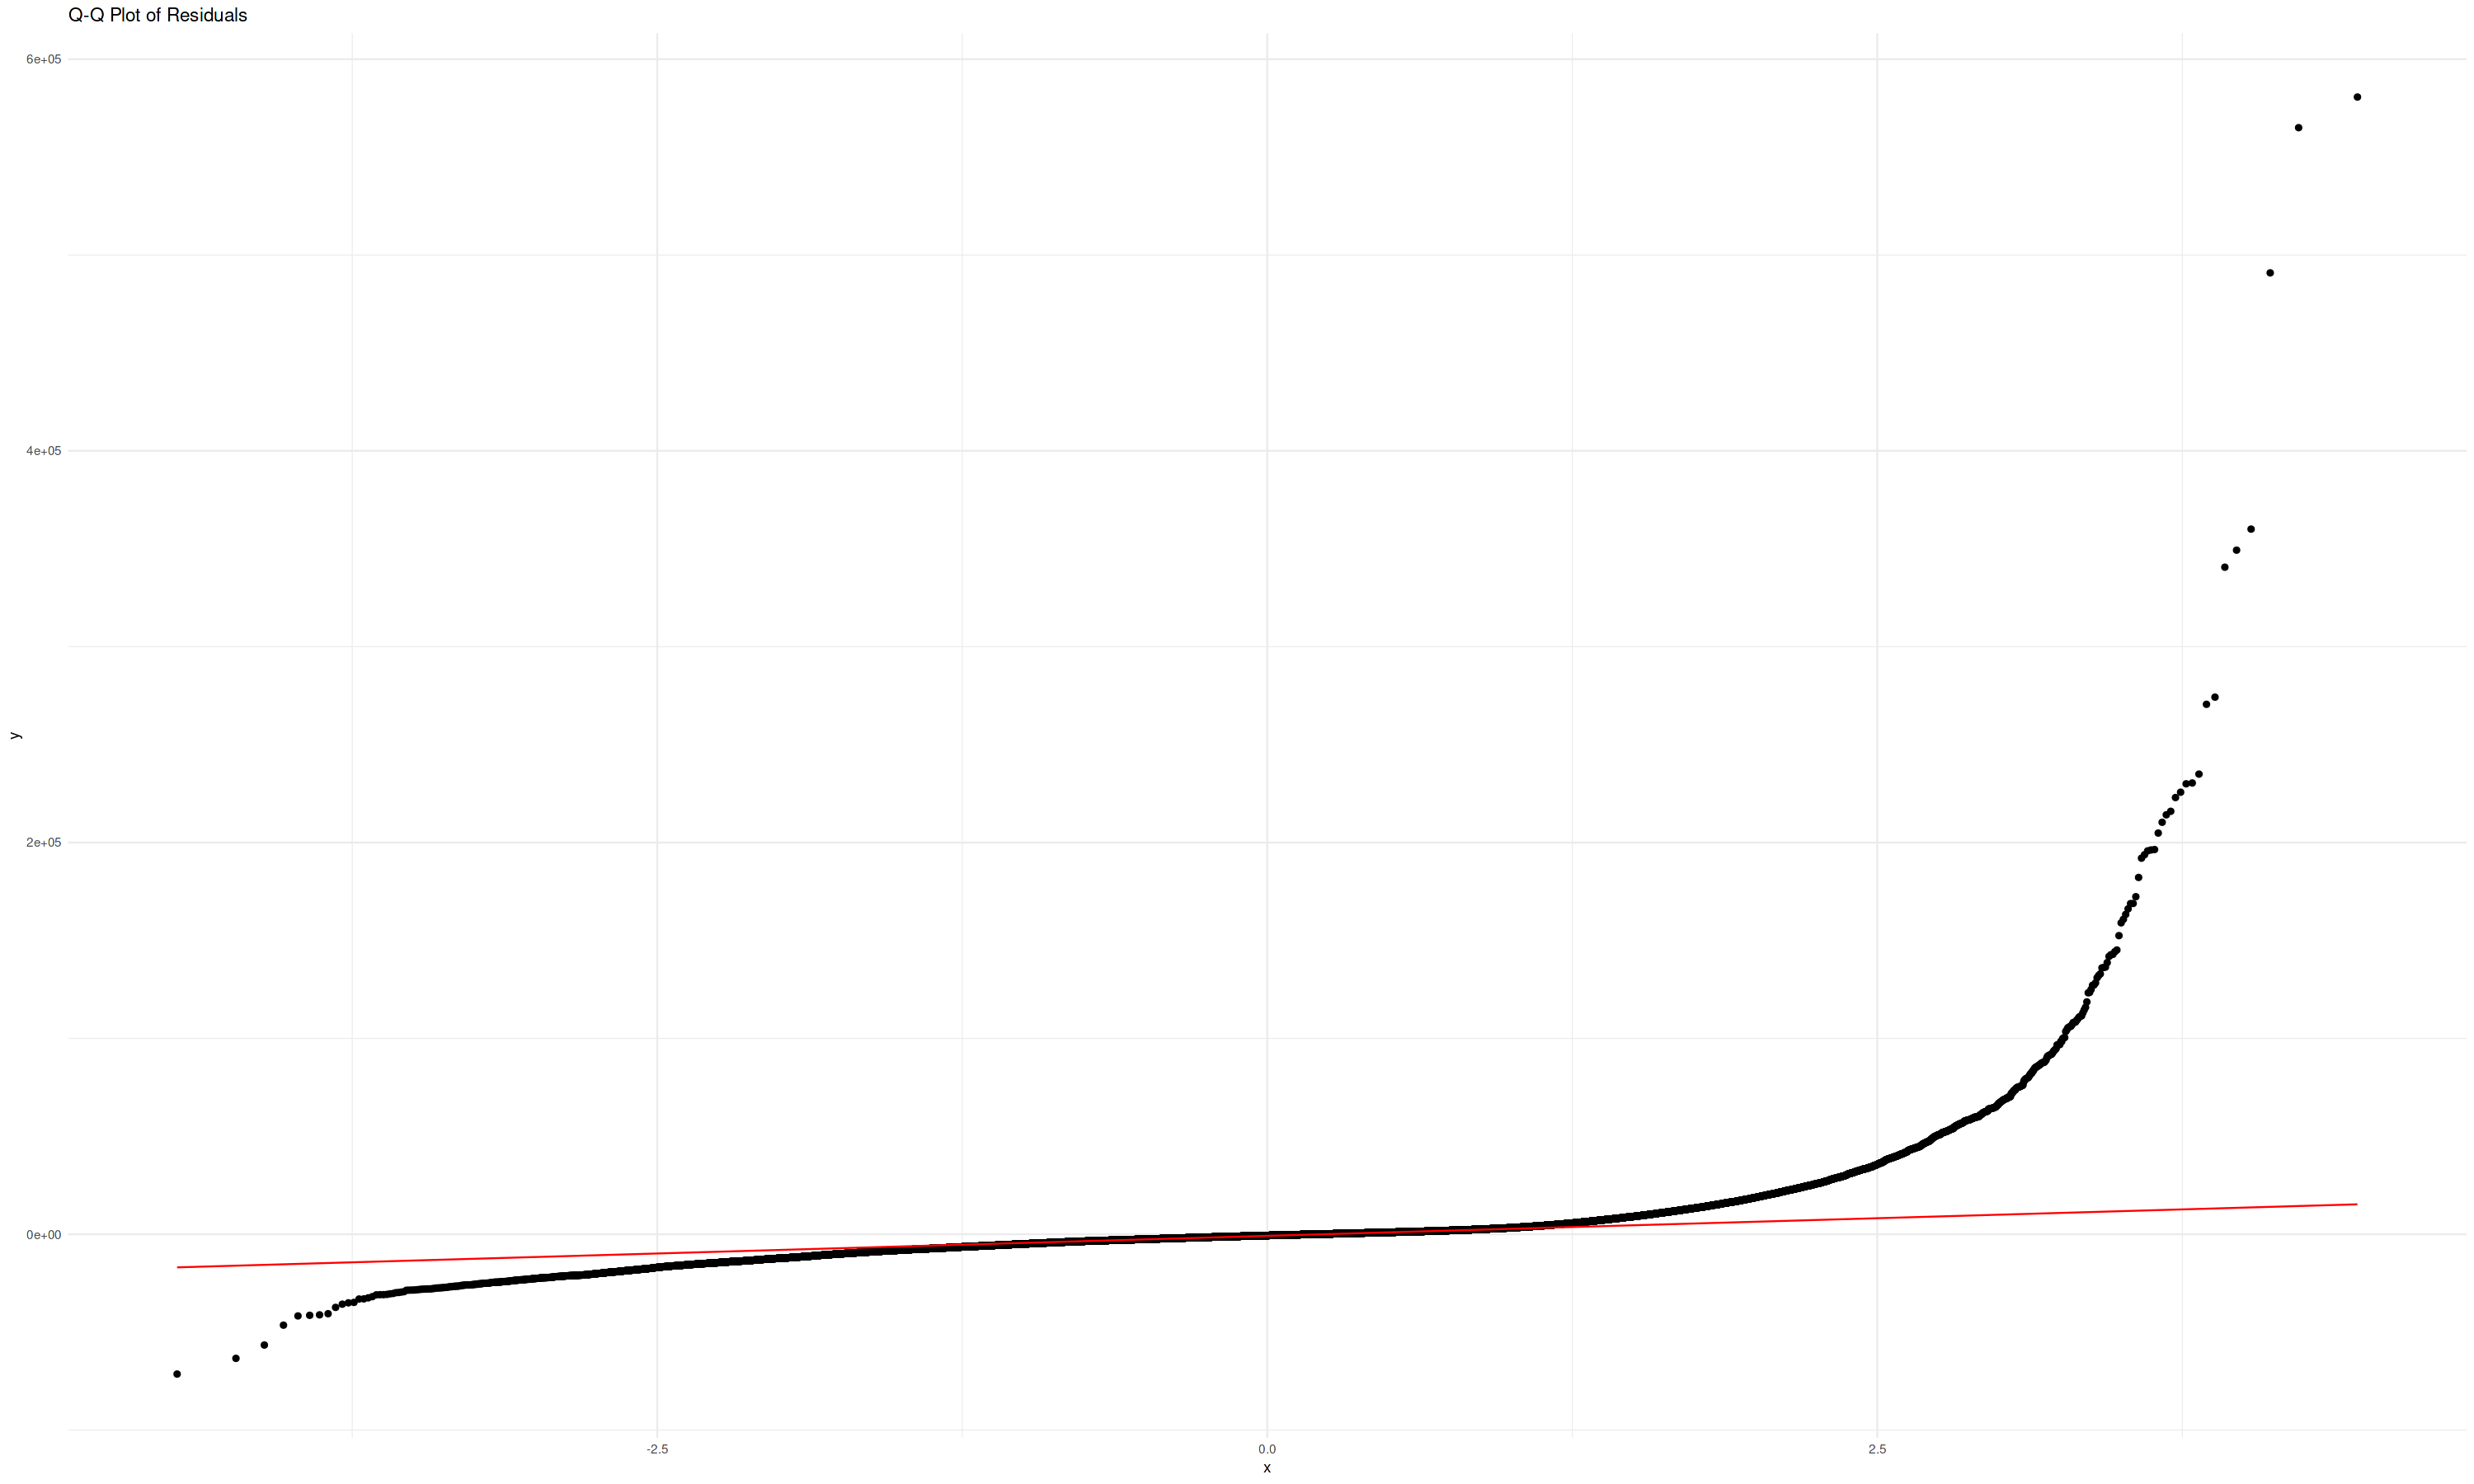

In [63]:
ggplot(data.frame(Residuals = residuals), aes(sample = Residuals)) +
  stat_qq() +
  stat_qq_line(color = "red") +
  labs(title = "Q-Q Plot of Residuals") +
  theme_minimal()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


No id variables; using all as measure variables



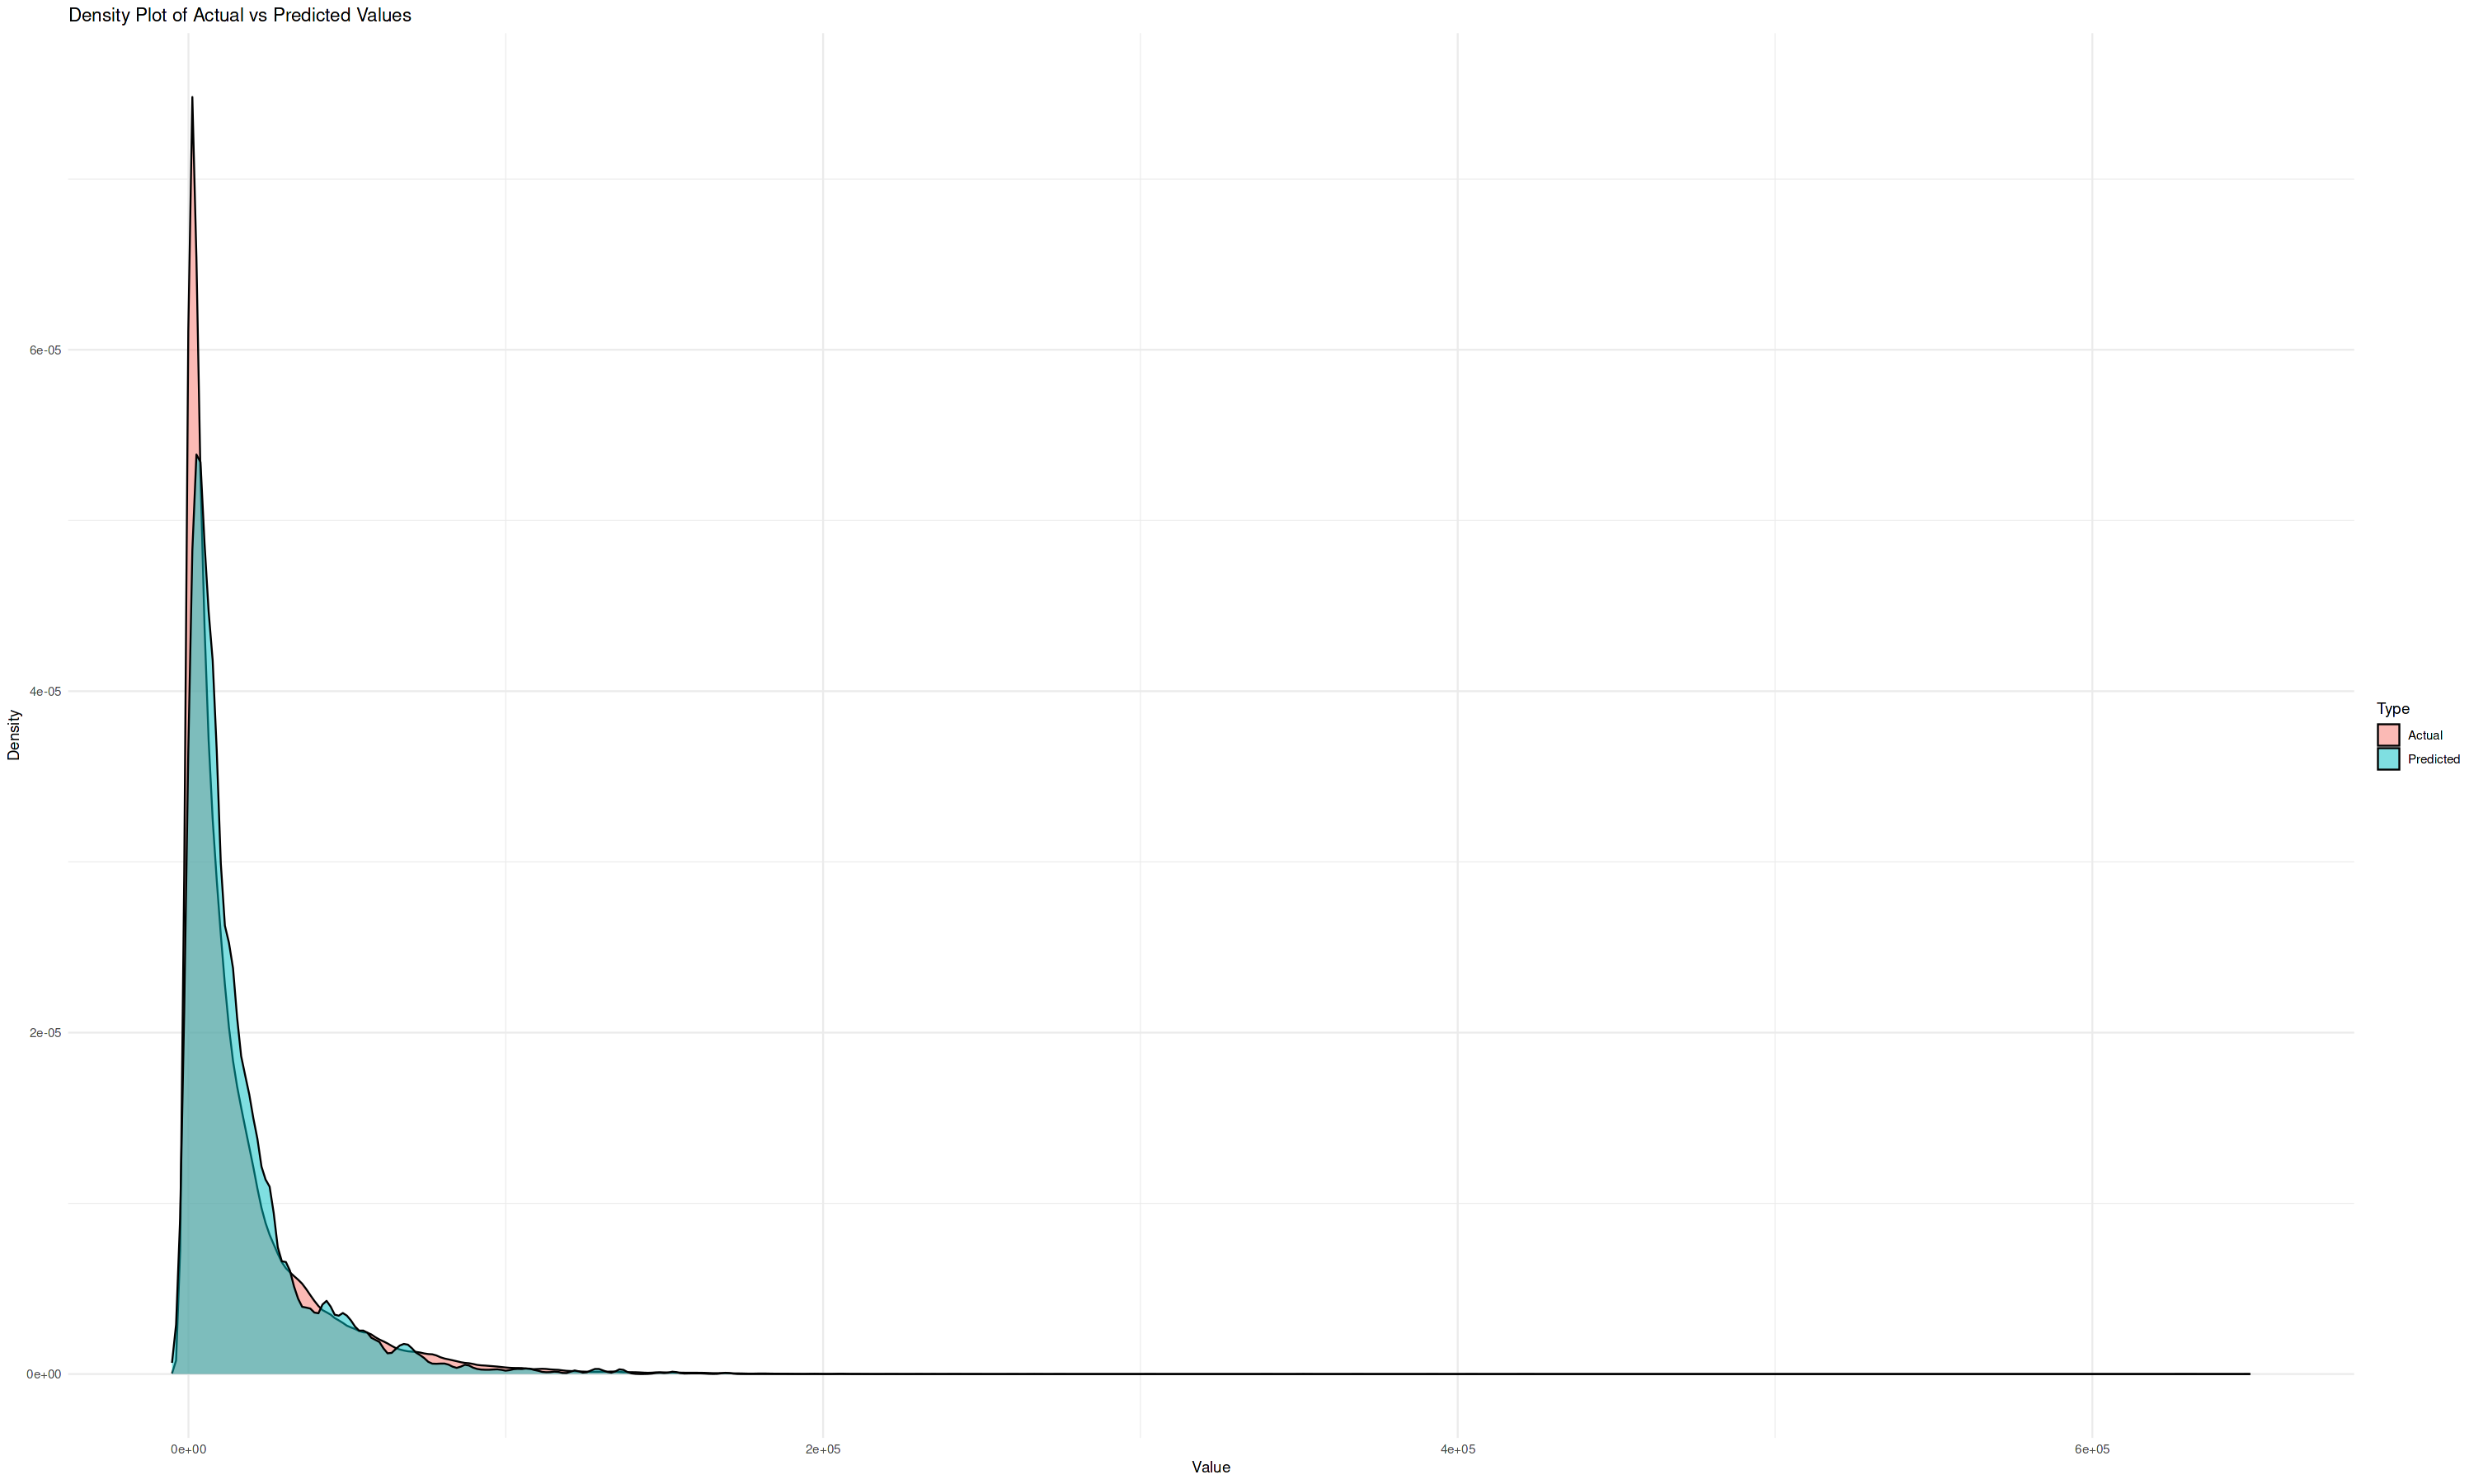

In [64]:
library(reshape2)

# Combine actual and predicted for density plot
density_df <- melt(data.frame(Actual = y_test_vector, Predicted = y_pred), 
                   variable.name = "Type", value.name = "Value")

# Density plot
ggplot(density_df, aes(x = Value, fill = Type)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Actual vs Predicted Values", x = "Value", y = "Density") +
  theme_minimal()

In [65]:
# Calculate additional metrics
rmse <- sqrt(mean((y_test_vector - y_pred)^2))
mae <- mean(abs(y_test_vector - y_pred))
r2 <- cor(y_test_vector, y_pred)^2
mape <- mean(abs((y_test_vector - y_pred) / y_test_vector)) * 100

cat("Test RMSE:", rmse, "\n")
cat("Test MAE:", mae, "\n")
cat("Test R-squared:", r2, "\n")
cat("Test MAPE:", mape, "%\n")



Test RMSE: 8801.759 
Test MAE: 4450.238 
Test R-squared: 0.8526927 
Test MAPE: Inf %



Attaching package: ‘pdp’


The following object is masked from ‘package:purrr’:

    partial




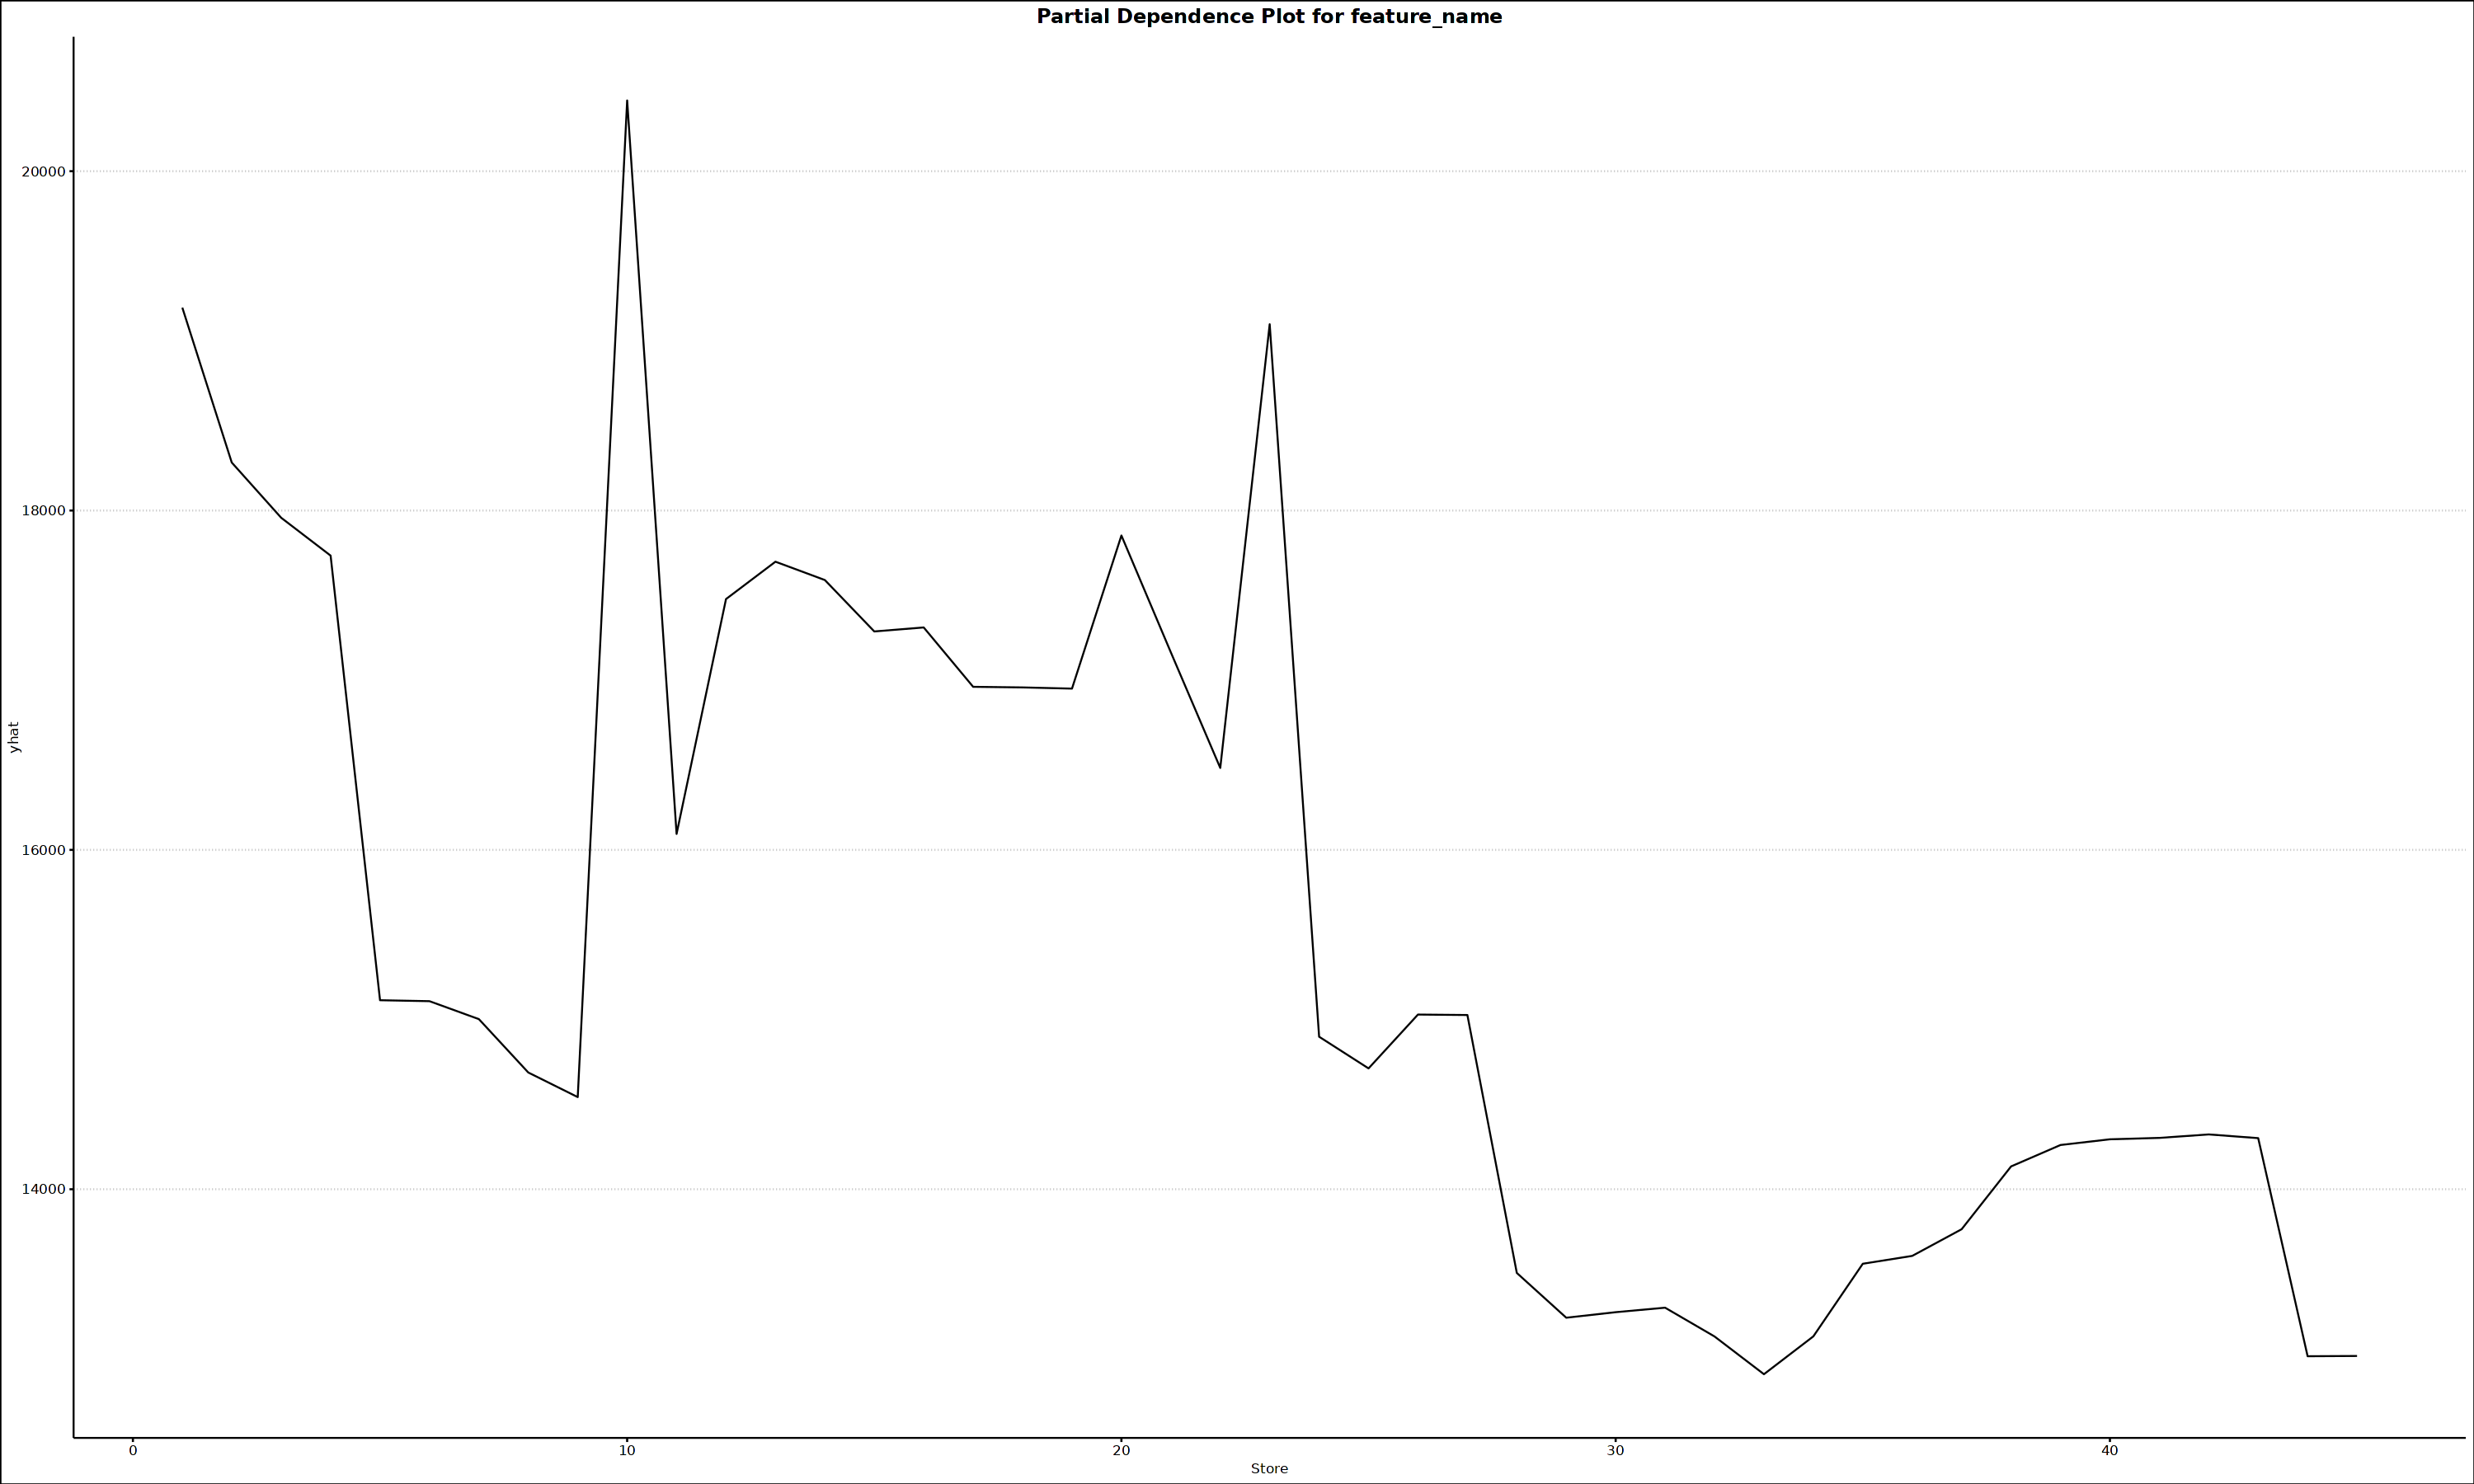

In [66]:
library(pdp)
pdp_feature <- partial(xg_model, pred.var = "Store", train = as.matrix(X_test_matrix))
autoplot(pdp_feature, main = "Partial Dependence Plot for feature_name")

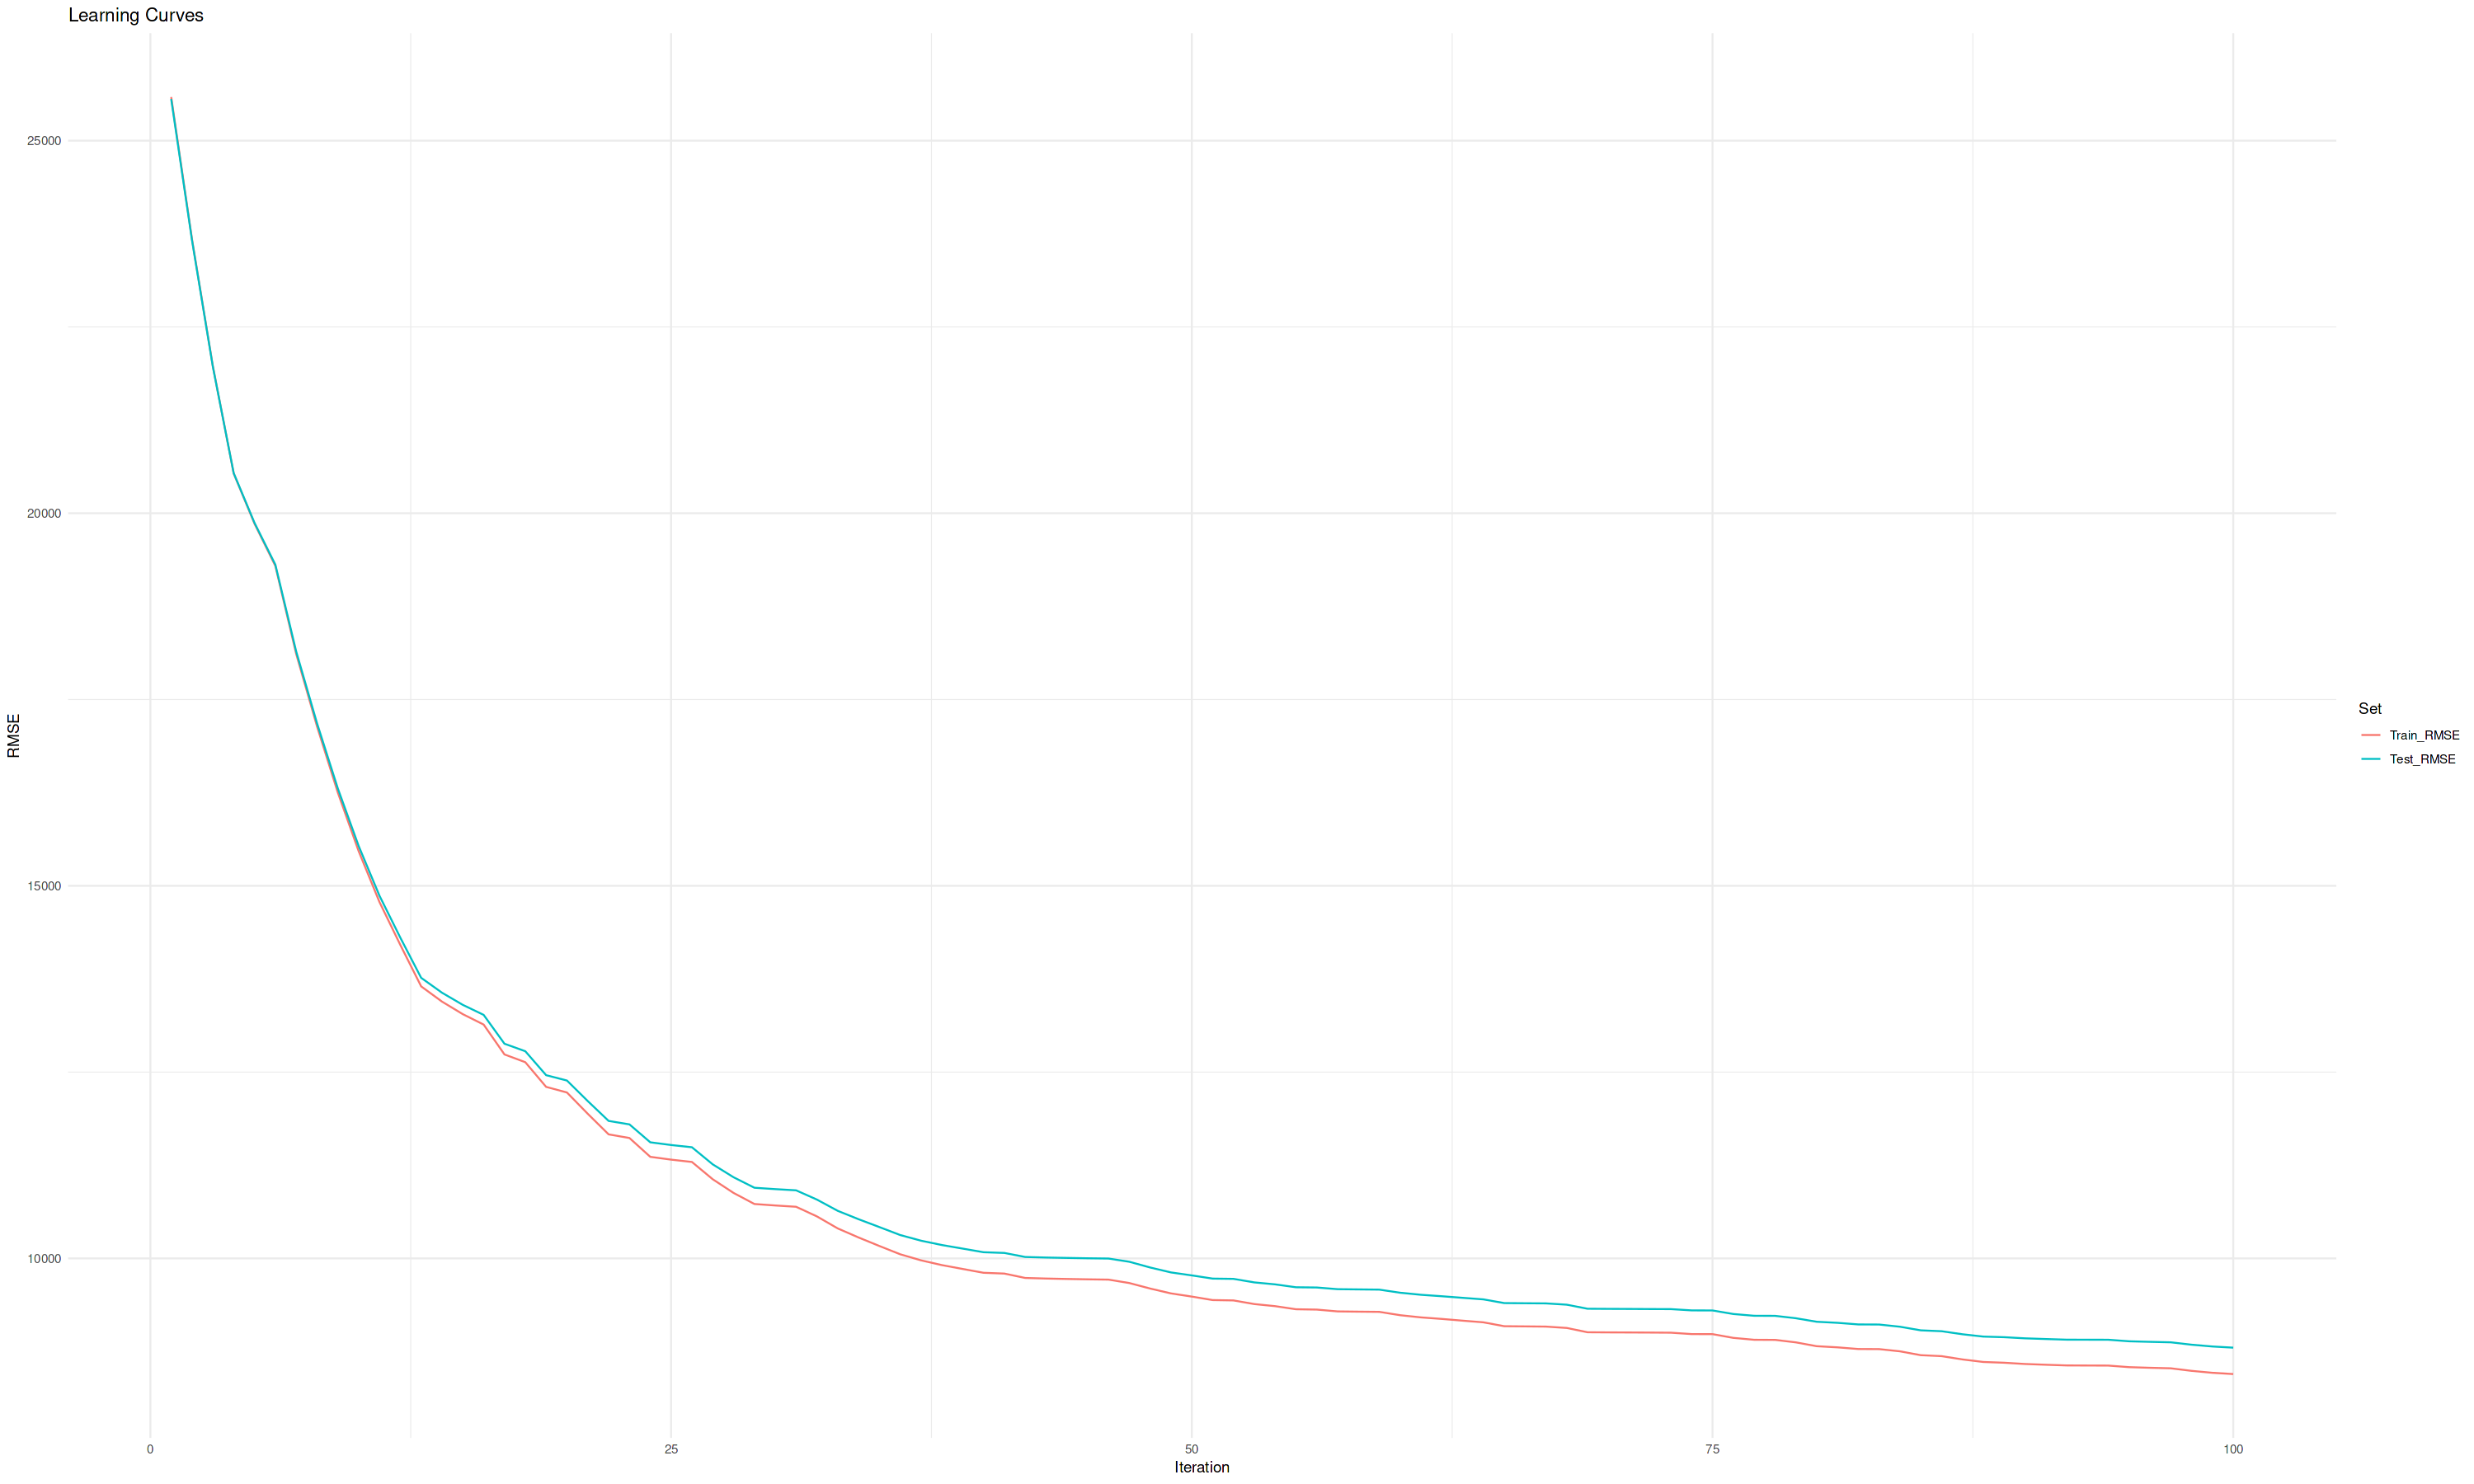

In [67]:
# Extract training and test errors from watchlist
train_rmse <- xg_model$evaluation_log$train_rmse
test_rmse <- xg_model$evaluation_log$test_rmse
iterations <- seq_len(length(train_rmse))

# Create data frame
lc_df <- data.frame(Iteration = iterations, Train_RMSE = train_rmse, Test_RMSE = test_rmse)
lc_df <- melt(lc_df, id.vars = "Iteration", variable.name = "Set", value.name = "RMSE")

# Plot learning curves
ggplot(lc_df, aes(x = Iteration, y = RMSE, color = Set)) +
  geom_line() +
  labs(title = "Learning Curves", x = "Iteration", y = "RMSE") +
  theme_minimal()